<a href="https://colab.research.google.com/github/alfa7g7/Analisis-Cuantitativo-1er-semestre/blob/main/Examen_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS APLICADAS MAESTRÍA EN CIENCIA DE DATOS TIC 60153 – Análisis Cuantitativo Examen 2 (50 %): Modelos de Regularización

#### Librerias a importar

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_california_housing
from itertools import combinations
from statsmodels.stats.stattools import durbin_watson
from scipy.spatial import distance
from scipy.stats import chi2, spearmanr, ttest_1samp
import scipy.stats as stats
from scipy.stats import stats
from scipy.stats import anderson
import statsmodels.stats.api as sms
import statsmodels.api as sm
import warnings

### Ejercicio 1. 1)	Considere el conjunto de datos “Boston Housing Data” presentados en Harrison and Rubinfeld (1978). Defina como variable respuesta a la columna MEDV. Realice una partición 80-20, donde el primer 80 % de los datos son datos de entrenamiento y el restante 20 % son datos para prueba.


- Genere los modelos de regresión por regularización **Ridge, LASSO y Elastic-Net** para los datos de entrenamiento. Encuentre los valores óptimos de $α$ y $λ$ junto a su respectiva gráfica de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección de variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada caso. Finalmente, realice una predicción con las observaciones de prueba y determine cual de los tres modelos es el mejor en capacidad predictiva **(RMSE)**.
- Sea $Z ∈ \mathbb{R}^{n \times p}$ una muestra de datos multivariantes. La distancia de Mahalanobis (MD), presentado por Mahalanobis (1936) y conocida como la distancia estadística, se define de la siguiente forma:
$$MD(zi) = \sqrt{(zi − \hatµ)'\hat{∑}^{-1}(zi - \hat{µ})},\  para\ i=1, . . . , n.$$
Donde $xi ∈ \mathbb{R}^{p\times1}$ denota una observación (fila), pero transpuesta, de la muestra, $\hat{µ} ∈ \mathbb{R}^{p\times1}$ el vector de medias (vector con los promedios de cada columna o variable) y $\hat{Σ}^{−1} ∈ \mathbb{R}^{p\times p}$ la inversa de la matriz de covarianza de los datos. MD puede interpretarse como la distancia
que tiene cada individuo de la muestra al individuo ideal o equilibrio (representado por $\hat{µ}$), considerando la estructura de dependencia de las variables.

  Esta distancia tiene múltiples usos, como por ejemplo la detección de observaciones atípicas. Se dice que una observación $zi$ es atípica sí $MD(zi)> \chi^{2}_{(q,p)},$ donde q denota un percentil, usualmente $q ∈ [0.95, 0.99]$, de la distribución Chi-squared de parámetro $p$.
  
  De acuerdo a la información anterior: Detecte las observaciones atípicas multivariantes de la muestra, usando $q = 0.90, 0.95, 0.975, 0.99$ y en un gráfico muestre las distancias calculadas para cada individuo y los puntos de corte $(\chi^{2}_{(q,p)})$ ¿Qué puede concluir acerca de los individuos atípicos para cada punto de corte? ¿Quienes son? ¿El gráfico de distancias muestra alguna observación NO atípica que para usted si lo fue? ¿Qué puede concluir acerca del comportamiento de q en el valor del punto de corte? Justifique detalladamente.

- Realice dos modelos de regresión Robusto–Regularizado, combinando la técnica de detección de atípicos multivariantes más la regularización Elastic-Net. Encuentre los valores óptimos de $α^{*}$ y $λ^{*}$, interprete los coeficientes de regresión, escriba la respectiva ecuación de regresión resultante y valide los supuestos del modelo $(ε_i \ iid∼   N(0, σ^{2}))$. Finalmente, realice una predicción con las observaciones de prueba y determine el **RMSE** de estos dos modelos. Compare los resultados con los modelos estimados en el ítem 1.

  NOTA: La aplicación de la técnica de detección de atípicos debe realizarla de la siguiente manera:
  
  - Modelo 1: Estandarizar las variables y calcular MD usando el vector de medianas en vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz de covarianzas usual. Luego, eliminar los atípicos y con la muestra limpia estimar el modelo regularizado.

  - Modelo 2: Estandarizar las variables y calcular MD usando el vector de medianas en vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz de covarianzas usual. Luego, determinar como observaciones NO atípicas los primeros r n+p+1 l individuos con las distancias más pequeñas. Finalmente, con la muestra limpia estimar el modelo regularizado.
  
  Ejemplo: Si $n = 1000$ y $p = 100$ entonces r n+p+1 l = r 1000+100+1 l = r550.5l = 551. 2	2 Es decir, debe identificar como NO atípicos los 551 individuos de la muestra con las distancias de Mahalanobis más pequeñas.


In [2]:
# Evitar mensajes de warning generados al mover los grid para graficas
warnings.filterwarnings('ignore')

#### Importación del conjunto de datos Boston

**Nota:**  
El dataset de boston ha sido removido de sklearn.datasets, su importación se ha cancelado por un tema de racismo. Usamos su versión original y agregamos el enlace de la misma. Al final también elimnamos la variable que hace alusión a este tema
[Fuente del conjunto de datos](https://lib.stat.cmu.edu/datasets/boston)

In [3]:
# Carga del conjunto de datos reemplazando la forma deshabilitada por ser racista desde la fuente original
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None,
  names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Acomodando un dataframe df con todo el conjunto de datos y sus nombres de columnas
df = pd.DataFrame(data)
df = df.assign(target=target)
df = df.drop(columns=[11, 12, 13])
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

#NO al racismo jamás, quitamos la columna que hace referencia al estudio racista y sin ella trabajaremos.
df = df.drop(columns='B')

#### EDA

In [ ]:
# Forma de dataframe df
df.shape

(506, 13)

In [ ]:
# Columnas o variables del dataframe df
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# primeros valores del dataframe df (5 valores)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2

In [ ]:
# Últimos valores del dataframe df (5 valores)
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9

In [ ]:
# Número de filas por columna o variable
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
LSTAT      506
MEDV       506
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Visualmente podemos inferir que no tenemos ni un valor nulo o ningún valor vacío. son 506 valores por cada variable, todo caracterizados de tipo de datos flotante.

In [ ]:
# verificacion de datos NaN en el dataframe
print(f'¿Hay algún valor NaN (Not a number)? {df.isna().values.any()}')

¿Hay algún valor NaN (Not a number)? False


In [ ]:
# Descripción estadística del dataframe df
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

In [ ]:
# Determinamos el valor de correlaciones entre las variables

# correlacion de pearson
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787  
LSTAT   -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000

In [ ]:
# correlacion de kendall
df.corr(method = "kendall")

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.462057  0.521014  0.033948  0.603361 -0.211718  0.497297   
ZN      -0.462057  1.000000 -0.535468 -0.039419 -0.511464  0.278134 -0.429389   
INDUS    0.521014 -0.535468  1.000000  0.075889  0.612030 -0.291318  0.489070   
CHAS     0.033948 -0.039419  0.075889  1.000000  0.056387  0.048080  0.055616   
NOX      0.603361 -0.511464  0.612030  0.056387  1.000000 -0.215633  0.589608   
RM      -0.211718  0.278134 -0.291318  0.048080 -0.215633  1.000000 -0.187611   
AGE      0.497297 -0.429389  0.489070  0.055616  0.589608 -0.187611  1.000000   
DIS     -0.539878  0.478524 -0.565137 -0.065619 -0.683930  0.179801 -0.609836   
RAD      0.563969 -0.234663  0.353967  0.021739  0.434828 -0.076569  0.306201   
TAX      0.544956 -0.289911  0.483228 -0.037655  0.453258 -0.190532  0.360311   
PTRATIO  0.312768 -0.361607  0.336612 -0.115694  0.278678 -0.223194  0.251857   
LSTAT    0.454837 -0.386818  0.465980 -0.041344  0.452005 -0.468231  0.485359   
MEDV    -0.403964  0.339989 -0.418430  0.115202 -0.394995  0.482829 -0.387758   

              DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
CRIM    -0.539878  0.563969  0.544956  0.312768  0.454837 -0.403964  
ZN       0.478524 -0.234663 -0.289911 -0.361607 -0.386818  0.339989  
INDUS   -0.565137  0.353967  0.483228  0.336612  0.465980 -0.418430  
CHAS    -0.065619  0.021739 -0.037655 -0.115694 -0.041344  0.115202  
NOX     -0.683930  0.434828  0.453258  0.278678  0.452005 -0.394995  
RM       0.179801 -0.076569 -0.190532 -0.223194 -0.468231  0.482829  
AGE     -0.609836  0.306201  0.360311  0.251857  0.485359 -0.387758  
DIS      1.000000 -0.361892 -0.381988 -0.223486 -0.409347  0.313115  
RAD     -0.361892  1.000000  0.558107  0.251913  0.287943 -0.248115  
TAX     -0.381988  0.558107  1.000000  0.287769  0.384191 -0.414650  
PTRATIO -0.223486  0.251913  0.287769  1.000000  0.330335 -0.398789  
LSTAT   -0.409347  0.287943  0.384191  0.330335  1.000000 -0.668656  
MEDV     0.313115 -0.248115 -0.414650 -0.398789 -0.668656  1.000000

In [ ]:
# correlacion de Spearman
df.corr(method = "spearman")

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.571660  0.735524  0.041537  0.821465 -0.309116  0.704140   
ZN      -0.571660  1.000000 -0.642811 -0.041937 -0.634828  0.361074 -0.544423   
INDUS    0.735524 -0.642811  1.000000  0.089841  0.791189 -0.415301  0.679487   
CHAS     0.041537 -0.041937  0.089841  1.000000  0.068426  0.058813  0.067792   
NOX      0.821465 -0.634828  0.791189  0.068426  1.000000 -0.310344  0.795153   
RM      -0.309116  0.361074 -0.415301  0.058813 -0.310344  1.000000 -0.278082   
AGE      0.704140 -0.544423  0.679487  0.067792  0.795153 -0.278082  1.000000   
DIS     -0.744986  0.614627 -0.757080 -0.080248 -0.880015  0.263168 -0.801610   
RAD      0.727807 -0.278767  0.455507  0.024579  0.586429 -0.107492  0.417983   
TAX      0.729045 -0.371394  0.664361 -0.044486  0.649527 -0.271898  0.526366   
PTRATIO  0.465283 -0.448475  0.433710 -0.136065  0.391309 -0.312923  0.355384   
LSTAT    0.634760 -0.490074  0.638747 -0.050575  0.636828 -0.640832  0.657071   
MEDV    -0.558891  0.438179 -0.578255  0.140612 -0.562609  0.633576 -0.547562   

              DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
CRIM    -0.744986  0.727807  0.729045  0.465283  0.634760 -0.558891  
ZN       0.614627 -0.278767 -0.371394 -0.448475 -0.490074  0.438179  
INDUS   -0.757080  0.455507  0.664361  0.433710  0.638747 -0.578255  
CHAS    -0.080248  0.024579 -0.044486 -0.136065 -0.050575  0.140612  
NOX     -0.880015  0.586429  0.649527  0.391309  0.636828 -0.562609  
RM       0.263168 -0.107492 -0.271898 -0.312923 -0.640832  0.633576  
AGE     -0.801610  0.417983  0.526366  0.355384  0.657071 -0.547562  
DIS      1.000000 -0.495806 -0.574336 -0.322041 -0.564262  0.445857  
RAD     -0.495806  1.000000  0.704876  0.318330  0.394322 -0.346776  
TAX     -0.574336  0.704876  1.000000  0.453345  0.534423 -0.562411  
PTRATIO -0.322041  0.318330  0.453345  1.000000  0.467259 -0.555905  
LSTAT   -0.564262  0.394322  0.534423  0.467259  1.000000 -0.852914  
MEDV     0.445857 -0.346776 -0.562411 -0.555905 -0.852914  1.000000

In [ ]:

# Determinamos el valor de correlacion de todos las variables para la variable MEDV
# desde el más significativo al menos
correlacion = df.corr()
correlacion['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

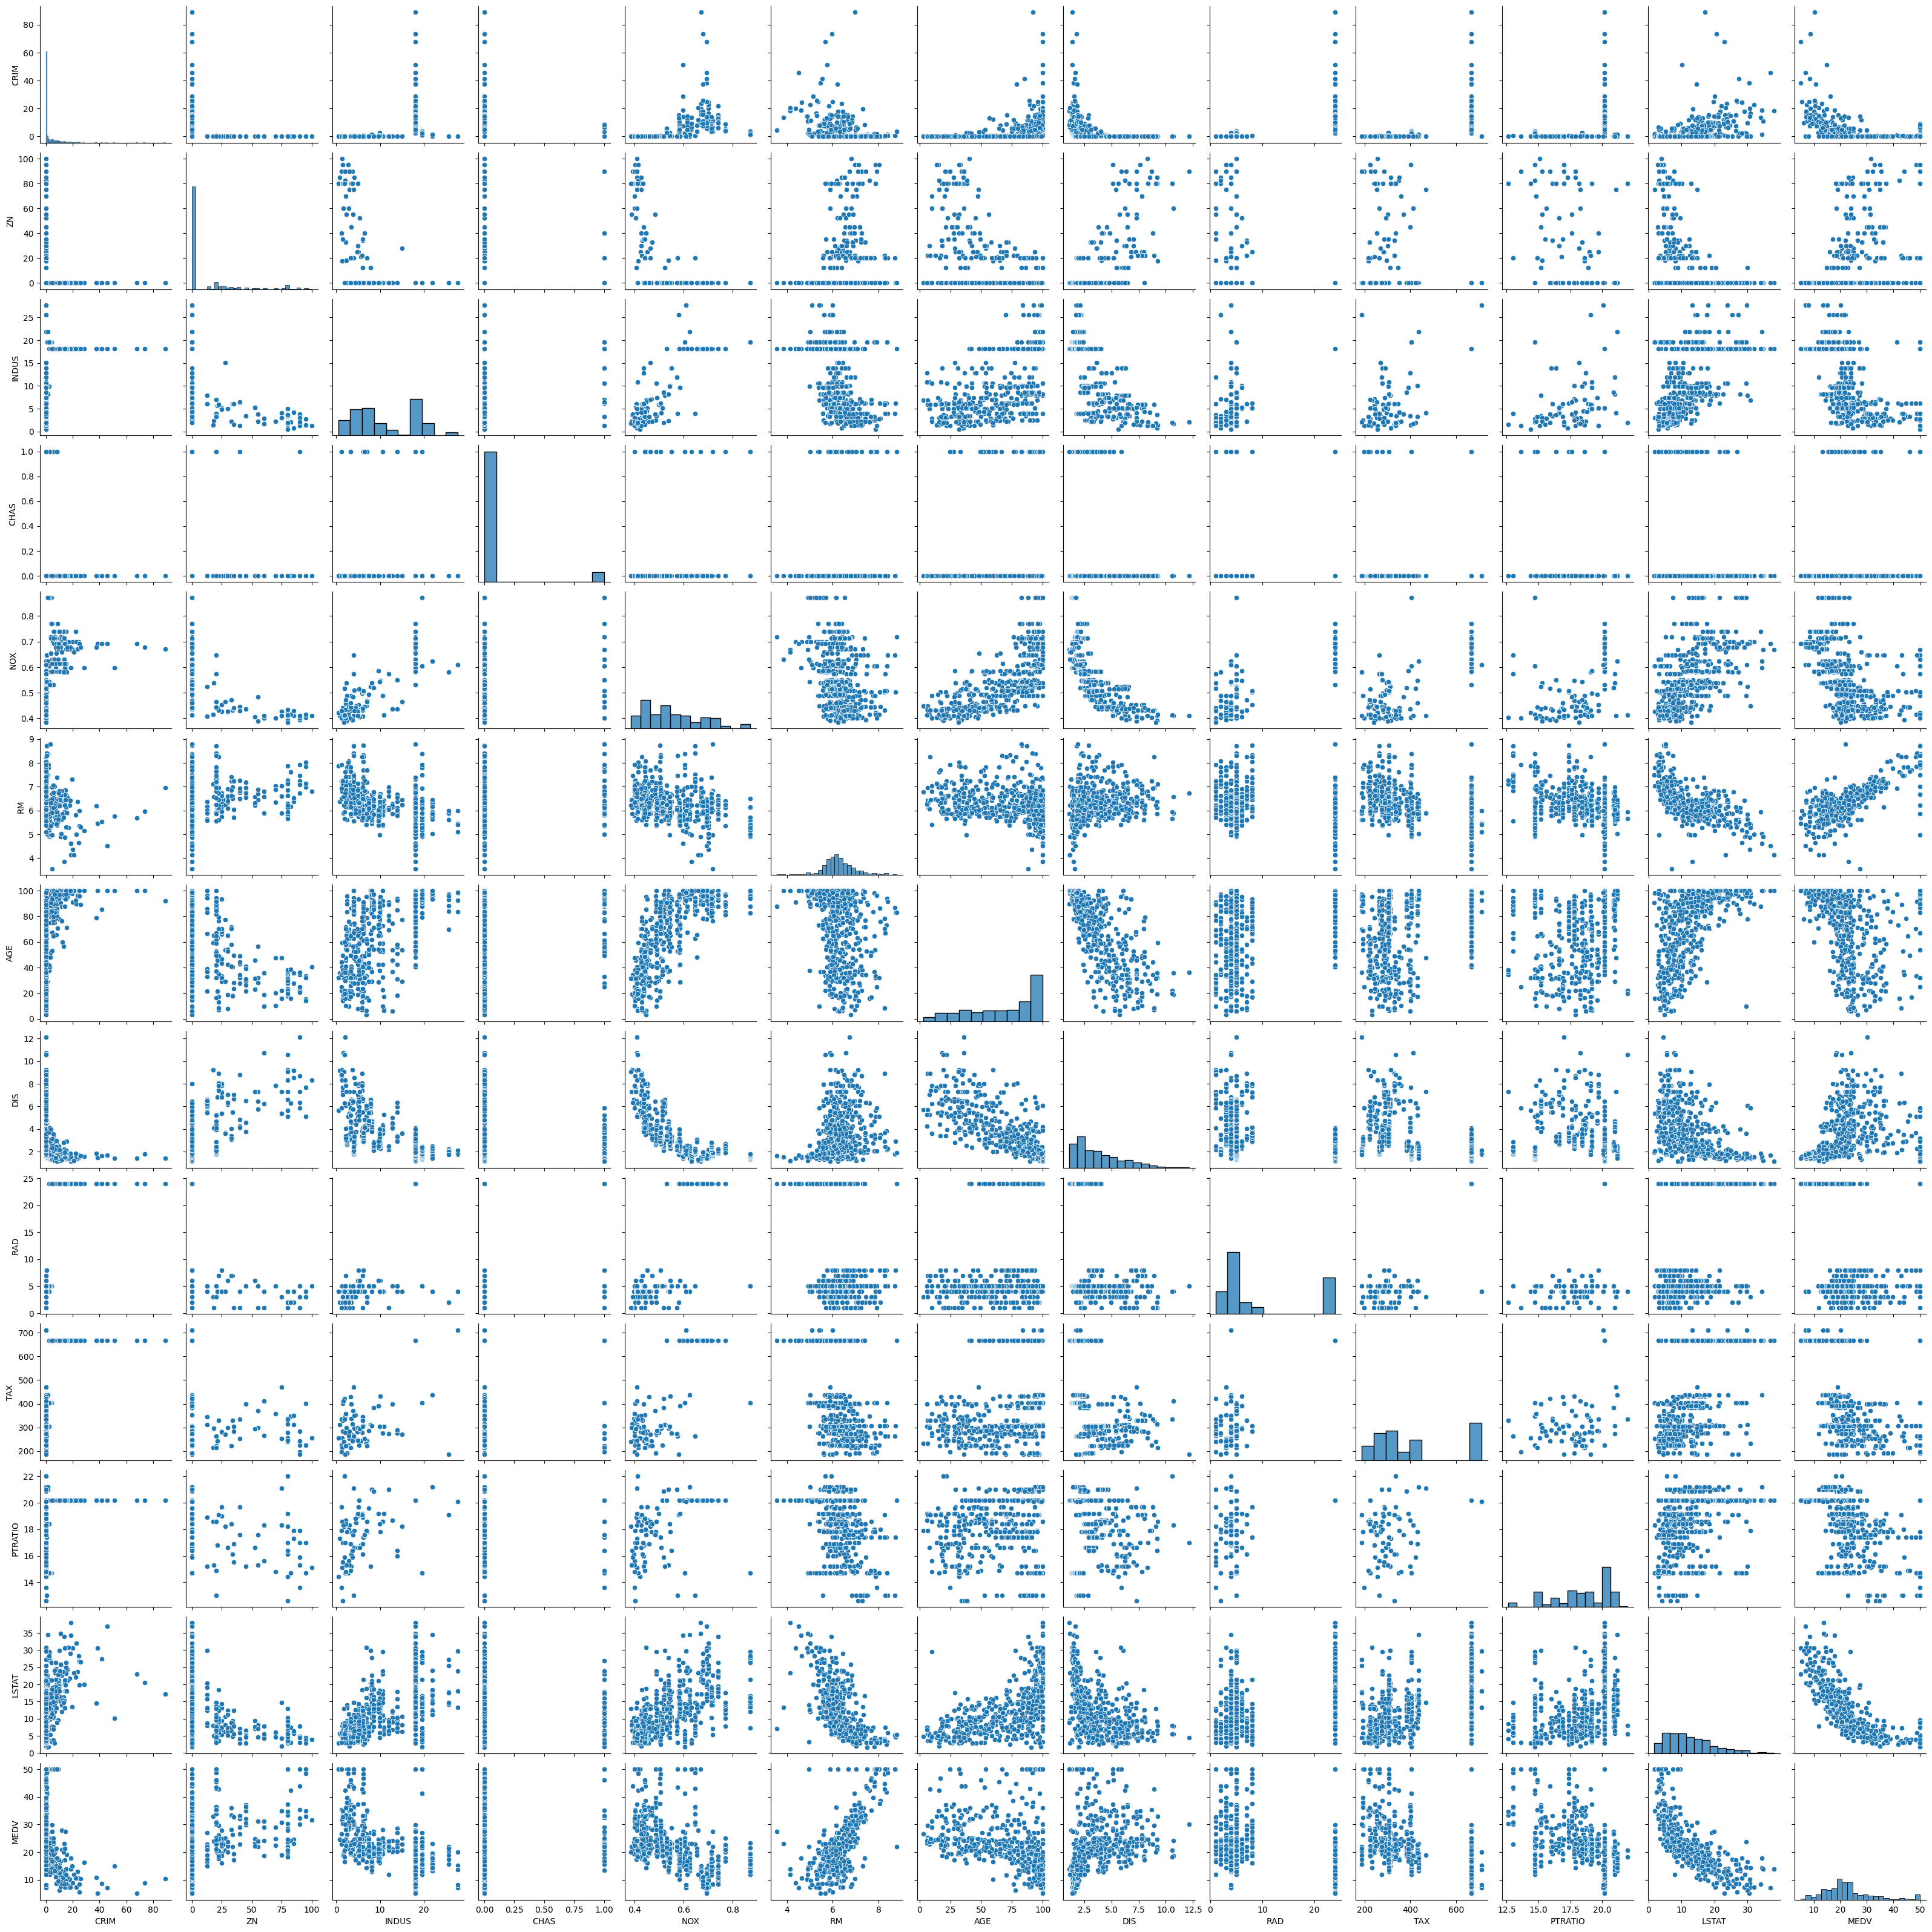

In [ ]:
# Analizamos el histograma (Observados en la diagonal) y dispersión
# (Observados en la anti-diagonal) para cada una de las variables del dataframe 'df'
sns.pairplot(df)

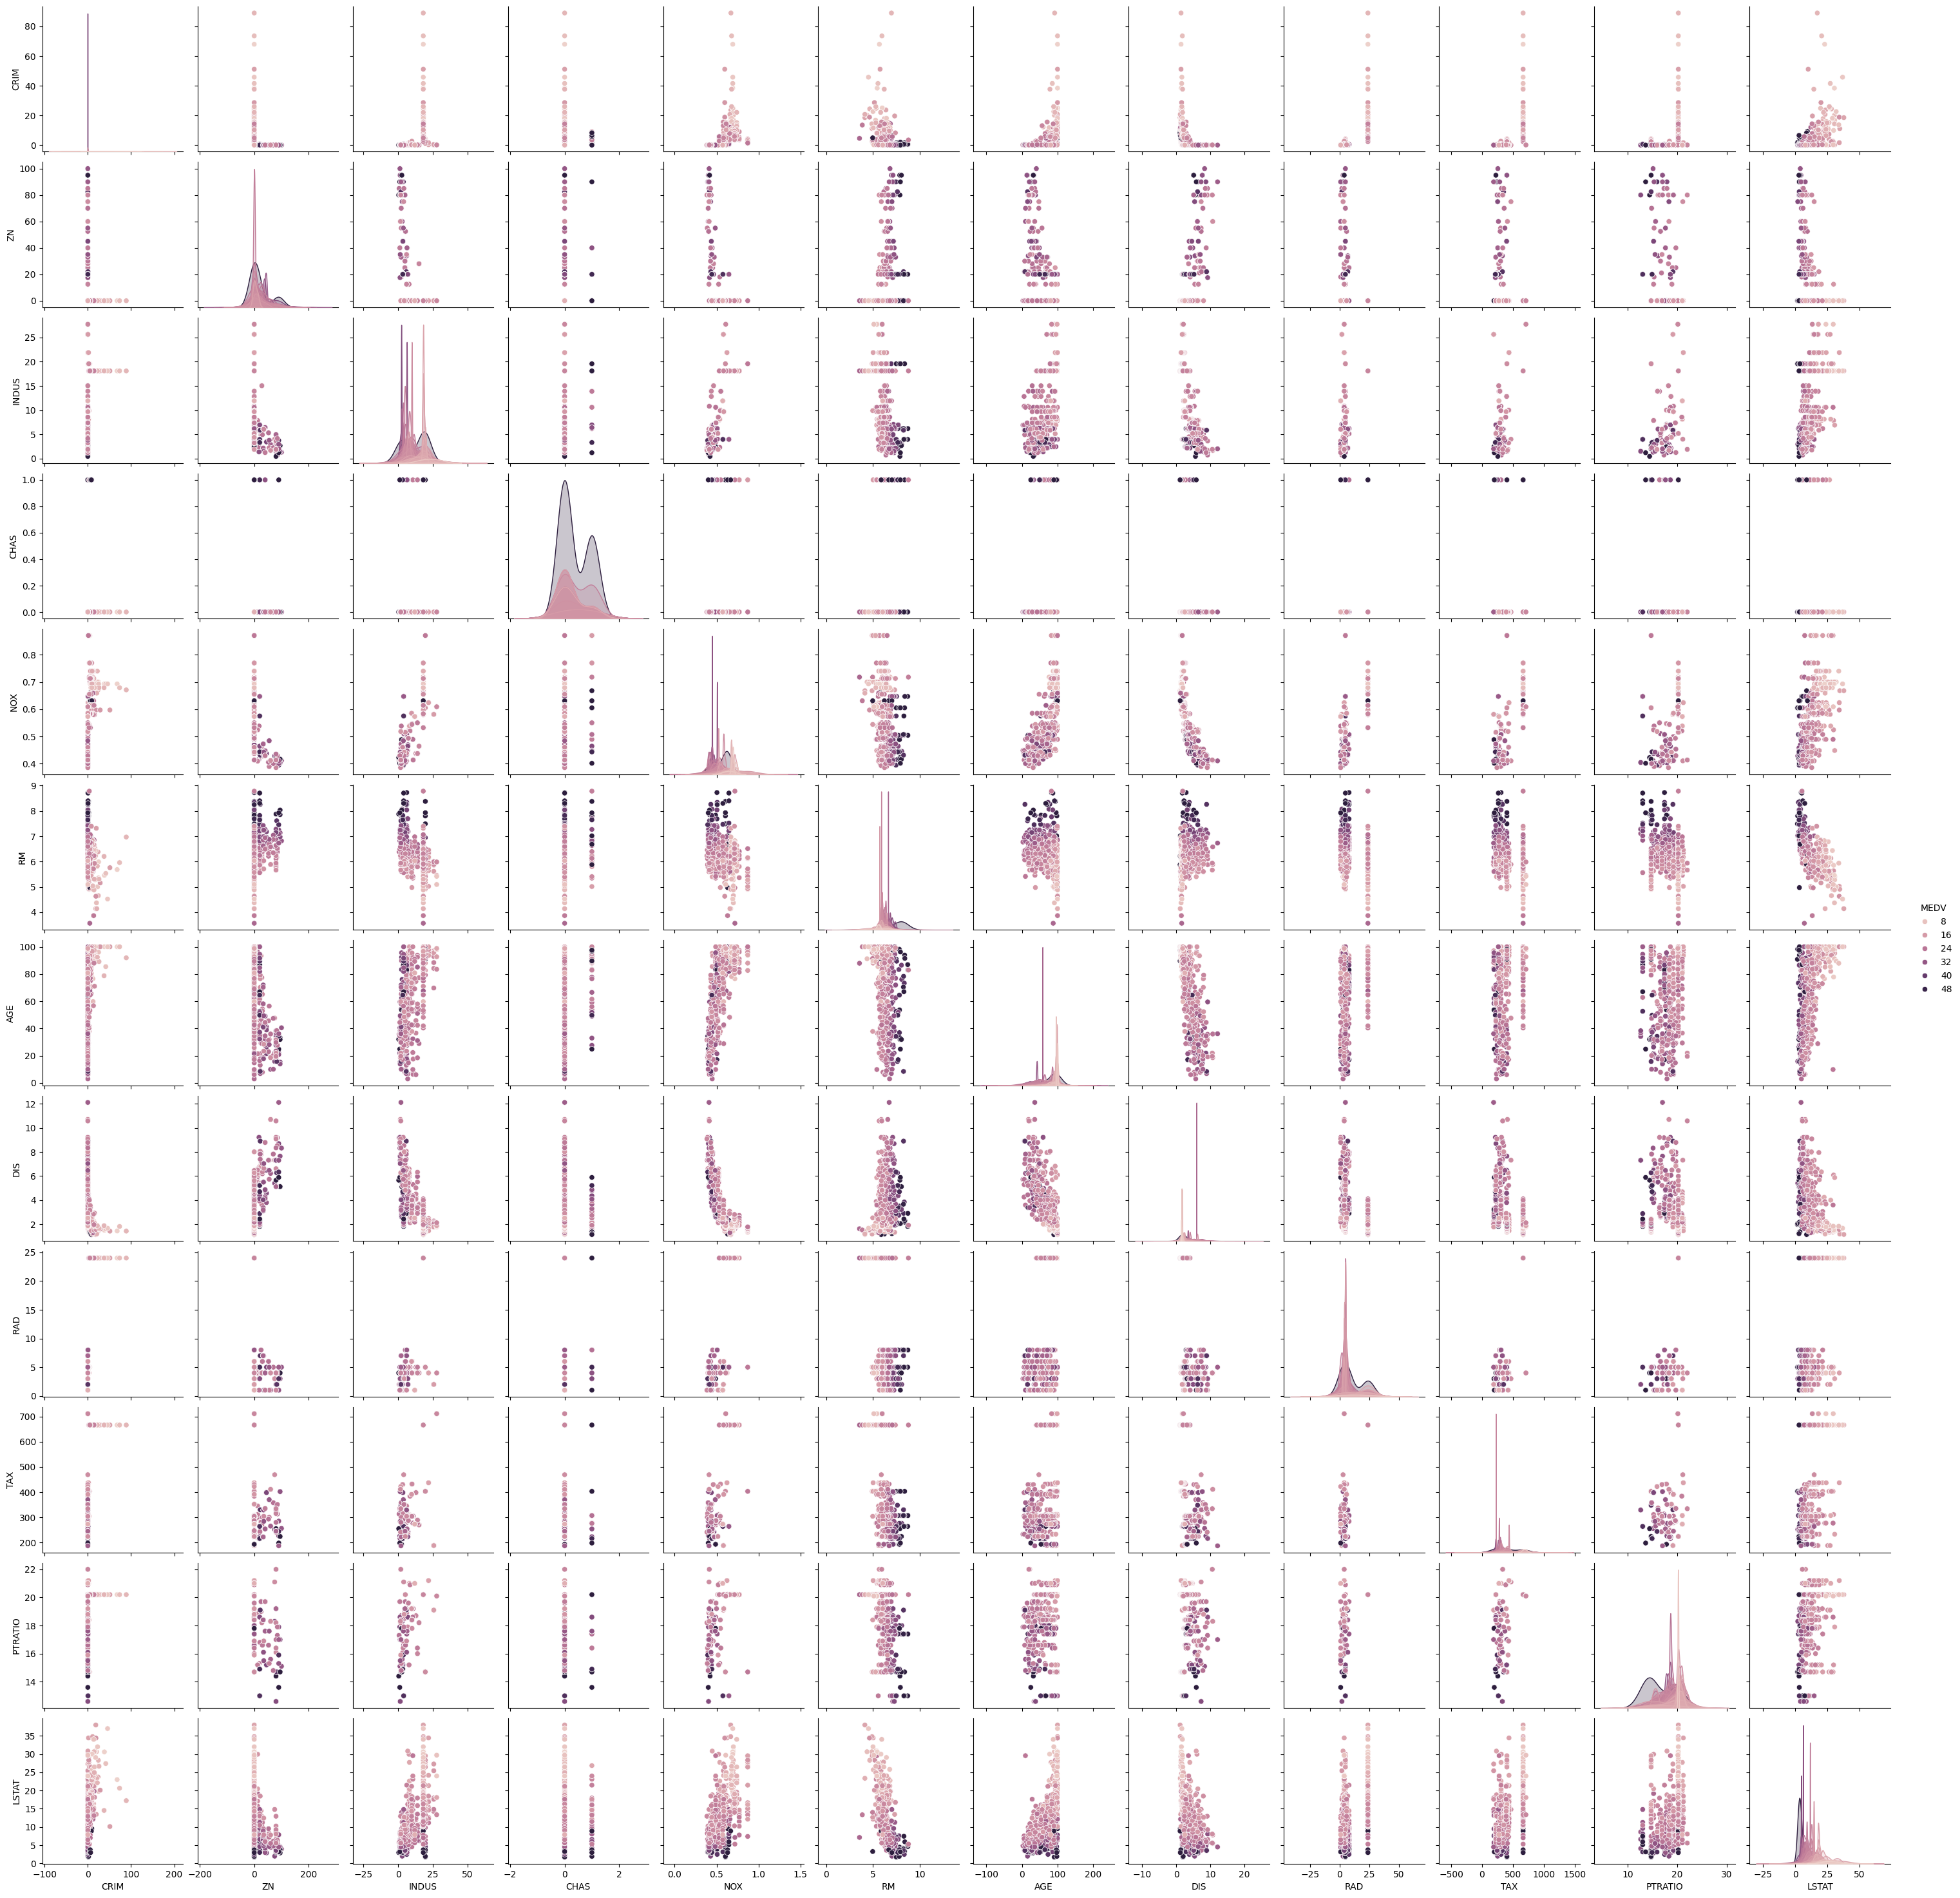

In [ ]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y'
# enfoncandos o usando como pista la variable categórica 'MEDV'
sns.pairplot(df, hue="MEDV")

#### Defina como variable respuesta a la columna MEDV. Realice una partición 80-20, donde el primer 80 % de los datos son datos de entrenamiento y el restante 20 % son datos para prueba.

In [70]:
# definimos también una semilla de random_state = 1 para que la partición cada vez que se corra sea la misma.
X = df.drop(columns="MEDV")
Y = df.MEDV
(X_training, X_test, y_training, y_test) = train_test_split(X, Y, train_size=0.8, random_state=1)

In [71]:
# Verificación de la distribución de 80% entrenamiento(training) y 20% prueba(test)
len( X_training ), len( X_test ), len( y_training ), len( y_test )

(404, 102, 404, 102)

In [72]:
len(df)

506

In [7]:
training_percentage = (len(X_training) * 100) / len(df)
print(f"Porcentaje de datos de entrenamiento: {training_percentage:.2f}%")
print(f"Porcentaje de datos de prueba: {100 - training_percentage:.2f}%")

Porcentaje de datos de entrenamiento: 79.84%
Porcentaje de datos de prueba: 20.16%


#### - Genere los modelos de regresión por regularización **Ridge, LASSO y Elastic-Net** para los datos de entrenamiento. Encuentre los valores óptimos de $α$ y $λ$ junto a su respectiva gráfica de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección de variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada caso. Finalmente, realice una predicción con las observaciones de prueba y determine cual de los tres modelos es el mejor en capacidad predictiva **(RMSE)**.

In [ ]:
# Definimos los modelos
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Definimos los parámetros para la búsqueda de cuadrícula
#parametros = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
alphas = np.logspace(-6, 0.00000000001, 2000)
parametros = {'alpha': alphas}

# Creamos los objetos GridSearchCV
grid_ridge = GridSearchCV(ridge, parametros, scoring='neg_mean_squared_error', cv=5)
grid_lasso = GridSearchCV(lasso, parametros, scoring='neg_mean_squared_error', cv=5)
grid_elastic_net = GridSearchCV(elastic_net, parametros, scoring='neg_mean_squared_error', cv=5)

# Entrenamos los modelos
grid_ridge.fit(X_training, y_training)
grid_lasso.fit(X_training, y_training)
grid_elastic_net.fit(X_training, y_training)

# Imprimimos los mejores parámetros
print(f'El mejor valor de alpha para Ridge es: {grid_ridge.best_params_}')
print(f'El mejor valor de alpha para LASSO es: {grid_lasso.best_params_}')
print(f'El mejor valor de alpha para ElasticNet es: {grid_elastic_net.best_params_}')

El mejor valor de alpha para Ridge es: {'alpha': 0.05839601233115107}
El mejor valor de alpha para LASSO es: {'alpha': 0.00024332856590873503}
El mejor valor de alpha para ElasticNet es: {'alpha': 0.00032753493500499594}


In [ ]:
# Obtenemos los coeficientes de los modelos
ridge_coef = grid_ridge.best_estimator_.coef_
lasso_coef = grid_lasso.best_estimator_.coef_
elastic_net_coef = grid_elastic_net.best_estimator_.coef_

# Imprimimos los coeficientes
print(f'Coeficientes de Ridge: {ridge_coef}')
print(f'\nCoeficientes de LASSO: {lasso_coef}')
print(f'\nCoeficientes de ElasticNet: {elastic_net_coef}')


Coeficientes de Ridge: [-1.19269010e-01  5.82880348e-02  7.94410537e-03  2.22479566e+00
 -1.94368453e+01  3.00902555e+00  5.56173503e-03 -1.50225414e+00
  2.85301430e-01 -1.13824118e-02 -9.61939589e-01 -5.66089193e-01]

Coeficientes de LASSO: [-1.19704008e-01  5.82356240e-02  1.16805422e-02  2.23726780e+00
 -2.02678089e+01  3.00111008e+00  6.25812180e-03 -1.51443115e+00
  2.87334414e-01 -1.13035781e-02 -9.71558632e-01 -5.65076409e-01]

Coeficientes de ElasticNet: [-1.19179659e-01  5.82978921e-02  7.19021962e-03  2.21969086e+00
 -1.92692954e+01  3.01007048e+00  5.43069104e-03 -1.49972441e+00
  2.84899395e-01 -1.13986426e-02 -9.60031072e-01 -5.66337270e-01]


In [ ]:
# Hagamos un dataframe de los mejores coeficientes segun cada modelo
df_coef = pd.DataFrame({'VARIABLE' : X_training.columns, 'RIDGE' : ridge_coef, 'LASSO' : lasso_coef, 'ELASTIC_NET' : elastic_net_coef})

In [ ]:
df_coef

VARIABLE      RIDGE      LASSO  ELASTIC_NET
0      CRIM  -0.119269  -0.119704    -0.119180
1        ZN   0.058288   0.058236     0.058298
2     INDUS   0.007944   0.011681     0.007190
3      CHAS   2.224796   2.237268     2.219691
4       NOX -19.436845 -20.267809   -19.269295
5        RM   3.009026   3.001110     3.010070
6       AGE   0.005562   0.006258     0.005431
7       DIS  -1.502254  -1.514431    -1.499724
8       RAD   0.285301   0.287334     0.284899
9       TAX  -0.011382  -0.011304    -0.011399
10  PTRATIO  -0.961940  -0.971559    -0.960031
11    LSTAT  -0.566089  -0.565076    -0.566337

In [ ]:
# Imprimimos los mejores parámetros
print(f'El mejor valor de intercepto para Ridge es: {grid_ridge.best_estimator_.intercept_}')
print(f'El mejor valor de intercepto para LASSO es: {grid_lasso.best_estimator_.intercept_}')
print(f'El mejor valor de intercepto para ElasticNet es: {grid_elastic_net.best_estimator_.intercept_}')

El mejor valor de intercepto para Ridge es: 46.14200633105493
El mejor valor de intercepto para LASSO es: 46.72366350934607
El mejor valor de intercepto para ElasticNet es: 46.02866366358852


In [ ]:
# Obtenemos los nombres de las variables
variables = X_training.columns

# Escribimos la ecuación de regresión para cada modelo
print('Ecuación de regresión para Ridge:')
print('MEDV = ' + ' + '.join([f'{coef}*{var}' for coef, var in zip(ridge_coef, variables)]))
print('\nEcuación de regresión para LASSO:')
print('MEDV = ' + ' + '.join([f'{coef}*{var}' for coef, var in zip(lasso_coef, variables)]))
print('\nEcuación de regresión para ElasticNet:')
print('MEDV = ' + ' + '.join([f'{coef}*{var}' for coef, var in zip(elastic_net_coef, variables)]))


Ecuación de regresión para Ridge:
MEDV = -0.1192690101273523*CRIM + 0.05828803484023198*ZN + 0.007944105367535984*INDUS + 2.2247956564270175*CHAS + -19.43684533866513*NOX + 3.0090255479869894*RM + 0.005561735030256693*AGE + -1.5022541407494319*DIS + 0.2853014303795801*RAD + -0.01138241177507855*TAX + -0.961939588939047*PTRATIO + -0.5660891928926859*LSTAT

Ecuación de regresión para LASSO:
MEDV = -0.11970400797447929*CRIM + 0.05823562399083207*ZN + 0.011680542249562283*INDUS + 2.2372678043904304*CHAS + -20.267808947345507*NOX + 3.0011100766720795*RM + 0.006258121804634889*AGE + -1.5144311491475129*DIS + 0.287334413542566*RAD + -0.011303578096751041*TAX + -0.971558631896227*PTRATIO + -0.5650764086204001*LSTAT

Ecuación de regresión para ElasticNet:
MEDV = -0.11917965945159643*CRIM + 0.05829789211747488*ZN + 0.007190219617971002*INDUS + 2.2196908579226666*CHAS + -19.269295380794198*NOX + 3.0100704778274094*RM + 0.0054306910392648644*AGE + -1.4997244117644883*DIS + 0.2848993949130155*RAD +

#### Gráfica de evolución de los coeficientes

In [ ]:
# Definimos una lista de valores de alpha

#alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
alphas = np.logspace(-6, 1, 2000)

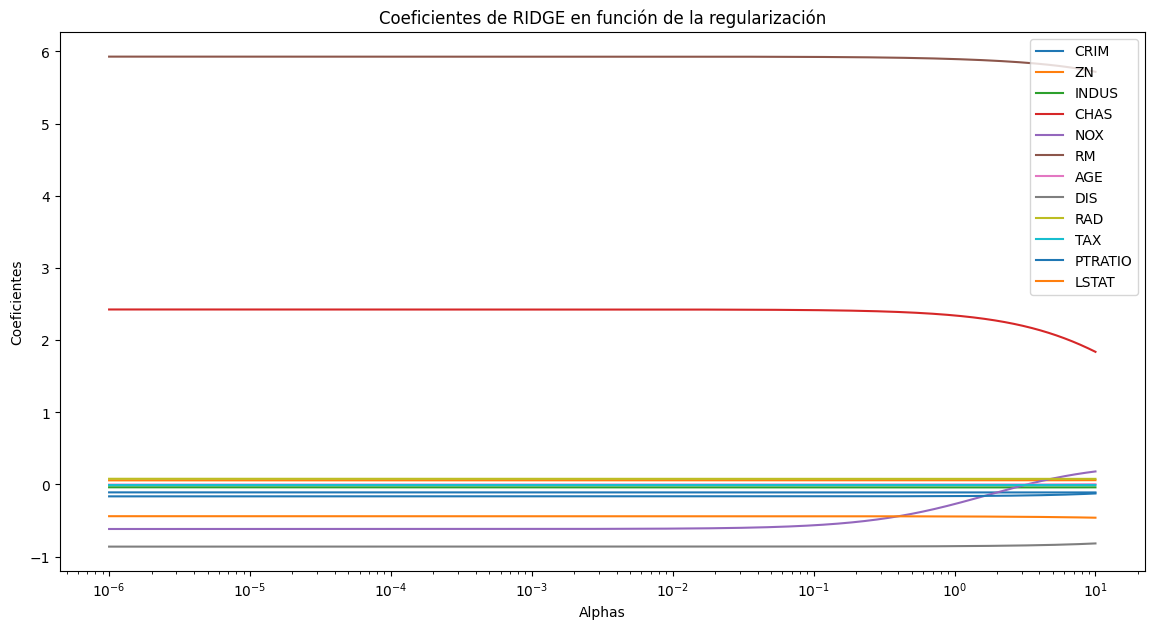

In [ ]:
# Inicializamos una lista para almacenar los coeficientes
coefs = []

# Para cada valor de alpha, ajustamos el modelo y almacenamos los coeficientes
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_training, y_training)
    coefs.append(ridge.coef_)

# Ahora generamos la gráfica
plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.plot(alphas, coefs, label=X_training.columns)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de RIDGE en función de la regularización')
plt.axis('tight')
plt.legend()
plt.show()

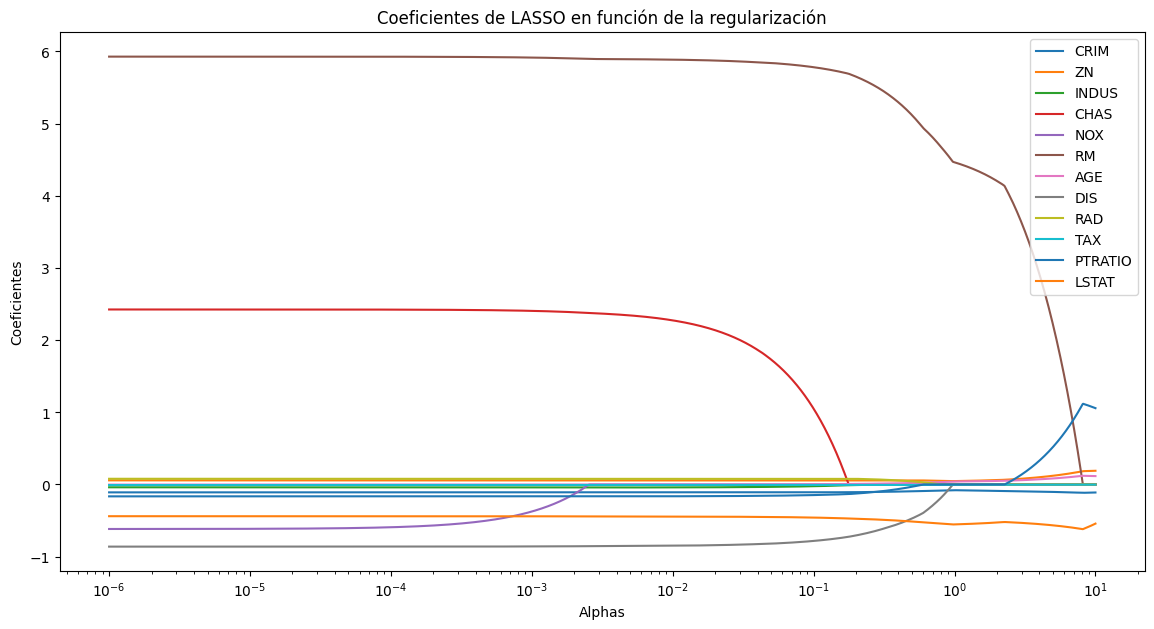

In [ ]:
# Inicializamos una lista para almacenar los coeficientes
coefs = []

# Para cada valor de alpha, ajustamos el modelo y almacenamos los coeficientes
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_training, y_training)
    coefs.append(lasso.coef_)

# Ahora generamos la gráfica
plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.plot(alphas, coefs, label=X_training.columns)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de LASSO en función de la regularización')
plt.axis('tight')
plt.legend()
plt.show()

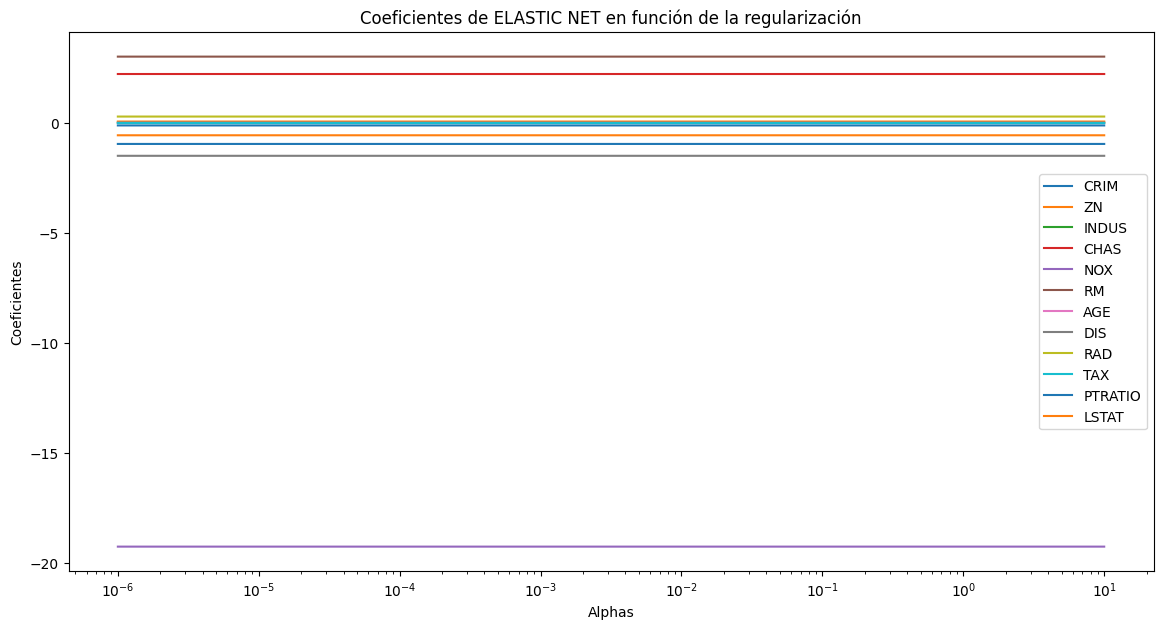

In [ ]:
# Inicializamos una lista para almacenar los coeficientes
coefs = []
#l1_ratios = 0.5 #np.linspace(-6, 1, 2000)

# Para cada valor de alpha, ajustamos el modelo y almacenamos los coeficientes
for a in alphas:
    elastic_net = ElasticNet(alpha=a, fit_intercept=False) #l1_ratio=l1_ratios,
    elastic_net.fit(X_training, y_training)
    coefs.append(elastic_net_coef)

# Ahora generamos la gráfica
plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.plot(alphas, coefs, label=X_training.columns)
ax.set_xscale('log')
plt.xlabel('Alphas')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de ELASTIC NET en función de la regularización')
plt.axis('tight')
plt.legend()
plt.show()

#### Evaluacion de los modelos

In [ ]:
# Definimos los modelos
best_ridge = Ridge(alpha = 0.05839601233115107)
best_lasso = Lasso(alpha = 0.00024332856590873503)
best_elastic_net = ElasticNet(alpha = 0.00032753493500499594, l1_ratio=0.5)

# Entrenamos los modelos
best_ridge.fit(X_training, y_training)
best_lasso.fit(X_training, y_training)
best_elastic_net.fit(X_training, y_training)

# Predecimos con los modelos
ridge_pred = best_ridge.predict(X_training)
lasso_pred = best_lasso.predict(X_training)
elastic_net_pred = best_elastic_net.predict(X_training)

# Calculamos las métricas de rendimiento de los modelos

# MSE (Error cuadratico medio)
mse_ridge = mean_squared_error(y_training, ridge_pred)
mse_lasso = mean_squared_error(y_training, lasso_pred)
mse_elastic_net = mean_squared_error(y_training, elastic_net_pred)

# MAE (Error absoluto medio)
mae_ridge = mean_absolute_error(y_training, ridge_pred)
mae_lasso = mean_absolute_error(y_training, lasso_pred)
mae_elastic_net = mean_absolute_error(y_training, elastic_net_pred)

# (R cuadrado)
r2_ridge = r2_score(y_training, ridge_pred)
r2_lasso = r2_score(y_training, lasso_pred)
r2_elastic_net = r2_score(y_training, elastic_net_pred)

# Parametros para calculo de r2_adjustado
n = len(X_training)
p = len(X_training.columns)

# (R cuadrado ajustado)
r2_adjusted_ridge = 1-((1-r2_ridge)*(n-1)/(n-p-1))
r2_adjusted_lasso = 1-((1-r2_lasso)*(n-1)/(n-p-1))
r2_adjusted_elastic_net = 1-((1-r2_elastic_net)*(n-1)/(n-p-1))

# RMSE (Root mean square error)
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_elastic_net = np.sqrt(mse_elastic_net)

In [ ]:
# Hagamos un dataframe de los mejores coeficientes segun cada modelo
df_eva_mod = pd.DataFrame({'MODELO' : ("ridge_pred", "lasso_pred", "elastic_net_pred"),
                           'MAE' : (mae_ridge, mae_lasso, mae_elastic_net),
                           'R_SQUARED' : (r2_ridge, r2_lasso, r2_elastic_net),
                           'R_SQUARED_ADJUSTED' : (r2_adjusted_ridge, r2_adjusted_lasso, r2_adjusted_elastic_net),
                           'RMSE' : (rmse_ridge, rmse_lasso, rmse_elastic_net)})

In [ ]:
df_eva_mod

MODELO       MAE  R_SQUARED  R_SQUARED_ADJUSTED      RMSE
0        ridge_pred  3.241792   0.725237            0.716804  4.711238
1        lasso_pred  3.247034   0.725268            0.716837  4.710968
2  elastic_net_pred  3.240862   0.725224            0.716791  4.711348

In [ ]:
# Encontremos el índice del modelo con el RMSE más bajo
index_min_rmse = df_eva_mod['RMSE'].idxmin()

# Usemos el índice para obtener el nombre del modelo
model_name = df_eva_mod.loc[index_min_rmse, 'MODELO']

print("El modelo con el RMSE más bajo es:", model_name)



El modelo con el RMSE más bajo es: lasso_pred


Después de evaluar los modelos y teniendo en cuenta que:

Un valor de RMSE más bajo indica un mejor rendimiento del modelo, ya que significa que las predicciones del modelo están más cerca de los valores verdaderos. Sin embargo, como todas las métricas, el RMSE debe interpretarse en el contexto del problema y los datos específicos. Por ejemplo, un RMSE de 1 puede ser muy bueno si los valores verdaderos están en el rango de 100-200, pero puede ser muy malo si los valores verdaderos están en el rango de 1-2. Por lo tanto, siempre es útil comparar el RMSE con el rango y la varianza de los valores verdaderos. Además, el RMSE es sensible a los valores atípicos, ya que eleva al cuadrado las diferencias. Esto significa que los errores grandes tienen un impacto desproporcionadamente grande en el RMSE. Por lo tanto, si tus datos tienen muchos valores atípicos, otras métricas pueden ser más apropiadas.

Creemos que en estas condiciones el mejor modelo predicho es el de regularización lasso.

#### - Sea $Z ∈ \mathbb{R}^{n \times p}$ una muestra de datos multivariantes. La distancia de Mahalanobis (MD), presentado por Mahalanobis (1936) y conocida como la distancia estadística, se define de la siguiente forma:
$$MD(zi) = \sqrt{(zi − \hatµ)'\hat{∑}^{-1}(zi - \hat{µ})},\  para\ i=1, . . . , n.$$
Donde $xi ∈ \mathbb{R}^{p\times1}$ denota una observación (fila), pero transpuesta, de la muestra, $\hat{µ} ∈ \mathbb{R}^{p\times1}$ el vector de medias (vector con los promedios de cada columna o variable) y $\hat{Σ}^{−1} ∈ \mathbb{R}^{p\times p}$ la inversa de la matriz de covarianza de los datos. MD puede interpretarse como la distancia
que tiene cada individuo de la muestra al individuo ideal o equilibrio (representado por $\hat{µ}$), considerando la estructura de dependencia de las variables.

  Esta distancia tiene múltiples usos, como por ejemplo la detección de observaciones atípicas. Se dice que una observación $zi$ es atípica sí $MD(zi)> \chi^{2}_{(q,p)},$ donde q denota un percentil, usualmente $q ∈ [0.95, 0.99]$, de la distribución Chi-squared de parámetro $p$.
  
  De acuerdo a la información anterior: Detecte las observaciones atípicas multivariantes de la muestra, usando $q = 0.90, 0.95, 0.975, 0.99$ y en un gráfico muestre las distancias calculadas para cada individuo y los puntos de corte $(\chi^{2}_{(q,p)})$ ¿Qué puede concluir acerca de los individuos atípicos para cada punto de corte? ¿Quienes son? ¿El gráfico de distancias muestra alguna observación NO atípica que para usted si lo fue? ¿Qué puede concluir acerca del comportamiento de q en el valor del punto de corte? Justifique detalladamente.

In [8]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

##### Método 1

In [9]:
# Procedemos a estandarizar las variables de dataframe df
df_escaled = (df -df.mean()) / df.std()
df_escaled

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1   -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2   -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3   -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4   -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.412820 -0.487240  0.115624 -0.272329  0.157968  0.438881  0.018654   
502 -0.414839 -0.487240  0.115624 -0.272329  0.157968 -0.234316  0.288648   
503 -0.413038 -0.487240  0.115624 -0.272329  0.157968  0.983986  0.796661   
504 -0.407361 -0.487240  0.115624 -0.272329  0.157968  0.724955  0.736268   
505 -0.414590 -0.487240  0.115624 -0.272329  0.157968 -0.362408  0.434302   

          DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
0    0.140075 -0.981871 -0.665949 -1.457558 -1.074499  0.159528  
1    0.556609 -0.867024 -0.986353 -0.302794 -0.491953 -0.101424  
2    0.556609 -0.867024 -0.986353 -0.302794 -1.207532  1.322937  
3    1.076671 -0.752178 -1.105022  0.112920 -1.360171  1.181589  
4    1.076671 -0.752178 -1.105022  0.112920 -1.025487  1.486032  
..        ...       ...       ...       ...       ...       ...  
501 -0.625178 -0.981871 -0.802418  1.175303 -0.417734 -0.014440  
502 -0.715931 -0.981871 -0.802418  1.175303 -0.500355 -0.210154  
503 -0.772919 -0.981871 -0.802418  1.175303 -0.982076  0.148655  
504 -0.667776 -0.981871 -0.802418  1.175303 -0.864446 -0.057932  
505 -0.612640 -0.981871 -0.802418  1.175303 -0.668397 -1.156104  

[506 rows x 13 columns]

In [10]:
#Z es nuestra matriz de datos del dataframe X_escaled
#Z = df_escaled.to_numpy()

# Calcular la media y la matriz de covarianza
#mu = np.mean(Z, axis=0)
#cov = np.cov(Z, rowvar=False)
mu = df_escaled.mean()
cov = df_escaled.cov()


# Calcular la distancia de Mahalanobis para cada observación
#MD = np.array([distance.mahalanobis(z, mu, np.linalg.inv(cov)) for z in Z])

#definimos una funcion mahalanobis_distance
def mahalanobis_distance(x, mu, cov):
    diff = x - mu
    inv_cov = np.linalg.inv(cov)
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))

MD = df_escaled.apply(lambda x: mahalanobis_distance(x, mu, cov), axis=1)


# Calcular los puntos de corte para diferentes valores de q
q_values = [0.90, 0.95, 0.975, 0.99]
p = len(df_escaled.columns)
#cutoffs = {q: chi2.ppf(q, Z.shape[1]) for q in q_values}
cutoffs = [chi2.ppf(q, p) for q in q_values]

# Identificar las observaciones atípicas para cada valor de q
#outliers = {q: Z[MD > cutoff] for q, cutoff in cutoffs.items()}
outliers = [[] for _ in range(len(q_values))]

for i, distancia in enumerate(MD):
    for j, corte in enumerate(cutoffs):
        if distancia > np.sqrt(corte):
            outliers[j].append(i)

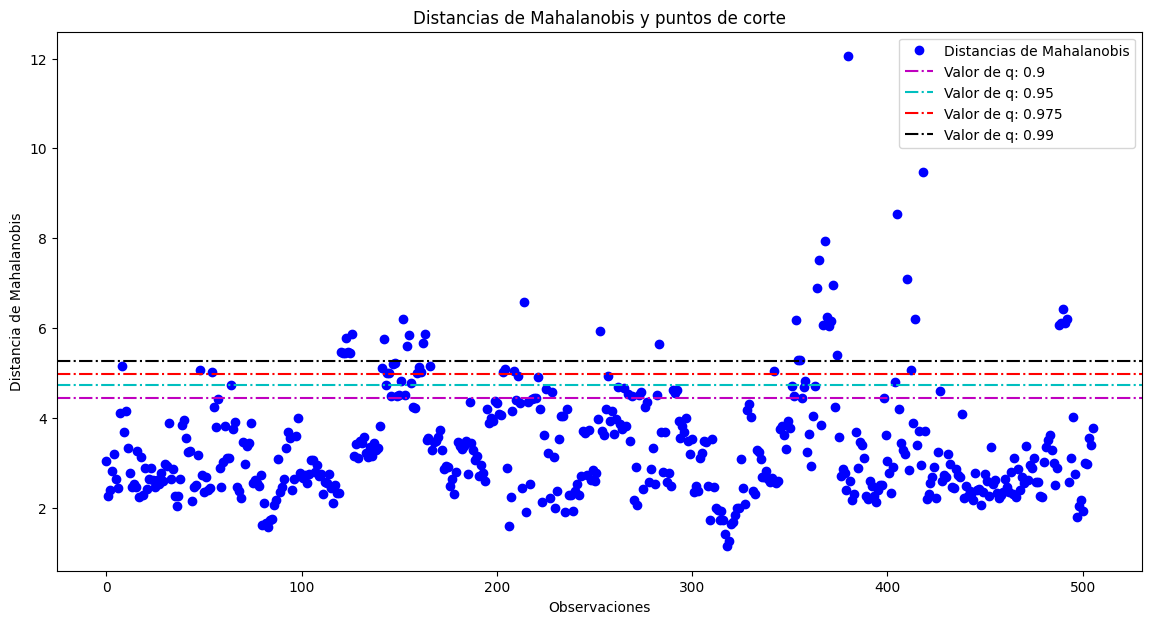

In [11]:
# Calcular las distancias de Mahalanobis al cubo para cada valor de q
#MD_cubed = {q: Z[MD > cutoff]**3 for q, cutoff in cutoffs.items()}

# Crear un gráfico para cada valor de q
#for q, distances in MD_cubed.items():
#    plt.figure(figsize=(14, 7))
#    plt.hist(distances, bins=30, edgecolor='black')
#    plt.title(f'Distancias de Mahalanobis al cubo para q={q}')
#    plt.xlabel('Distancia de Mahalanobis al cubo')
#    plt.ylabel('Frecuencia')
#    plt.grid(True)
#    plt.show()


# Graficamos las distancias y las líneas de corte de las observaciones
plt.figure(figsize=(14, 7))
plt.plot(MD, 'bo', label='Distancias de Mahalanobis')

# Colores para las líneas de corte
colores = ['m', 'c', 'r', 'k']

for i, corte in enumerate(cutoffs):
    plt.axhline(y=np.sqrt(corte), color=colores[i], linestyle='dashdot', label=f'Valor de q: {q_values[i]}')

plt.xlabel('Observaciones')
plt.ylabel('Distancia de Mahalanobis')
plt.title('Distancias de Mahalanobis y puntos de corte')
plt.legend()
plt.show()

In [12]:
# Agregamos al dataset:

# Crear una lista de etiquetas para cada valor de q
q_labels = ['q_0.90', 'q_0.95', 'q_0.975', 'q_0.99']

# Crear un DataFrame vacío para almacenar los resultados
resultados_df = pd.DataFrame(index=df_escaled.index)

# Iterar sobre cada valor de q
for i, q in enumerate(q_values):
    # Crear una columna en el DataFrame para el valor de q actual
    # Se marcan todas las observaciones como no atípicas para inciar el análisis
    resultados_df[q_labels[i]] = 'No atípico'

    # Marcamos como atípicas las observaciones que superan el punto de corte para el valor de q actual
    for outlier in outliers[i]:
        resultados_df.at[outlier, q_labels[i]] = 'Atípico'

# Mostrar el DataFrame con los resultados
resultados_df

df_escaled['MAHALANOBIS'] = MD
df_escaled_DM = pd.concat([df_escaled, resultados_df], axis=1)
df_escaled_DM

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1   -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2   -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3   -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4   -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.412820 -0.487240  0.115624 -0.272329  0.157968  0.438881  0.018654   
502 -0.414839 -0.487240  0.115624 -0.272329  0.157968 -0.234316  0.288648   
503 -0.413038 -0.487240  0.115624 -0.272329  0.157968  0.983986  0.796661   
504 -0.407361 -0.487240  0.115624 -0.272329  0.157968  0.724955  0.736268   
505 -0.414590 -0.487240  0.115624 -0.272329  0.157968 -0.362408  0.434302   

          DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  MAHALANOBIS  \
0    0.140075 -0.981871 -0.665949 -1.457558 -1.074499  0.159528     3.027744   
1    0.556609 -0.867024 -0.986353 -0.302794 -0.491953 -0.101424     2.267597   
2    0.556609 -0.867024 -0.986353 -0.302794 -1.207532  1.322937     2.390498   
3    1.076671 -0.752178 -1.105022  0.112920 -1.360171  1.181589     2.812821   
4    1.076671 -0.752178 -1.105022  0.112920 -1.025487  1.486032     3.190760   
..        ...       ...       ...       ...       ...       ...          ...   
501 -0.625178 -0.981871 -0.802418  1.175303 -0.417734 -0.014440     2.982897   
502 -0.715931 -0.981871 -0.802418  1.175303 -0.500355 -0.210154     2.973166   
503 -0.772919 -0.981871 -0.802418  1.175303 -0.982076  0.148655     3.554721   
504 -0.667776 -0.981871 -0.802418  1.175303 -0.864446 -0.057932     3.387242   
505 -0.612640 -0.981871 -0.802418  1.175303 -0.668397 -1.156104     3.778616   

         q_0.90      q_0.95     q_0.975      q_0.99  
0    No atípico  No atípico  No atípico  No atípico  
1    No atípico  No atípico  No atípico  No atípico  
2    No atípico  No atípico  No atípico  No atípico  
3    No atípico  No atípico  No atípico  No atípico  
4    No atípico  No atípico  No atípico  No atípico  
..          ...         ...         ...         ...  
501  No atípico  No atípico  No atípico  No atípico  
502  No atípico  No atípico  No atípico  No atípico  
503  No atípico  No atípico  No atípico  No atípico  
504  No atípico  No atípico  No atípico  No atípico  
505  No atípico  No atípico  No atípico  No atípico  

[506 rows x 18 columns]

In [13]:
df_escaled_DM["q_0.90"].value_counts()

q_0.90
No atípico    421
Atípico        85
Name: count, dtype: int64

In [14]:
df_escaled_DM["q_0.95"].value_counts()

q_0.95
No atípico    443
Atípico        63
Name: count, dtype: int64

In [15]:
df_escaled_DM["q_0.975"].value_counts()

q_0.975
No atípico    451
Atípico        55
Name: count, dtype: int64

In [16]:
df_escaled_DM["q_0.99"].value_counts()

q_0.99
No atípico    468
Atípico        38
Name: count, dtype: int64

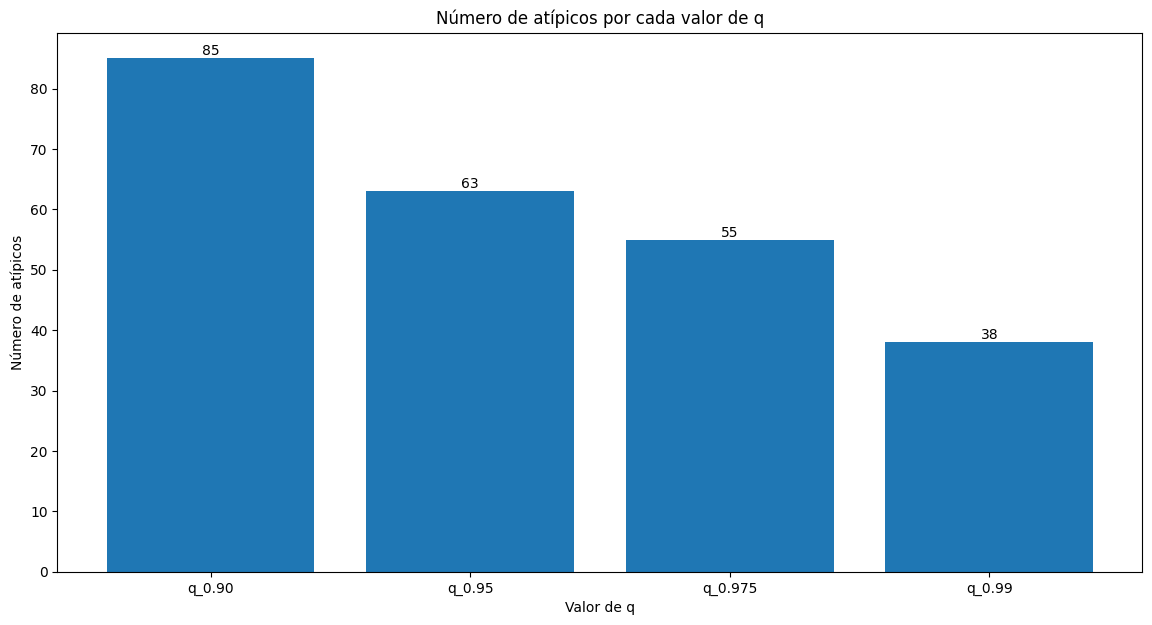

In [17]:
# Datos de entrada
q_values = ['q_0.90', 'q_0.95', 'q_0.975', 'q_0.99']
atypicals = [(df_escaled_DM["q_0.90"] == "Atípico").sum(),
            (df_escaled_DM["q_0.95"] == "Atípico").sum(),
            (df_escaled_DM["q_0.975"] == "Atípico").sum(),
            (df_escaled_DM["q_0.99"] == "Atípico").sum()]

# Graficamos
plt.figure(figsize=(14, 7))
bars = plt.bar(q_values, atypicals)

# Etiquetas en las barras
for bar, atypical in zip(bars, atypicals):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, atypical,
             ha='center', va='bottom')

plt.xlabel('Valor de q')
plt.ylabel('Número de atípicos')
plt.title('Número de atípicos por cada valor de q')
plt.show()

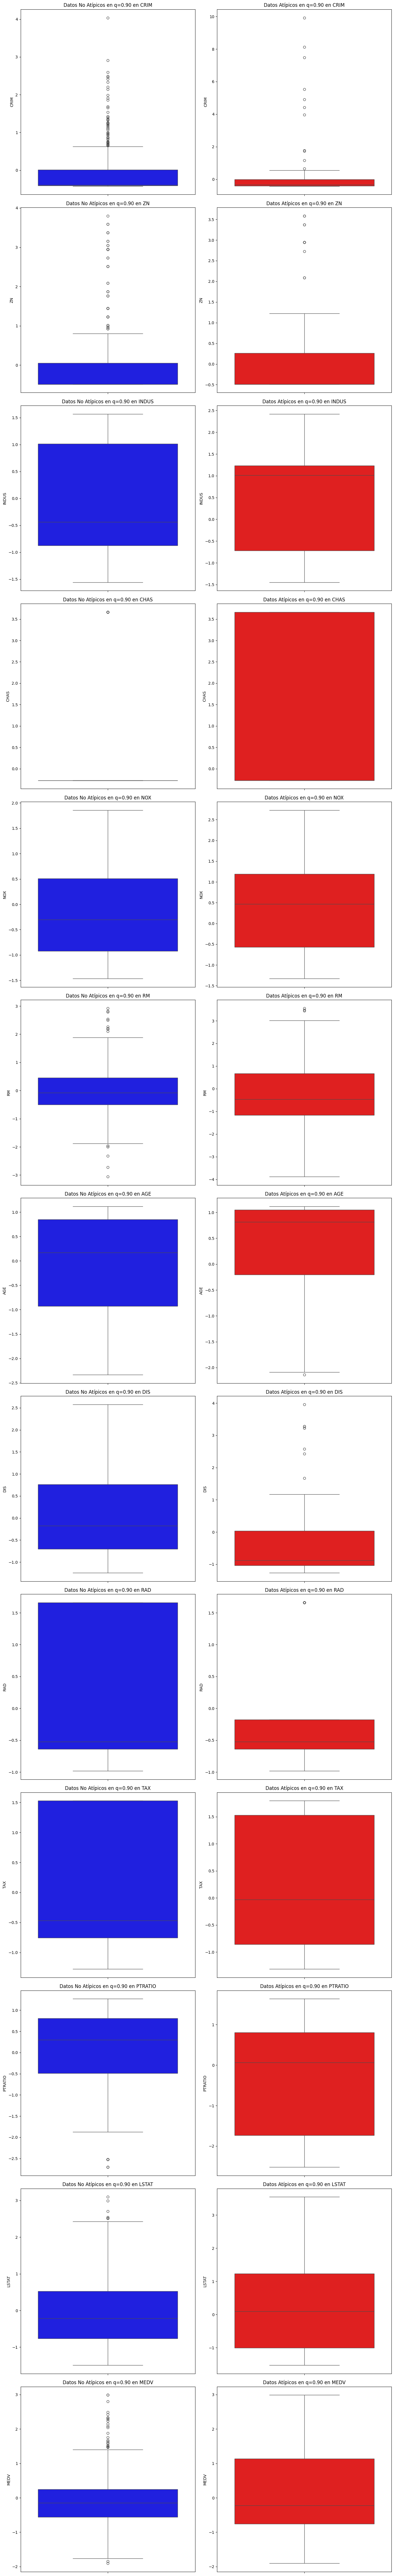

In [ ]:
# Lista de variables a considerar para los diagramas de cajas
variables = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]
# Crear la figura y los subgráficos
fig, axs = plt.subplots(len(variables), 2, figsize=(14, 7*len(variables)))

for i, variable in enumerate(variables):
    # Filtrar los datos atípicos y no atípicos en q0.90 para la columna actual
    dates_not_atypicals = df_escaled_DM[df_escaled_DM['q_0.90'] == 'No atípico'][variable]
    dates_atypicals = df_escaled_DM[df_escaled_DM['q_0.90'] != 'No atípico'][variable]

    # Diagrama de cajas para datos no atípicos
    sns.boxplot(y=dates_not_atypicals, ax=axs[i, 0], color='b')
    axs[i, 0].set_title(f'Datos No Atípicos en q=0.90 en {variable}')
    axs[i, 0].set_ylabel(variable)

    # Diagrama de cajas para datos atípicos
    sns.boxplot(y=dates_atypicals, ax=axs[i, 1], color='r')
    axs[i, 1].set_title(f'Datos Atípicos en q=0.90 en {variable}')
    axs[i, 1].set_ylabel(variable)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

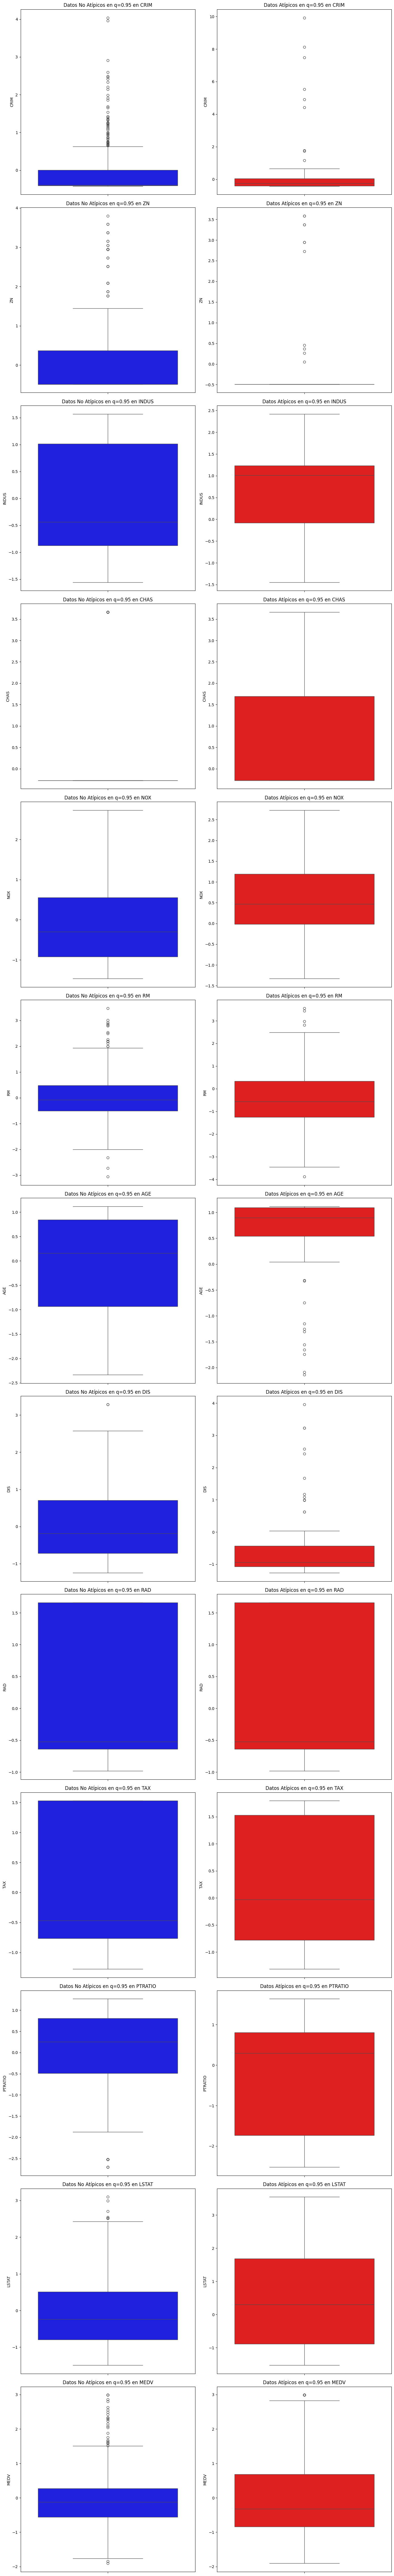

In [ ]:
# Lista de variables a considerar para los diagramas de cajas
variables = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]
# Crear la figura y los subgráficos
fig, axs = plt.subplots(len(variables), 2, figsize=(14, 7*len(variables)))

for i, variable in enumerate(variables):
    # Filtrar los datos atípicos y no atípicos en q0.95 para la columna actual
    dates_not_atypicals = df_escaled_DM[df_escaled_DM['q_0.95'] == 'No atípico'][variable]
    dates_atypicals = df_escaled_DM[df_escaled_DM['q_0.95'] != 'No atípico'][variable]

    # Diagrama de cajas para datos no atípicos
    sns.boxplot(y=dates_not_atypicals, ax=axs[i, 0], color='b')
    axs[i, 0].set_title(f'Datos No Atípicos en q=0.95 en {variable}')
    axs[i, 0].set_ylabel(variable)

    # Diagrama de cajas para datos atípicos
    sns.boxplot(y=dates_atypicals, ax=axs[i, 1], color='r')
    axs[i, 1].set_title(f'Datos Atípicos en q=0.95 en {variable}')
    axs[i, 1].set_ylabel(variable)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

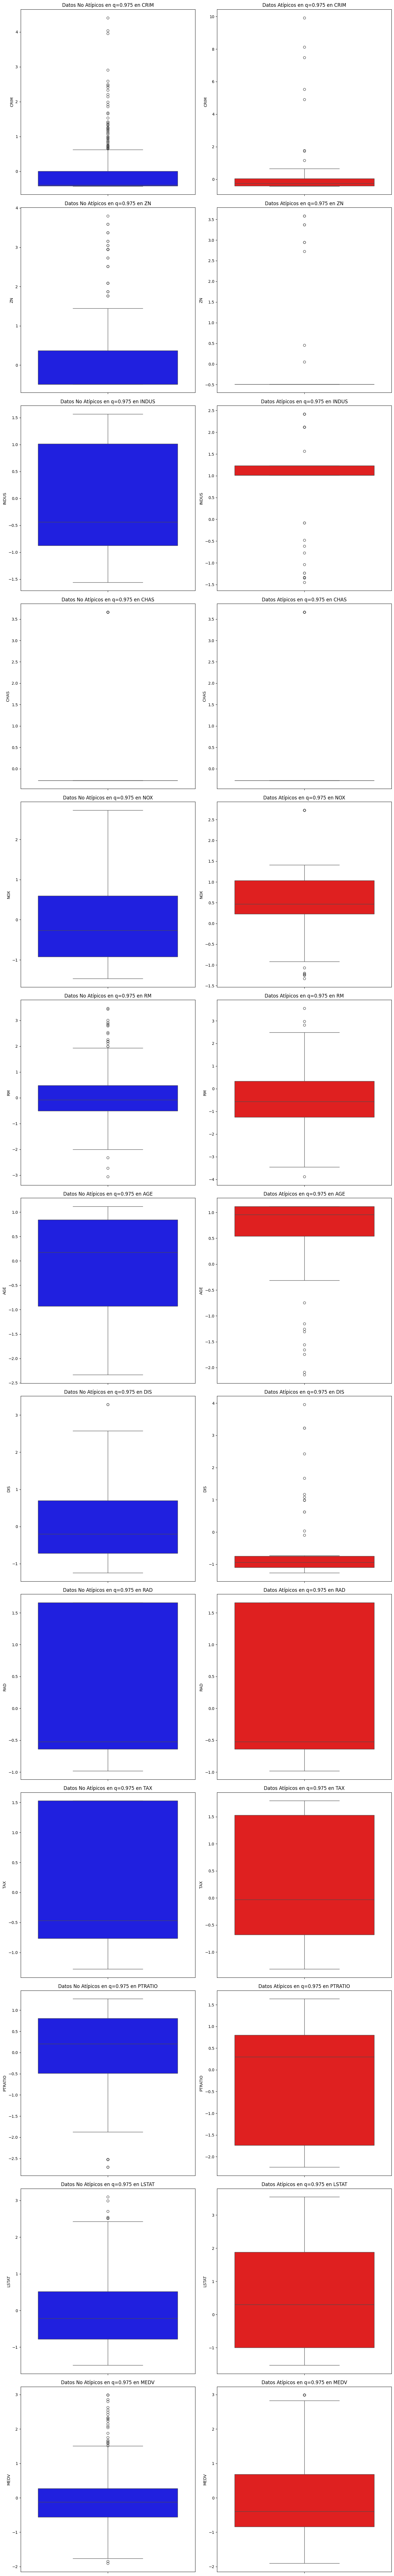

In [ ]:
# Lista de variables a considerar para los diagramas de cajas
variables = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]
# Crear la figura y los subgráficos
fig, axs = plt.subplots(len(variables), 2, figsize=(14, 7*len(variables)))

for i, variable in enumerate(variables):
    # Filtrar los datos atípicos y no atípicos en q0.975 para la columna actual
    dates_not_atypicals = df_escaled_DM[df_escaled_DM['q_0.975'] == 'No atípico'][variable]
    dates_atypicals = df_escaled_DM[df_escaled_DM['q_0.975'] != 'No atípico'][variable]

    # Diagrama de cajas para datos no atípicos
    sns.boxplot(y=dates_not_atypicals, ax=axs[i, 0], color='b')
    axs[i, 0].set_title(f'Datos No Atípicos en q=0.975 en {variable}')
    axs[i, 0].set_ylabel(variable)

    # Diagrama de cajas para datos atípicos
    sns.boxplot(y=dates_atypicals, ax=axs[i, 1], color='r')
    axs[i, 1].set_title(f'Datos Atípicos en q=0.975 en {variable}')
    axs[i, 1].set_ylabel(variable)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

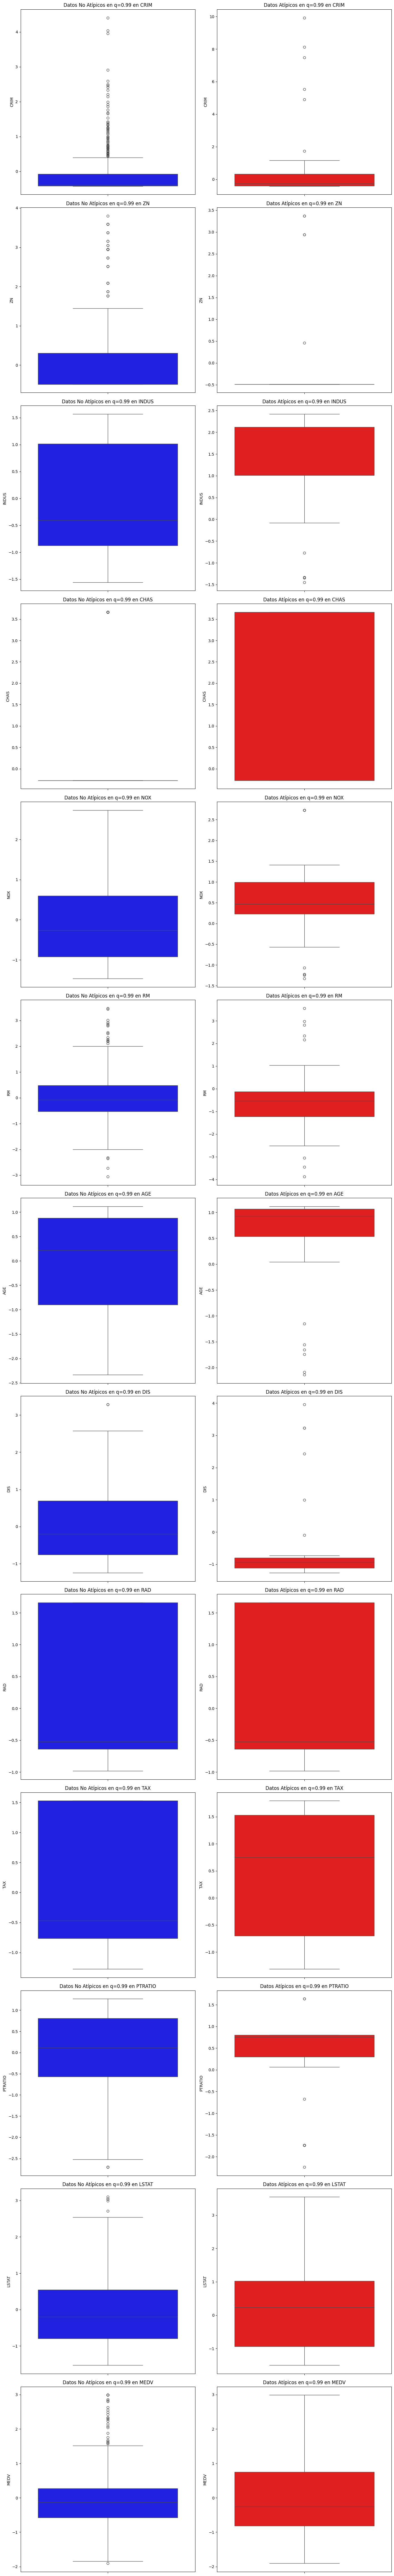

In [ ]:
# Lista de variables a considerar para los diagramas de cajas
variables = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]
# Crear la figura y los subgráficos
fig, axs = plt.subplots(len(variables), 2, figsize=(14, 7*len(variables)))

for i, variable in enumerate(variables):
    # Filtrar los datos atípicos y no atípicos en q0.99 para la columna actual
    dates_not_atypicals = df_escaled_DM[df_escaled_DM['q_0.99'] == 'No atípico'][variable]
    dates_atypicals = df_escaled_DM[df_escaled_DM['q_0.99'] != 'No atípico'][variable]

    # Diagrama de cajas para datos no atípicos
    sns.boxplot(y=dates_not_atypicals, ax=axs[i, 0], color='b')
    axs[i, 0].set_title(f'Datos No Atípicos en q=0.99 en {variable}')
    axs[i, 0].set_ylabel(variable)

    # Diagrama de cajas para datos atípicos
    sns.boxplot(y=dates_atypicals, ax=axs[i, 1], color='r')
    axs[i, 1].set_title(f'Datos Atípicos en q=0.99 en {variable}')
    axs[i, 1].set_ylabel(variable)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##### Método 2

In [20]:
# Z es nuestra matriz de datos del dataframe df
Z = df.to_numpy()

# Calcular la media y la matriz de covarianza
mu = np.mean(Z, axis=0)
cov = np.cov(Z, rowvar=False)

# Calcular la distancia de Mahalanobis para cada observación
MD = np.array([distance.mahalanobis(z, mu, np.linalg.inv(cov)) for z in Z])

# Calcular los puntos de corte para diferentes valores de q
q_values = [0.90, 0.95, 0.975, 0.99]
cutoffs = {q: chi2.ppf(q, Z.shape[1]) for q in q_values}

# Identificar las observaciones atípicas para cada valor de q
outliers = {q: Z[MD**2 > cutoff] for q, cutoff in cutoffs.items()}

In [21]:
outliers

{0.9: array([[2.1124e-01, 1.2500e+01, 7.8700e+00, ..., 1.5200e+01, 2.9930e+01,
         1.6500e+01],
        [2.5387e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.0810e+01,
         1.4400e+01],
        [1.3600e-02, 7.5000e+01, 4.0000e+00, ..., 2.1100e+01, 1.4800e+01,
         1.8900e+01],
        ...,
        [2.0746e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 2.9680e+01,
         8.1000e+00],
        [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 1.8070e+01,
         1.3600e+01],
        [1.1132e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 1.3350e+01,
         2.0100e+01]]),
 0.95: array([[2.11240e-01, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
         5.63100e+00, 1.00000e+02, 6.08210e+00, 5.00000e+00, 3.11000e+02,
         1.52000e+01, 2.99300e+01, 1.65000e+01],
        [2.53870e-01, 0.00000e+00, 6.91000e+00, 0.00000e+00, 4.48000e-01,
         5.39900e+00, 9.53000e+01, 5.87000e+00, 3.00000e+00, 2.33000e+02,
         1.79000e+01, 3.08100e+01, 1.44000e+01],
    

In [22]:
num_outliers = {q: len(outliers[q]) for q in q_values}

# Imprimir el número de outliers para cada valor de q
for q in q_values:
    print("Número de outliers para q =", q, ":", num_outliers[q])

Número de outliers para q = 0.9 : 85
Número de outliers para q = 0.95 : 63
Número de outliers para q = 0.975 : 55
Número de outliers para q = 0.99 : 38


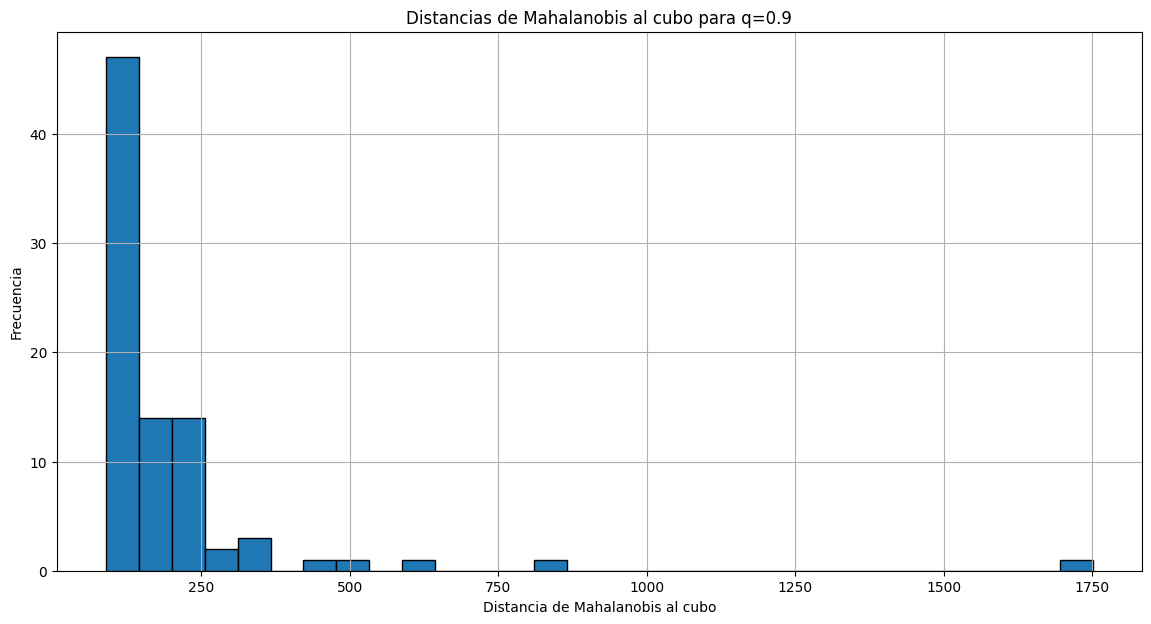

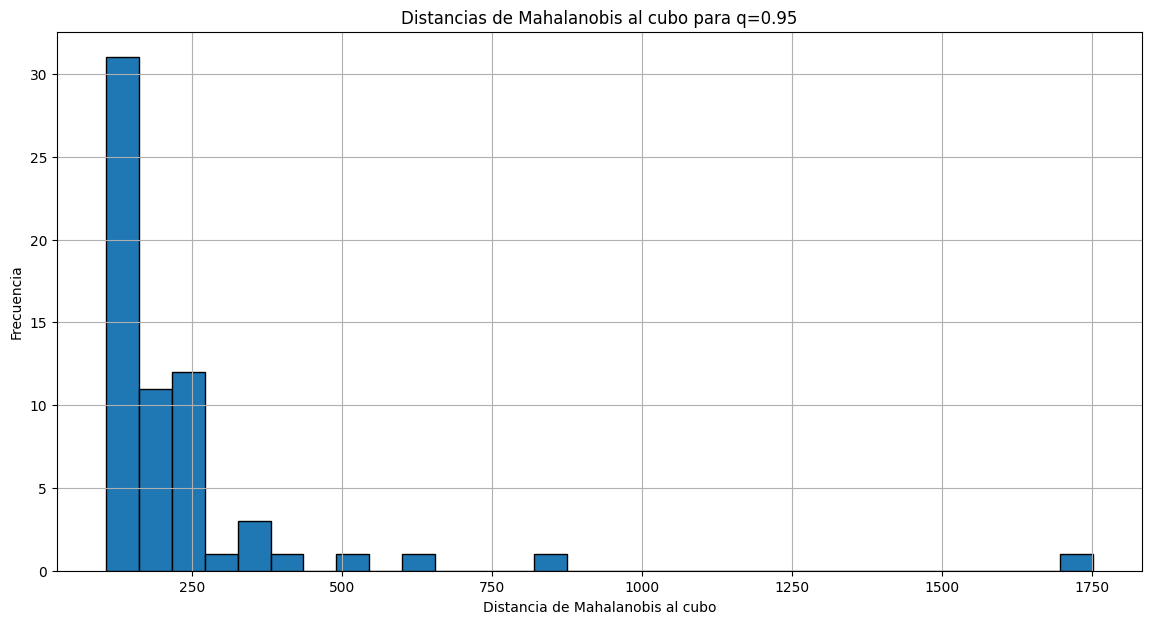

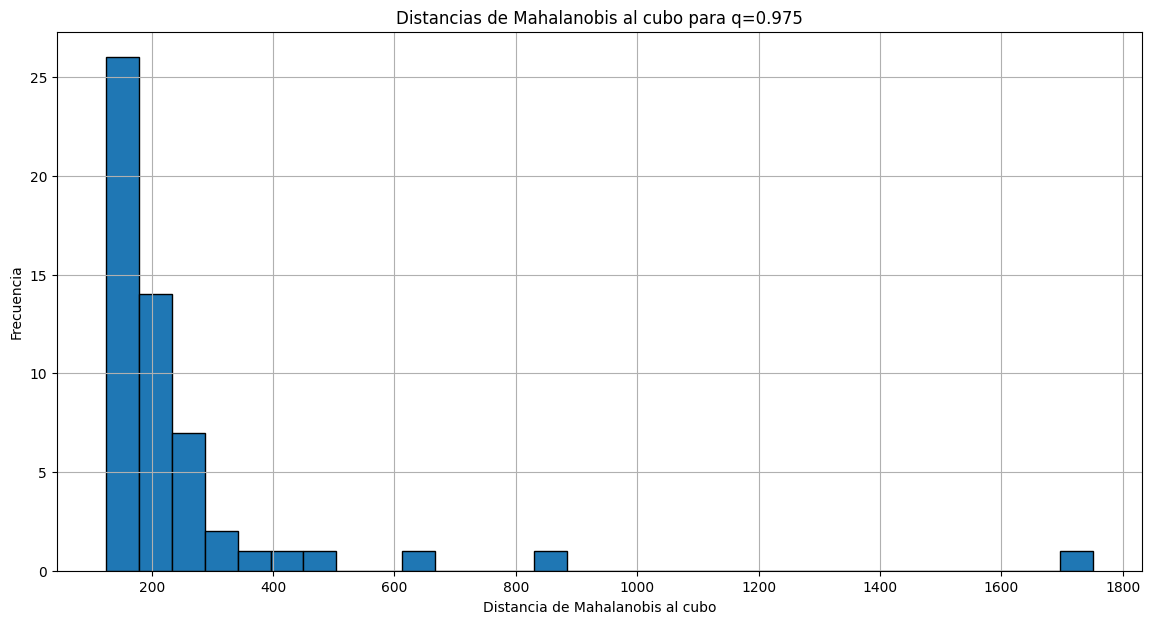

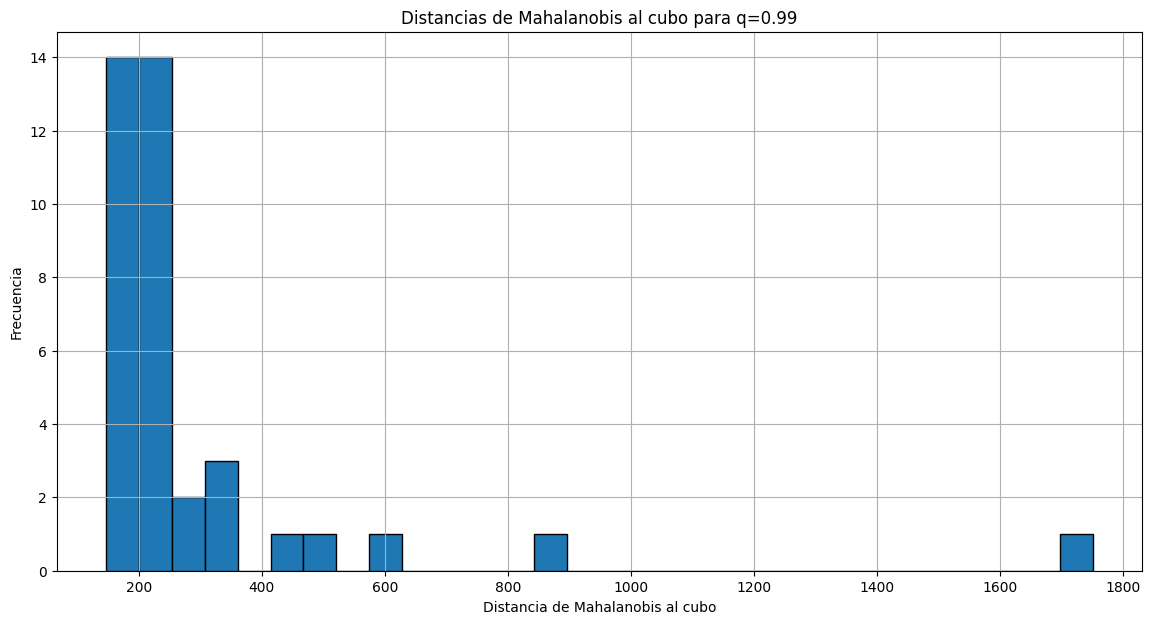

In [23]:
# Calcular las distancias de Mahalanobis al cubo para cada valor de q
MD_cubed = {q: MD[MD**2 > cutoff]**3 for q, cutoff in cutoffs.items()}


# Crear un gráfico para cada valor de q
for q, distances in MD_cubed.items():
    plt.figure(figsize=(14, 7))
    plt.hist(distances, bins=30, edgecolor='black')
    plt.title(f'Distancias de Mahalanobis al cubo para q={q}')
    plt.xlabel('Distancia de Mahalanobis al cubo')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

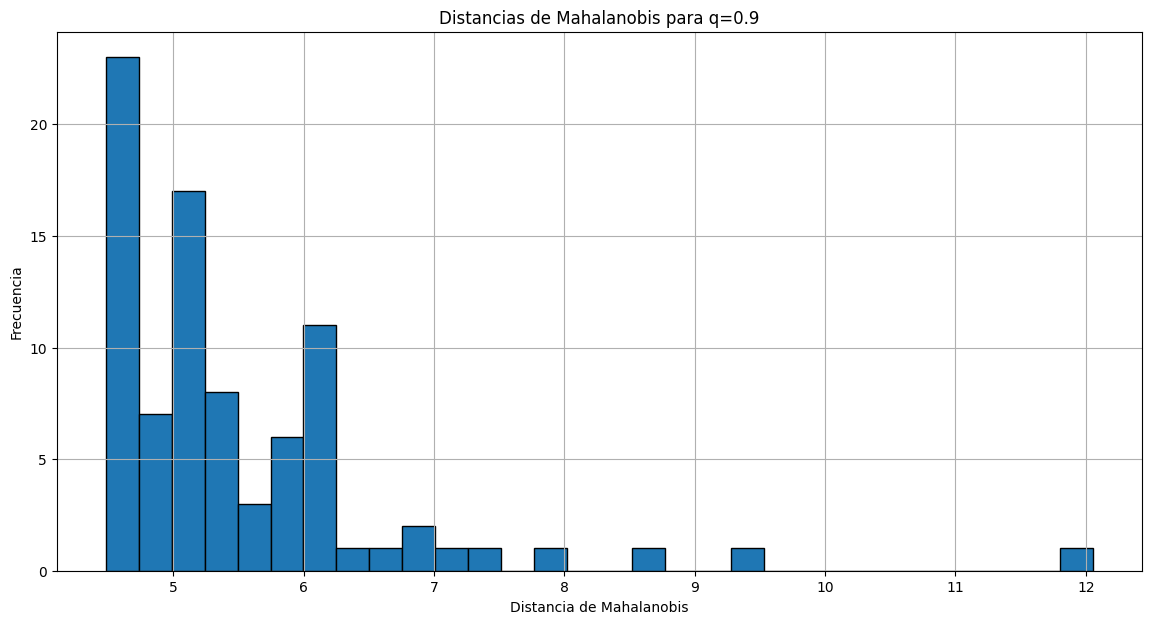

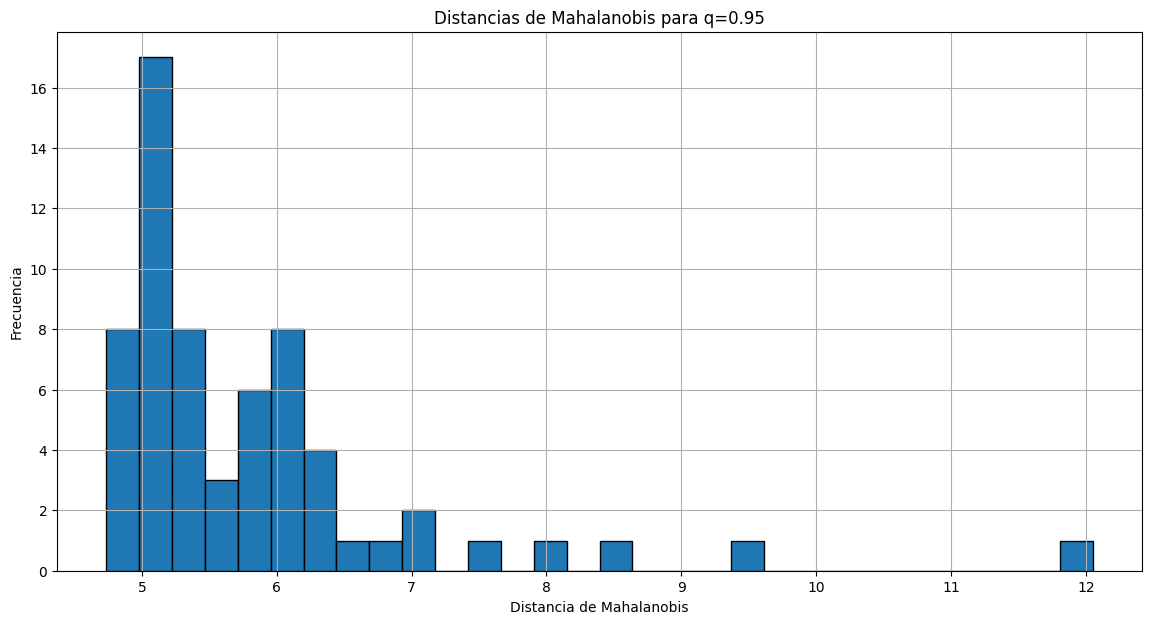

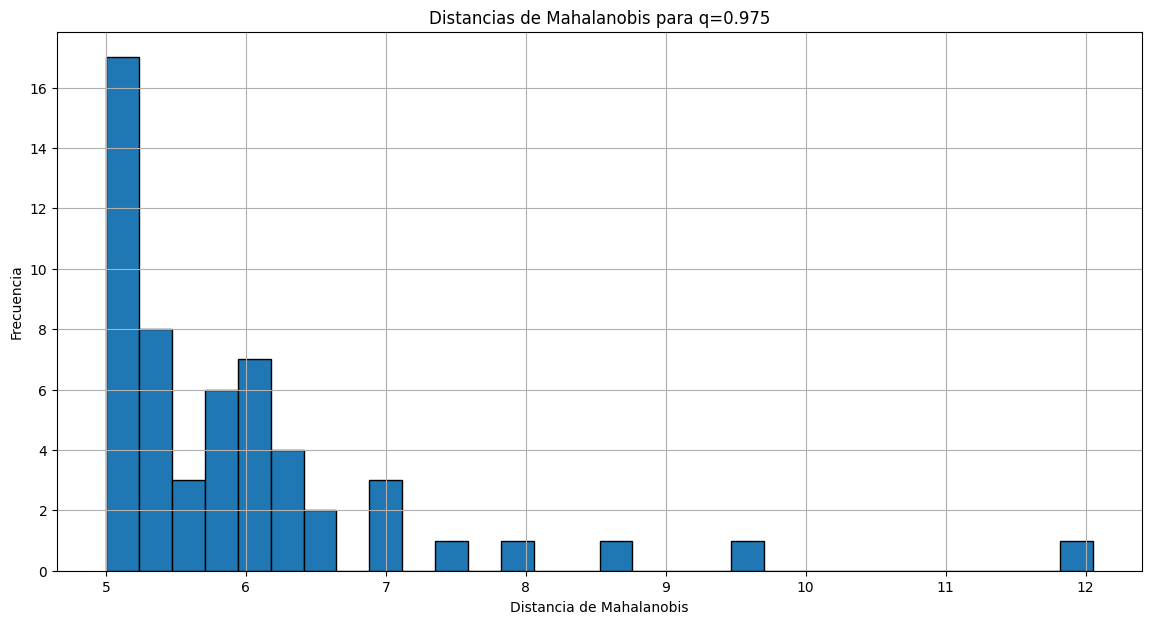

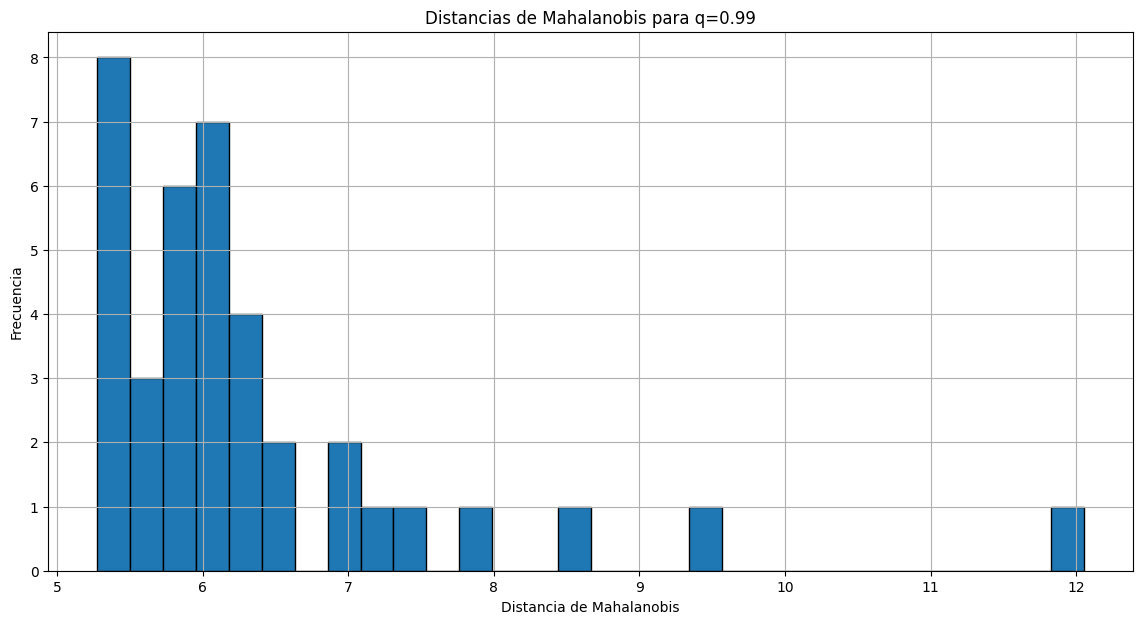

In [25]:
# Calcular las distancias de Mahalanobis para cada valor de q
MD_cubed = {q: MD[MD**2 > cutoff] for q, cutoff in cutoffs.items()}

# Crear un gráfico para cada valor de q
for q, distances in MD_cubed.items():
    plt.figure(figsize=(14, 7))
    plt.hist(distances, bins=30, edgecolor='black')
    plt.title(f'Distancias de Mahalanobis para q={q}')
    plt.xlabel('Distancia de Mahalanobis')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

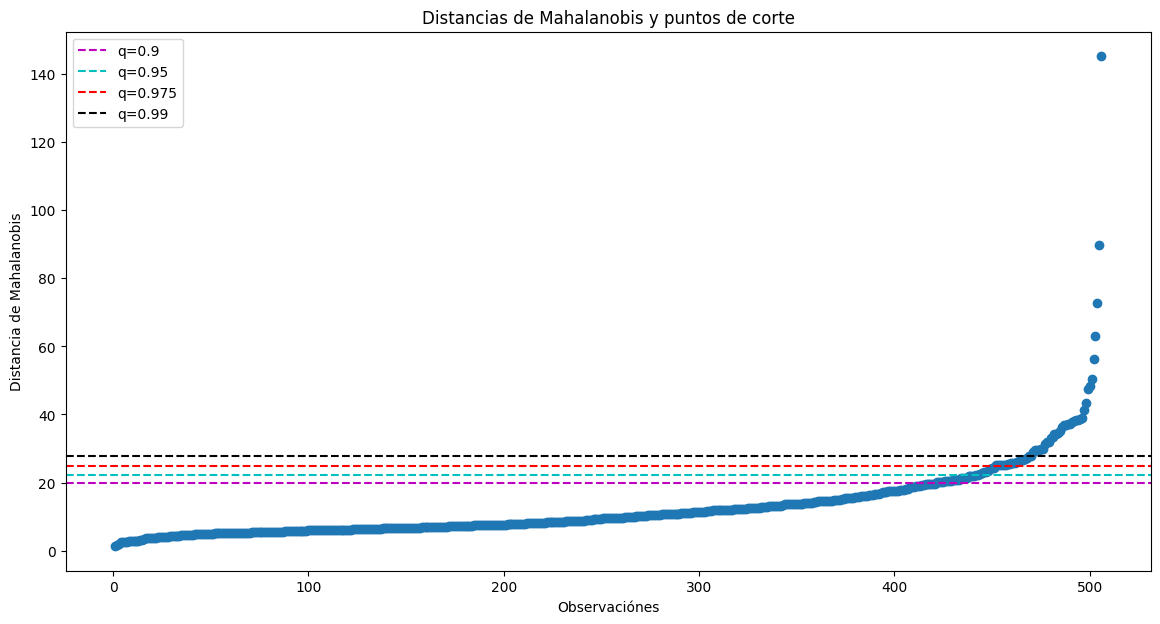

In [49]:
# Ordenamos las distancias de Mahalanobis en orden ascendente
MD_sorted = np.sort(MD**2)

# Creamos un array con el número de observaciones
obs = np.arange(1, len(MD) + 1)

# Creamos un gráfico
plt.figure(figsize=(14, 7))

# Dibujamos las distancias de Mahalanobis
plt.plot(obs, MD_sorted, marker='o', linestyle='none')

# Definimos una lista de colores
colors = ['m', 'c', 'r', 'k']

# Dibujamos los puntos de corte para diferentes valores de q
for i, (q, cutoff) in enumerate(cutoffs.items()):
    plt.axhline(y=cutoff, color=colors[i], linestyle='--', label=f'q={q}')

# Añadimos leyenda
plt.legend()

# Añadimos títulos a los ejes y al gráfico
plt.title('Distancias de Mahalanobis y puntos de corte')
plt.xlabel('Observaciónes')
plt.ylabel('Distancia de Mahalanobis')

# Mostramos el gráfico
plt.show()


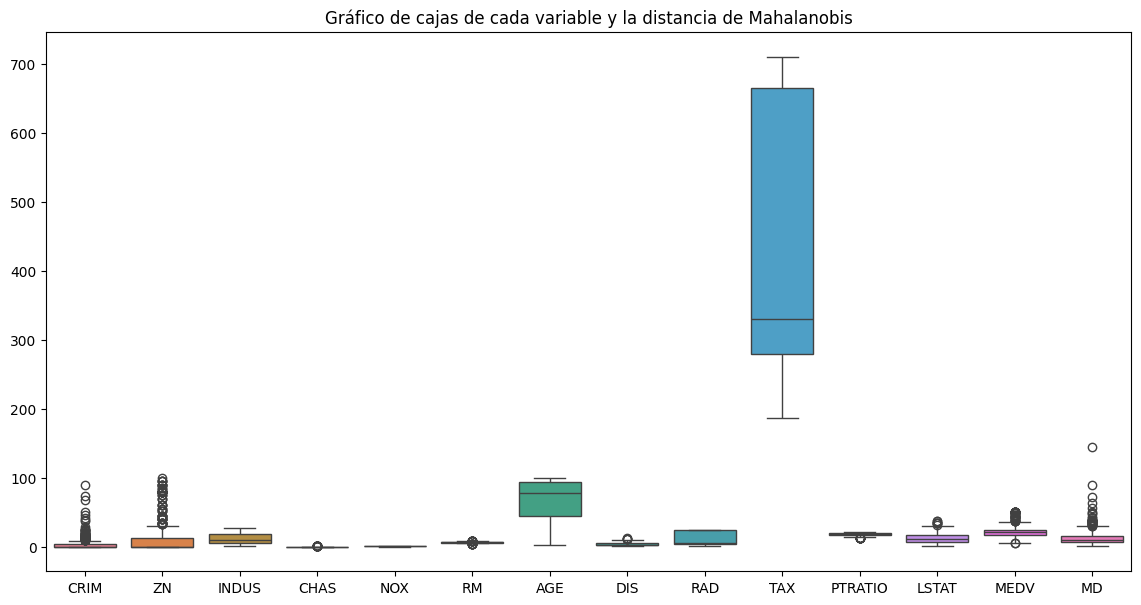

In [59]:
# Añadimos la distancia de Mahalanobis como una nueva columna a los datos
Z_with_MD = np.column_stack((Z, MD**2))

# Convertimos los datos a un DataFrame de pandas para facilitar la visualización
df2 = pd.DataFrame(Z_with_MD, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"] + ['MD'])

# Creamos un gráfico de cajas para cada variable
plt.figure(figsize=(14, 7))
sns.boxplot(data=df2)
plt.title('Gráfico de cajas de cada variable y la distancia de Mahalanobis')
plt.show()


##### Conclusiones

¿Qué puede concluir acerca de los individuos atípicos para cada punto de corte?

Los individuos atípicos son aquellos cuya distancia de Mahalanobis es mayor que el punto de corte de la distribución Chi-cuadrado para un valor dado de q. A medida que aumenta q, el punto de corte aumenta y por lo tanto, menos observaciones se consideran atípicas. En este orden de ideas apuntaremos nuestras concluciones con el q = 0.90 que es el que realizar un corte de de atípicos más estricto.

¿Quiénes son? Los individuos atípicos son aquellos que se encuentran en el dataframe resultados_df etiquetados con atípicops por cada uno de los valores dados de q.

¿El gráfico de distancias muestra alguna observación NO atípica que para usted si lo fue? No, incluso creo que en q = 0.90 donde se se es más estricto dependiendo de conocimento del negocio podría incluso a verse como atípico algúna observación que no lo fuera.

¿Qué puede concluir acerca del comportamiento de q en el valor del punto de corte?
En teoría y en la practica de este ejercicio, a medida que aumenta q, el punto de corte de la distribución Chi-cuadrado también aumenta. Esto significa que a medida que aumenta q, menos observaciones se consideran atípicas. Entonces cuanto más tiende a 1 q el algoritmo es más blando a la hora de determinar observaciones atípicas.

#### - Realice dos modelos de regresión Robusto–Regularizado, combinando la técnica de detección de atípicos multivariantes más la regularización Elastic-Net.

Encuentre los valores óptimos de $α^{*}$ y $λ^{*}$, interprete los coeficientes de regresión, escriba la respectiva ecuación de regresión resultante y valide los supuestos del modelo $(ε_i \ iid∼   N(0, σ^{2}))$. Finalmente, realice una predicción con las observaciones de prueba y determine el **RMSE** de estos dos modelos. Compare los resultados con los modelos estimados en el ítem 1.

  NOTA: La aplicación de la técnica de detección de atípicos debe realizarla de la siguiente manera:
  
  - Modelo 1: Estandarizar las variables y calcular MD usando el vector de medianas en vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz de covarianzas usual. Luego, eliminar los atípicos y con la muestra limpia estimar el modelo regularizado.

  - Modelo 2: Estandarizar las variables y calcular MD usando el vector de medianas en vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz de covarianzas usual. Luego, determinar como observaciones NO atípicas los primeros r n+p+1 l individuos con las distancias más pequeñas. Finalmente, con la muestra limpia estimar el modelo regularizado.
  
  Ejemplo: Si $n = 1000$ y $p = 100$ entonces r n+p+1 l = r 1000+100+1 l = r550.5l = 551. 2	2 Es decir, debe identificar como NO atípicos los 551 individuos de la muestra con las distancias de Mahalanobis más pequeñas.

In [123]:
df_escaled

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1   -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2   -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3   -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4   -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.412820 -0.487240  0.115624 -0.272329  0.157968  0.438881  0.018654   
502 -0.414839 -0.487240  0.115624 -0.272329  0.157968 -0.234316  0.288648   
503 -0.413038 -0.487240  0.115624 -0.272329  0.157968  0.983986  0.796661   
504 -0.407361 -0.487240  0.115624 -0.272329  0.157968  0.724955  0.736268   
505 -0.414590 -0.487240  0.115624 -0.272329  0.157968 -0.362408  0.434302   

          DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  MAHALANOBIS  
0    0.140075 -0.981871 -0.665949 -1.457558 -1.074499  0.159528     3.027744  
1    0.556609 -0.867024 -0.986353 -0.302794 -0.491953 -0.101424     2.267597  
2    0.556609 -0.867024 -0.986353 -0.302794 -1.207532  1.322937     2.390498  
3    1.076671 -0.752178 -1.105022  0.112920 -1.360171  1.181589     2.812821  
4    1.076671 -0.752178 -1.105022  0.112920 -1.025487  1.486032     3.190760  
..        ...       ...       ...       ...       ...       ...          ...  
501 -0.625178 -0.981871 -0.802418  1.175303 -0.417734 -0.014440     2.982897  
502 -0.715931 -0.981871 -0.802418  1.175303 -0.500355 -0.210154     2.973166  
503 -0.772919 -0.981871 -0.802418  1.175303 -0.982076  0.148655     3.554721  
504 -0.667776 -0.981871 -0.802418  1.175303 -0.864446 -0.057932     3.387242  
505 -0.612640 -0.981871 -0.802418  1.175303 -0.668397 -1.156104     3.778616  

[506 rows x 14 columns]

In [124]:
df_escaled.drop('MAHALANOBIS', axis=1, inplace=True)
df_escaled

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1   -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2   -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3   -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4   -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.412820 -0.487240  0.115624 -0.272329  0.157968  0.438881  0.018654   
502 -0.414839 -0.487240  0.115624 -0.272329  0.157968 -0.234316  0.288648   
503 -0.413038 -0.487240  0.115624 -0.272329  0.157968  0.983986  0.796661   
504 -0.407361 -0.487240  0.115624 -0.272329  0.157968  0.724955  0.736268   
505 -0.414590 -0.487240  0.115624 -0.272329  0.157968 -0.362408  0.434302   

          DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
0    0.140075 -0.981871 -0.665949 -1.457558 -1.074499  0.159528  
1    0.556609 -0.867024 -0.986353 -0.302794 -0.491953 -0.101424  
2    0.556609 -0.867024 -0.986353 -0.302794 -1.207532  1.322937  
3    1.076671 -0.752178 -1.105022  0.112920 -1.360171  1.181589  
4    1.076671 -0.752178 -1.105022  0.112920 -1.025487  1.486032  
..        ...       ...       ...       ...       ...       ...  
501 -0.625178 -0.981871 -0.802418  1.175303 -0.417734 -0.014440  
502 -0.715931 -0.981871 -0.802418  1.175303 -0.500355 -0.210154  
503 -0.772919 -0.981871 -0.802418  1.175303 -0.982076  0.148655  
504 -0.667776 -0.981871 -0.802418  1.175303 -0.864446 -0.057932  
505 -0.612640 -0.981871 -0.802418  1.175303 -0.668397 -1.156104  

[506 rows x 13 columns]

###### Modelos

In [120]:
# Z es nuestra matriz de datos del dataframe df
Z = df.drop('MEDV', axis=1).to_numpy()

# Modelo 1
# Eliminamos los atípicos y estimamos el modelo regularizado
non_outliers_1 = MD < np.percentile(MD, 95)  # Ajusta este valor según tus necesidades
Z1 = Z[non_outliers_1]
y1 = Y[non_outliers_1]
model1 = ElasticNetCV(cv=5).fit(Z1, y1)

# Modelo 2
# Determinamos como observaciones NO atípicas los primeros r individuos
# con las distancias más pequeñas
n = Z.shape[0]
r = int(np.round(np.sqrt(n + p + 1)))
non_outliers_2 = np.argsort(MD)[:r]
Z2 = Z[non_outliers_2]
y2 = Y[non_outliers_2]
model2 = ElasticNetCV(cv=5).fit(Z2, y2)


###### Predicciones y calculo de RMSE

In [121]:
# Hacemos predicciones con las observaciones de prueba
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Calculamos el RMSE de estos dos modelos
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

In [118]:
rmse1

5.833156287157161

In [119]:
rmse2

8.733089470828403

En esta modaliad se determina teneindo en cuenta el valor de RMSE que el modelo optimo sería el modelo 1

Normalidad de los residuos: Puedes usar la prueba de Anderson-Darling para verificar si los residuos siguen una distribución normal.

In [134]:
# Calculamos los residuos
residuos1 = y1 - model1.predict(Z1)
residuos2 = y2 - model2.predict(Z2)

# Realizamos la prueba de Anderson-Darling
resultado1 = anderson(residuos1)
resultado2 = anderson(residuos2)

print(f"Estadístico de Anderson-Darling para el modelo 1: {resultado1.statistic}")
print(f"Estadístico de Anderson-Darling para el modelo 2: {resultado2.statistic}")

Estadístico de Anderson-Darling para el modelo 1: 10.08540585653742
Estadístico de Anderson-Darling para el modelo 2: 0.3921913682759097


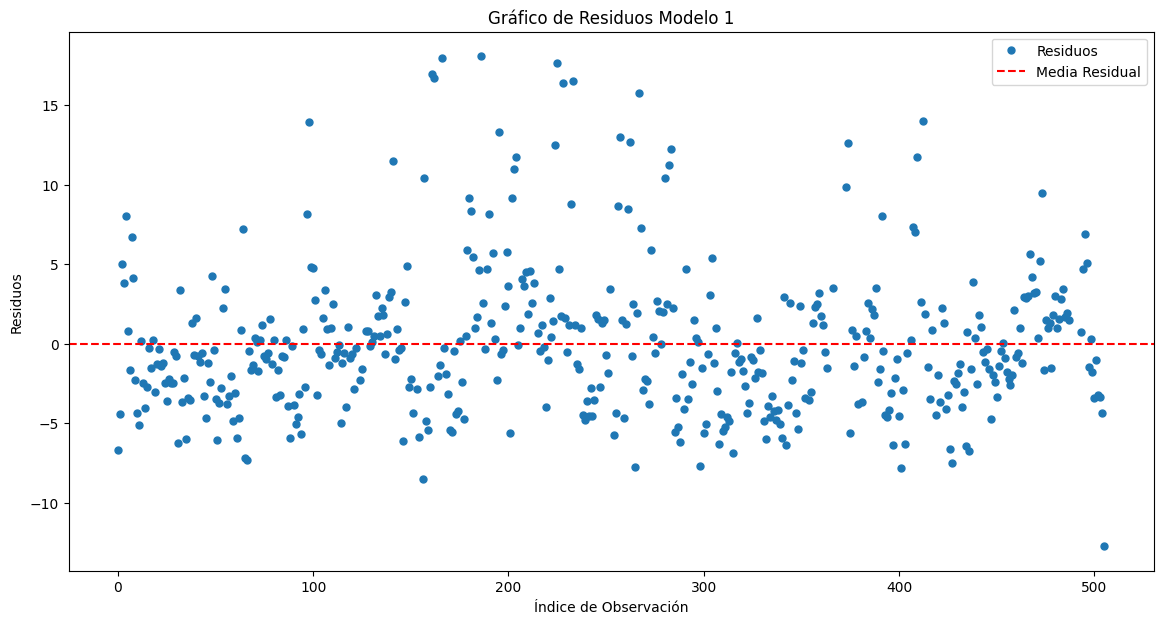

In [137]:
#Gráfico de residuos:
plt.figure(figsize=(14, 7))
plt.plot(residuos1, marker='o', linestyle='', ms=5, label='Residuos')
plt.axhline(y=0, color='r', linestyle='--', label='Media Residual')
plt.title('Gráfico de Residuos Modelo 1')
plt.xlabel('Índice de Observación')
plt.ylabel('Residuos')
plt.legend()
plt.show()

In [142]:
#Estadístico de Durbin-Watson:
dw_stat = durbin_watson(residuos1)
print(f'Estadístico de Durbin-Watson de modelo 1: {dw_stat}')

Estadístico de Durbin-Watson de modelo 1: 1.1698457728168783


Al obtener un valor inferior a 1.5 se asume un problema de autocorrelacion potencialmente grave en el modelo 1

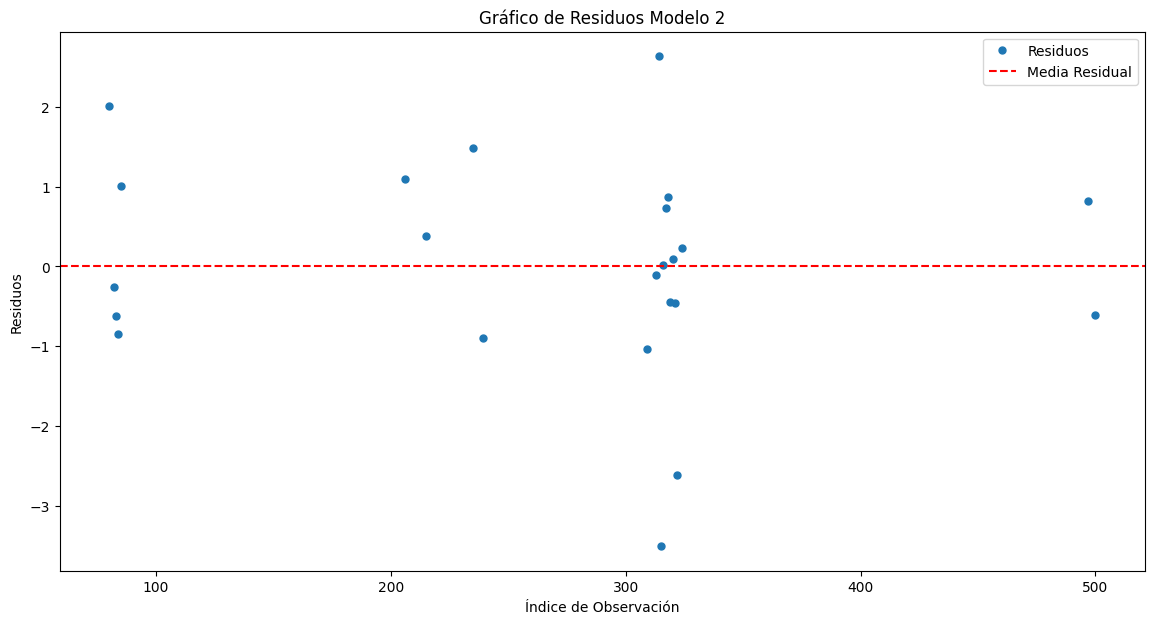

In [143]:
#Gráfico de residuos:
plt.figure(figsize=(14, 7))
plt.plot(residuos2, marker='o', linestyle='', ms=5, label='Residuos')
plt.axhline(y=0, color='r', linestyle='--', label='Media Residual')
plt.title('Gráfico de Residuos Modelo 2')
plt.xlabel('Índice de Observación')
plt.ylabel('Residuos')
plt.legend()
plt.show()

In [144]:
#Estadístico de Durbin-Watson:
dw_stat = durbin_watson(residuos2)
print(f'Estadístico de Durbin-Watson de modelo 2: {dw_stat}')

Estadístico de Durbin-Watson de modelo 2: 1.6383088075223273


Al obtener un valor superiorr a 1.5 y menor a 2.5 se asume que no hay problemas de autocorrelacion potencialmente grave en el modelo 2

Si el estadístico de Anderson-Darling es menor que los valores críticos, entonces no puedes rechazar la hipótesis nula de que los residuos siguen una distribución normal.

Homocedasticidad (varianza constante de los residuos): Puedes hacer un gráfico de los residuos frente a los valores ajustados. Si los residuos se distribuyen de manera uniforme alrededor de cero sin ningún patrón discernible, entonces puedes asumir homocedasticidad.

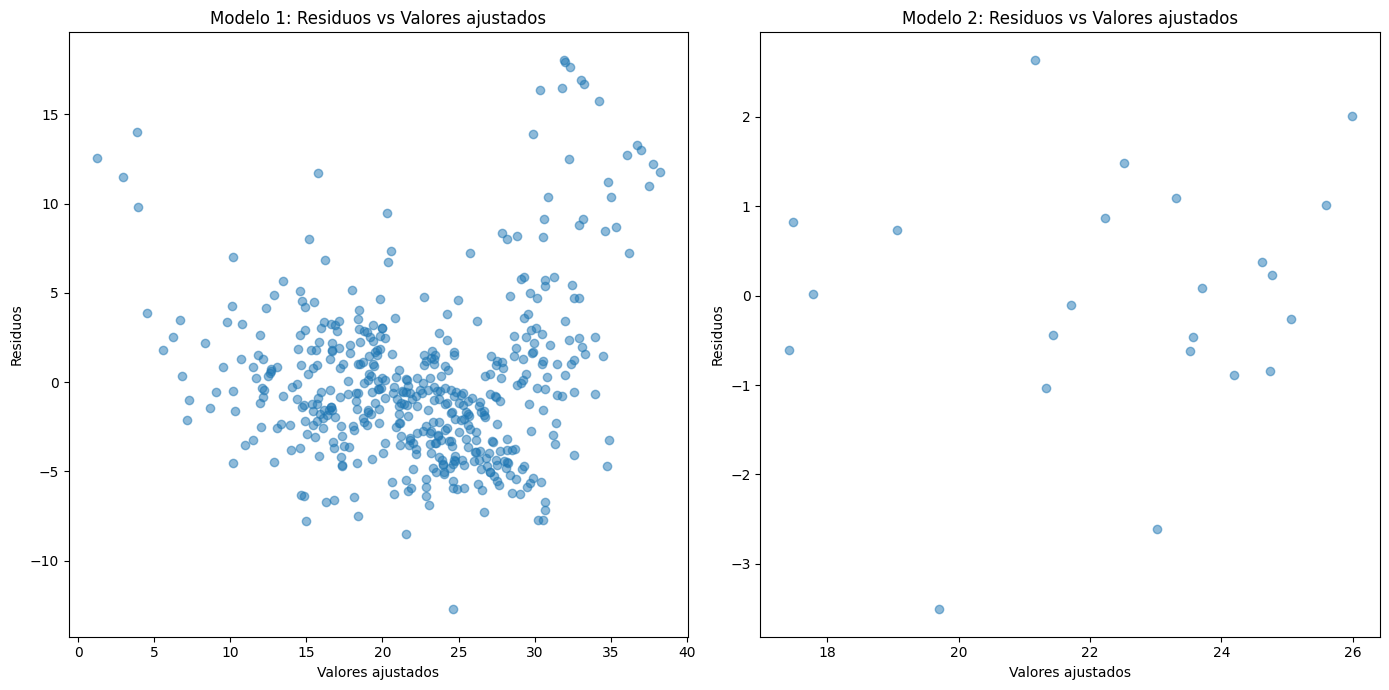

In [136]:
# Calculamos los valores ajustados
ajustados1 = model1.predict(Z1)
ajustados2 = model2.predict(Z2)

# Hacemos los gráficos
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(ajustados1, residuos1, alpha=0.5)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Modelo 1: Residuos vs Valores ajustados')

plt.subplot(1, 2, 2)
plt.scatter(ajustados2, residuos2, alpha=0.5)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Modelo 2: Residuos vs Valores ajustados')

plt.tight_layout()
plt.show()


Normalidad en distribución de los residuales

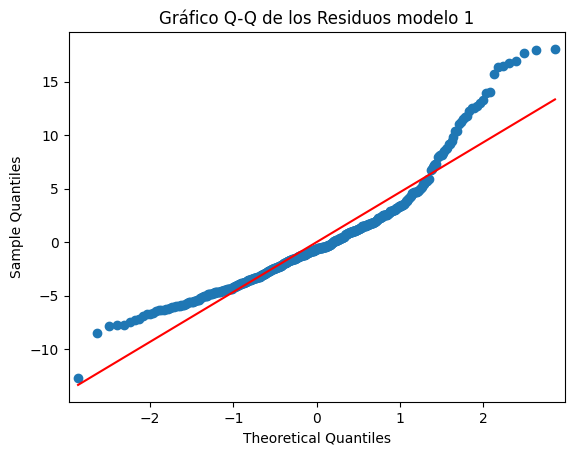

In [145]:
#Gráfico QQ
import statsmodels.api as sm
sm.qqplot(residuos1, line='s')
plt.title('Gráfico Q-Q de los Residuos modelo 1')
plt.show()

In [147]:
#Prueba de Shapiro-Wilk:
from scipy.stats import shapiro, ttest_1samp
shapiro_stat, shapiro_p_value = shapiro(residuos1)
print(f'Estadístico de Shapiro-Wilk: {shapiro_stat}, p-value: {shapiro_p_value}')

Estadístico de Shapiro-Wilk: 0.9117663502693176, p-value: 4.240594482161198e-16


El estadístico de Shapiro-Wilk es 0.9117663502693176 y el valor p asociado es extremadamente pequeño (4.240594482161198e-16).

El valor p es menor que 0.05, lo que generalmente se considera el umbral para la significancia estadística. Esto significa que podemos rechazar la hipótesis nula de que los datos siguen una distribución normal.

En otras palabras, los datos no parecen ser normalmente distribuidos según la prueba de Shapiro-Wilk.

Esto podría tener implicaciones para el modelo, dependiendo de los supuestos que haga tu modelo sobre la distribución de los datos. Muchos modelos estadísticos asumen que los errores (o a veces las variables dependientes) están normalmente distribuidos, y si esta suposición se viola, puede afectar la validez de tus resultados de modelado.

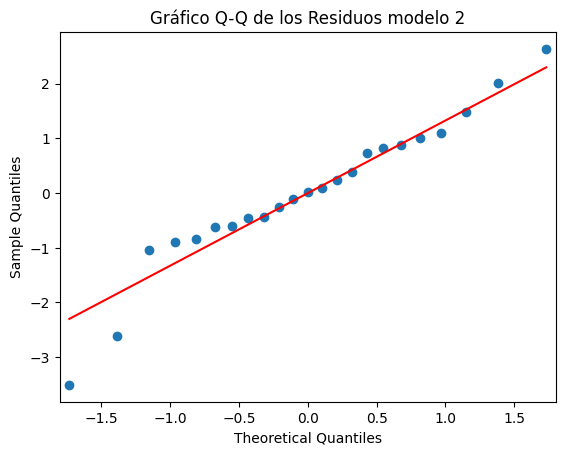

In [146]:
#Gráfico QQ
import statsmodels.api as sm
sm.qqplot(residuos2, line='s')
plt.title('Gráfico Q-Q de los Residuos modelo 2')
plt.show()

In [148]:
#Prueba de Shapiro-Wilk:
from scipy.stats import shapiro, ttest_1samp
shapiro_stat, shapiro_p_value = shapiro(residuos2)
print(f'Estadístico de Shapiro-Wilk: {shapiro_stat}, p-value: {shapiro_p_value}')

Estadístico de Shapiro-Wilk: 0.9569557905197144, p-value: 0.40473583340644836


El estadístico de Shapiro-Wilk que obtuviste es 0.9569557905197144 y el valor p asociado es 0.40473583340644836.

El valor p es mayor que 0.05, lo que generalmente se considera el umbral para la significancia estadística. Esto significa que no podemos rechazar la hipótesis nula de que los datos siguen una distribución normal.

En otras palabras, los datos parecen ser normalmente distribuidos según la prueba de Shapiro-Wilk.

Esto es una buena noticia para el modelo, especialmente si el modelo hace supuestos sobre la normalidad de los datos o los errores. Muchos modelos estadísticos, incluyendo la regresión lineal, asumen que los errores están normalmente distribuidos, y si esta suposición se cumple, podemos confiar más en los resultados del modelo 2.

Por lo tanto, basándote en la prueba de Shapiro-Wilk, parece que el modelo 2 está bien especificado en términos de la suposición de normalidad.

Valor residual Media cero

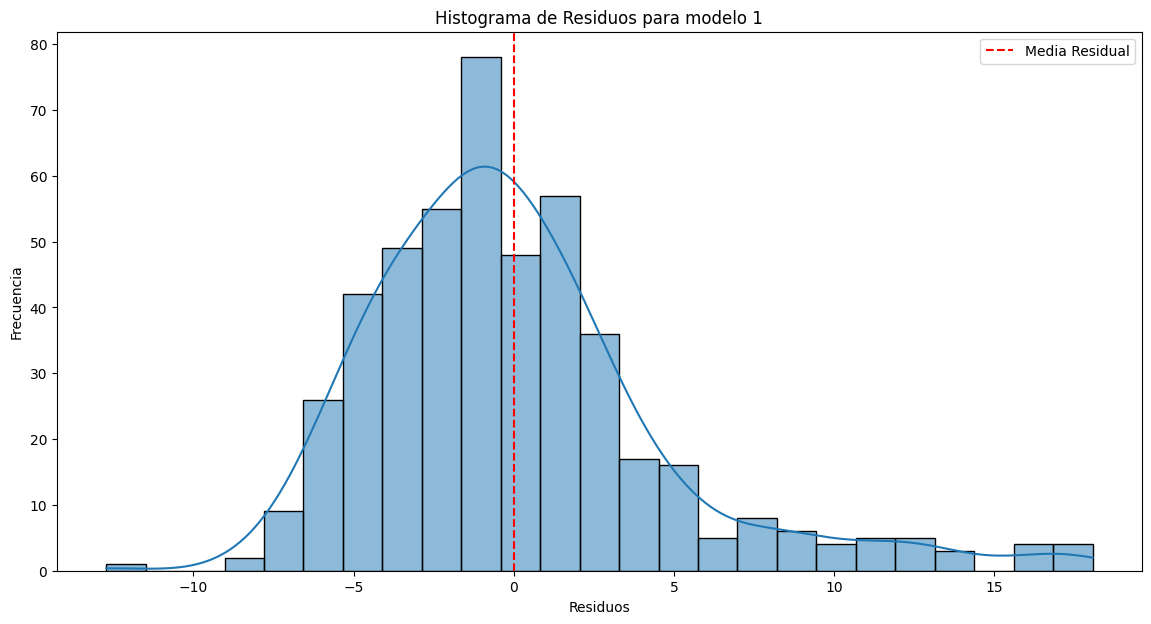

In [149]:
# Histograma de residuos
plt.figure(figsize=(14, 7))
sns.histplot(residuos1, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Media Residual')
plt.title('Histograma de Residuos para modelo 1')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [152]:
#One-Sample T-Test
t_stat, t_p_value = ttest_1samp(residuos1, 0)
print(f'Estadístico de T-Test: {t_stat}, p-value: {t_p_value}')

Estadístico de T-Test: -9.740481067998635e-15, p-value: 0.9999999999999922


El valor del estadístico de la prueba T que se obtuvo es -9.740481067998635e-15 y el valor p asociado es extremadamente alto (0.9999999999999922).

El valor p es mayor que 0.05, que es el umbral comúnmente utilizado para la significancia estadística. Esto significa que no podemos rechazar la hipótesis nula.

En otras palabras, no hay suficiente evidencia en tus datos para concluir que existe una diferencia significativa entre las medias de las poblaciones o entre la media de la población y un valor hipotético.

Por lo tanto, basándote en la prueba T, parece que el modelo 1 no muestra una diferencia significativa en las medias que está tratando de comparar

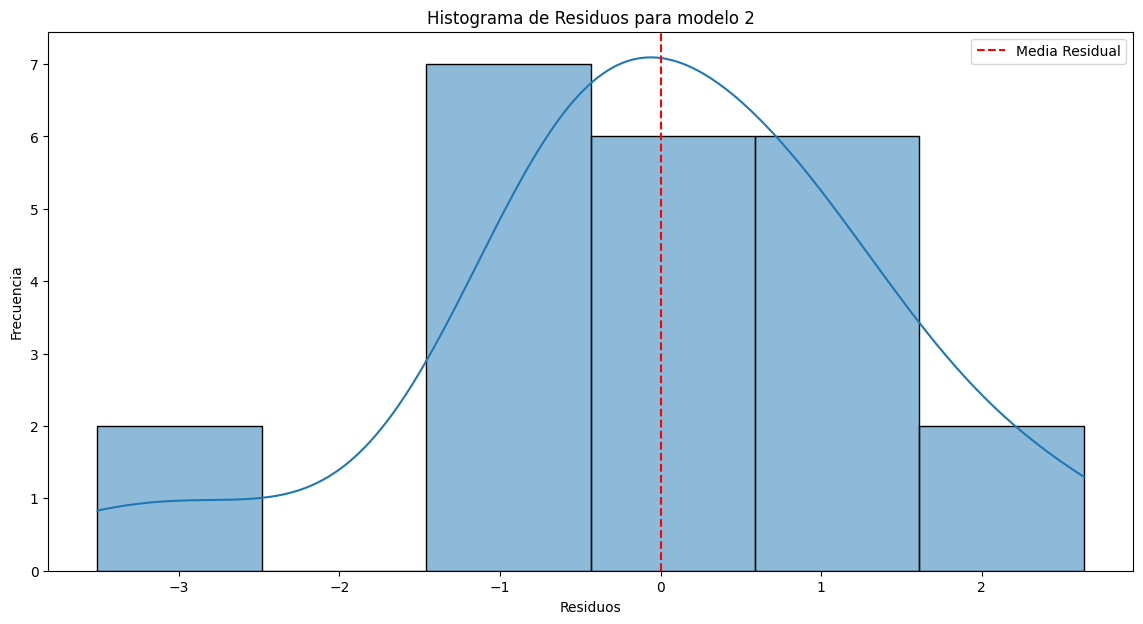

In [151]:
#Histograma de residuos
plt.figure(figsize=(14, 7))
sns.histplot(residuos2, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Media Residual')
plt.title('Histograma de Residuos para modelo 2')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [153]:
#One-Sample T-Test
t_stat, t_p_value = ttest_1samp(residuos2, 0)
print(f'Estadístico de T-Test: {t_stat}, p-value: {t_p_value}')

Estadístico de T-Test: -8.183479752999328e-15, p-value: 0.9999999999999936


El valor del estadístico de la prueba T que se obtuvo es -8.183479752999328e-15 y el valor p asociado es extremadamente alto (0.9999999999999936).

El valor p es mayor que 0.05, que es el umbral comúnmente utilizado para la significancia estadística. Esto significa que no podemos rechazar la hipótesis nula.

En otras palabras, no hay suficiente evidencia en tus datos para concluir que existe una diferencia significativa entre las medias de las poblaciones o entre la media de la población y un valor hipotético.

Por lo tanto, basándote en la prueba T, parece que el modelo 2 no muestra una diferencia significativa en las medias que está tratando de comparar.

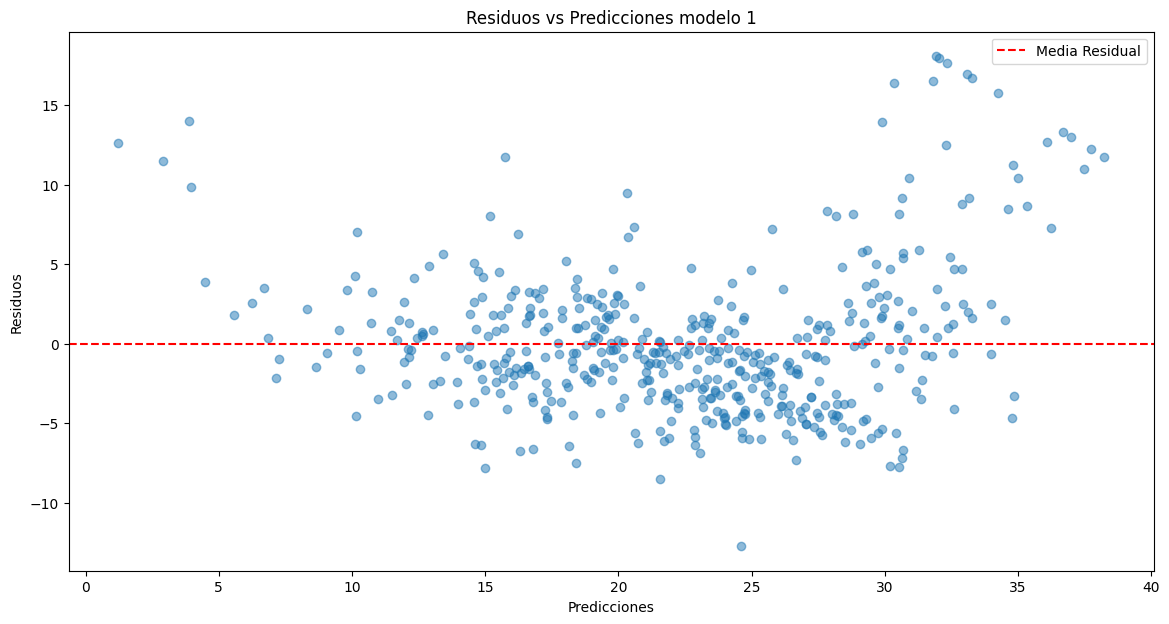

In [156]:
#Gráfico Residuos vs Predicciones:
plt.figure(figsize=(14, 7))
plt.scatter(model1.predict(Z1), residuos1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Media Residual')
plt.title('Residuos vs Predicciones modelo 1')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()
plt.show()

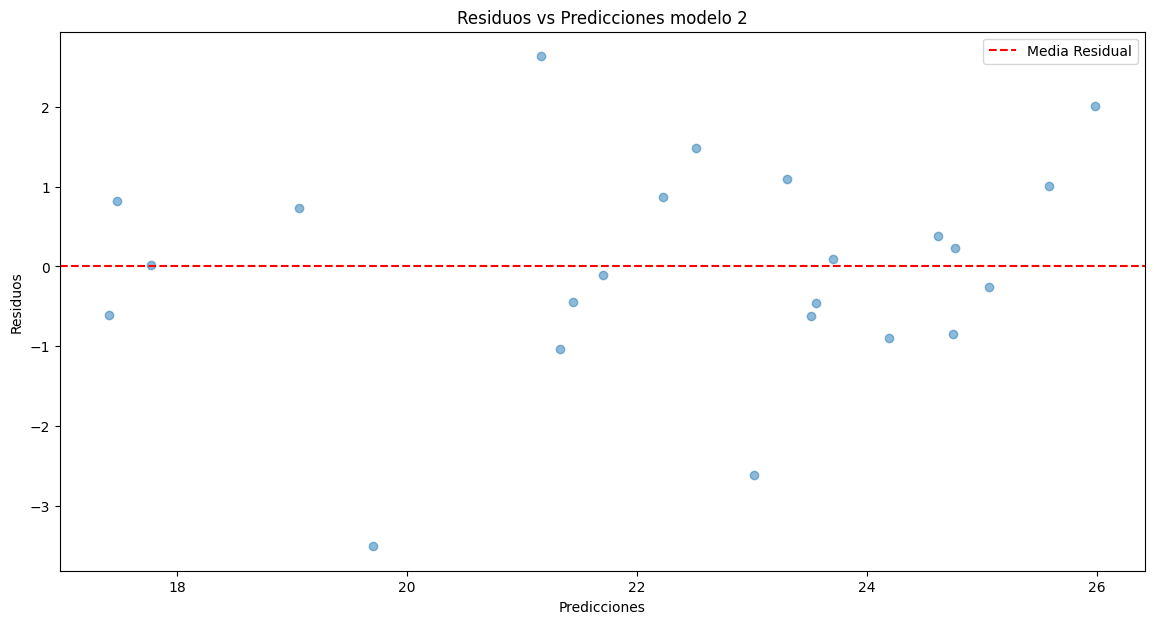

In [157]:
#Gráfico Residuos vs Predicciones:
plt.figure(figsize=(14, 7))
plt.scatter(model2.predict(Z2), residuos2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Media Residual')
plt.title('Residuos vs Predicciones modelo 2')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()
plt.show()

### Ejercicio 2. El conjunto de datos “YearPredictionMSD” contiene información sobre canciones de música popular y el año en que se grabaron.

Incluye 515345 observaciones y 90 características, como la
intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las
características espectrales. El objetivo es predecir el año en que se grabó la canción.

Carque el conjunto de datos usando la función read_csv del paquete pandas y el como primer argumento el link https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip, use como segundo
argumendo header = None.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis cuantitativa/YearPredictionMSD.txt', header=None)

In [ ]:
df.head()

0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87        88         89        90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  

[5 rows x 91 columns]

#### Conjuntos de datos
Divida el conjunto de datos en características o variables explicativas X y variable objetivo
Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.


In [ ]:
Y = df.iloc[:,0]
X = df.drop(0, axis=1)
X = sm.add_constant(X)

In [ ]:
X.columns = X.columns.astype(str)

#### Entrenamiento de modelo de regresión lineal LASSO

Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con
un coeficiente de penalización de 10, para extraer características importantes del conjunto
de variables explicativas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
model_lasso = Lasso(alpha=10)
model_lasso.fit(X_train,y_train)

Lasso(alpha=10)

Conserva el mismo numero de caracteristicas por lo tanto se espera que los coeficientes sean significativos para el modelo debido a que Lasso tiene la caracteristica de eliminar variables de forma más rapida debido la restricción en forma de diamante a la cual los coeficientes están sujetas.

In [ ]:
y_pred = model_lasso.predict(X_test)

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

n = len(y_test) # número de muestras en el conjunto de prueba
p = X_test.shape[1] # número de características

adjusted_r2 = adjusted_r2_score(y_test, y_pred, n, p)
print("Adjusted R^2 Score:", adjusted_r2)

Adjusted R^2 Score: 0.14944271407675236


In [ ]:
#Numero de coeficientes del modelo
len(model_lasso.coef_)

91

No se elimina ninguna variable por ello se ajusta el modelo de regresión lineal con el mismo conjunto de datos de entrenamiento

#### Entrenamiento de modelo regresión lineal OLS

In [ ]:
model = sm.OLS(y_train,X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1420.
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:            -1.5155e+06
No. Observations:              412276   AIC:                         3.031e+06
Df Residuals:                  412185   BIC:                         3.032e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1951.1169      0.212   9203.931      0.0

In [ ]:
y_pred_ols = results.predict(X_test)
adjusted_r2 = adjusted_r2_score(y_test, y_pred_ols, n, p)
print("Adjusted R^2 Score:", adjusted_r2)


Adjusted R^2 Score: 0.23729275858258925


Se puede determinar que el modelo de regresión lineal OLS tuvo un mayor rendimiento debido a que presentó un un mayor R^2 ajustado por lo tanto el modelo tuvo un mejor ajuste pero no quiere decir que sea bueno prediciendo para ello se van a realizar los siguientes analisis

En cuanto a la significancia, se rechaza la hipotesis nula debido a que el valor p de la prueba F del modelo es menor a 0.05 por lo tanto se concluye que al menos uno de los predictores tiene relación lineal con la variable explicativa.

#### Supuestos del modelo de regresión lineal

Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la
conveniencia de usar este modelo para predecir el año de grabación de la canción.

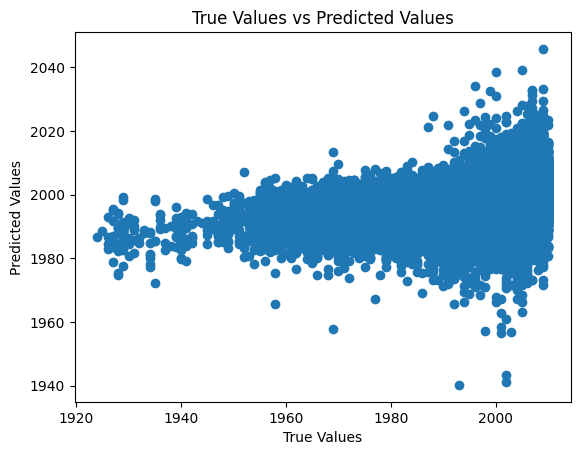

In [ ]:
plt.scatter(y_test, y_pred_ols)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

Se puede decir que el modelo no es bueno para realizar predicciones por las siguientes razones:

*   Se ve una fuerte tendencia del modelo a predecir valores entre 1980 y 2000

*    Se puede observar alto nivel de sesgo en las predicciones

*    Alta varianza en las predicciones de los años mas recientes

In [ ]:
errors = y_test - y_pred_ols

In [ ]:
#Se crea la siguiente función que permite facilitar el proceso de verificación del supuesto
#de idependencia, además se realiza un diagrama de dispersión de los errores con respecto a su posición
#con el fin de determinar si hay autocorrelación
def independence(errors):
  est_dw = sms.durbin_watson(errors)  #Aplicación de la prueba de Durbin Watson
  if est_dw <= 1.5 and est_dw >= 2.5:
    print(f'los residuos presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  else:
    print(f'Los residuos no presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  plt.title('i VS Errores')
  plt.scatter(np.arange(len(errors)),errors,s=10)
  plt.ylim(errors.min()-2,errors.max()+2)
  plt.show()
  return est_dw

In [ ]:
#Se crea la siguiente función que permite facilitar el proceso de verificación de los supuestos
#de normalidad de los errores, además se grafica un histograma para coplementar la interpretación
def normal(errors):
  statistic,pvalue = stats.jarque_bera(errors) #Aplicación de la prueba de Jarque-Bera
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad \np_value: {pvalue}')
  else:
    print(f'No se rechaza la hipotesis nula, se concluye normalidad \np_value: {pvalue}')

  media = np.mean(errors)
  desviacion_estandar = np.std(errors)

  # Graficar el histograma
  plt.hist(errors, bins=30, density=True, alpha=0.6, color='g', label='Histograma de datos')

  # Calcular la distribución normal
  x = np.linspace(media - 3*desviacion_estandar, media + 3*desviacion_estandar, 100)
  y = (1/(desviacion_estandar * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desviacion_estandar)**2)

  # Graficar la distribución normal
  plt.plot(x, y, color='r', label='Distribución normal')

  # Añadir leyendas y título
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.title('Histograma de errores y ajuste a distribución normal')
  plt.legend()

  plt.show()



In [ ]:
#Se crea la siguiente función que permite facilitar el proceso de verificación del supuesto
#de sobre la media de los errores, además se grafica un histograma con un boxplot para coplementar la interpretación

def media0(errors):
  statistic,pvalue = ttest_1samp(errors,0)   #Aplicación de la prueba t
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor 0 \np_value: {pvalue} ')
  else:
    print(f'No se rechaza la hipotesis nula y se concluye que la media es igual a cero \np_value: {pvalue}')
  # Crear la figura y los ejes
  fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6)) #'height_ratios' indica que el histograma es tres veces más grande que el diagrama de caja

  # Histograma en el eje superior
  ax1.hist(errors, bins=10)
  ax1.set_title('Histograma de los errores')
  # Boxplot en el eje inferior
  ax2.boxplot(errors,vert=False)
  ax2.set_title('Diagrama de caja de los errores ')

  # Ajustar el espacio entre los subgráficos
  plt.tight_layout()

  # Mostrar la gráfica
  plt.show()

In [ ]:
def homocedast(errors,X):
  X = sm.add_constant(X)
  res = sms.het_breuschpagan(errors,X) #Aplicación de la prueba de Breusch Pagan
  pvalue = res[1]
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula, se asume heterocedasticidad \nP_value: {pvalue}')
  else:
    pvalue(f'No se rechaza la hipotesis nula y se concluye homocedasticidad \nP_value: {pvalue}')

  plt.figure(figsize=(20,8))
  plt.title('i VS Errores',fontsize=20)
  plt.plot(np.arange(len(errors)),errors)
  plt.tick_params(axis='x', labelsize=15)  # Tamaño de las marcas en el eje x,y
  plt.tick_params(axis='y', labelsize=15)
  plt.show()

**Prueba de independencia**
Como se puede observar el estadistico de Durbin Watson presentó un valor entre 1.5 y 2.5 por lo tanto se concluye que no hay autocorrelación entre los errores del modelo de regresión lineal ajustado.

Graficamente se puede observar que los puntos no presentan una dependencia entre si, por lo tanto no se evidencia un comportamiento que presenta ciertas tendencias, es decir no hay autocorrelación.


Los residuos no presentan autocorrelación y el valor del estadistico de prueba es 2.0017520245604588


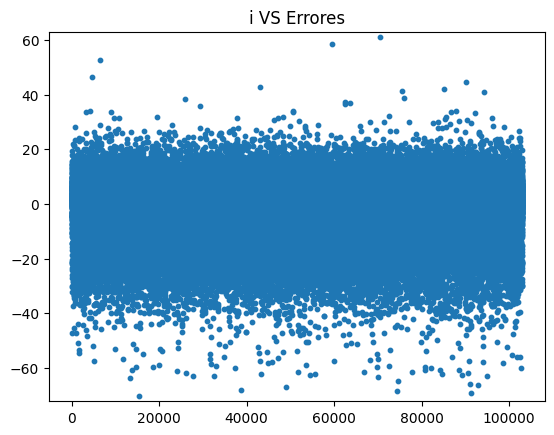

2.0017520245604588

In [ ]:
independence(errors)

**Prueba de media = 0**


Como se puede observar en las siguientes pruebas, no se rechaza la hipotesis nula y se concluye que no hay diferencia significativa entre la media de los errores y el valor de comparación que es cero.

No se rechaza la hipotesis nula y se concluye que la media es igual a cero 
p_value: 0.7235566465879567


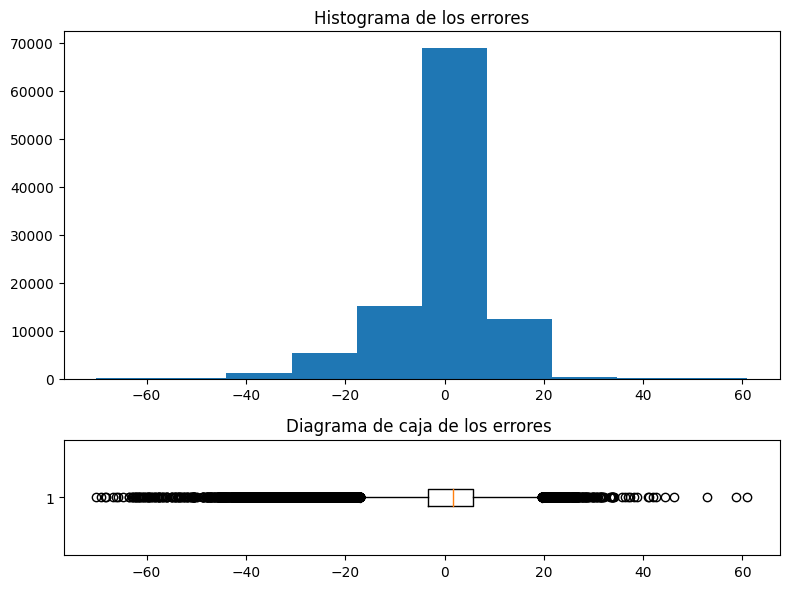

In [ ]:
media0(errors)

**Prueba de normalidad de los errores**

Se rechaza la hipotesis nula y se concluye que no hay normalidad posiblemente por la asimetría hacia la izquierda

Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad 
p_value: 0.0


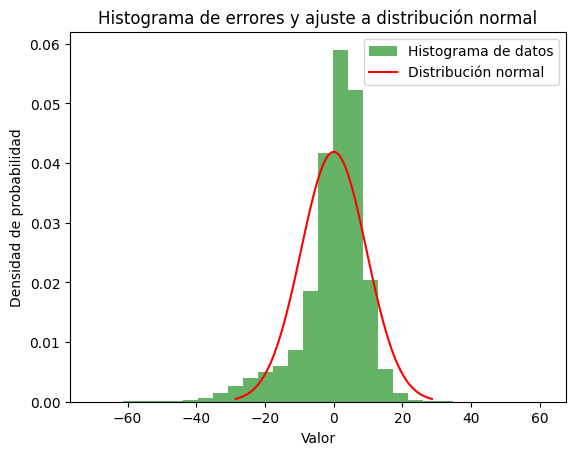

In [ ]:
normal(errors)

Prueba de Homocedasticidad

Se determina que se rechaza la hipotesis nula y se concluye que hay heterocedasticidad.

Graficamente se puede percibir las variaciones que hay en los errores a lo largo del eje X

Se rechaza la hipotesis nula, se asume heterocedasticidad 
P_value: 0.0


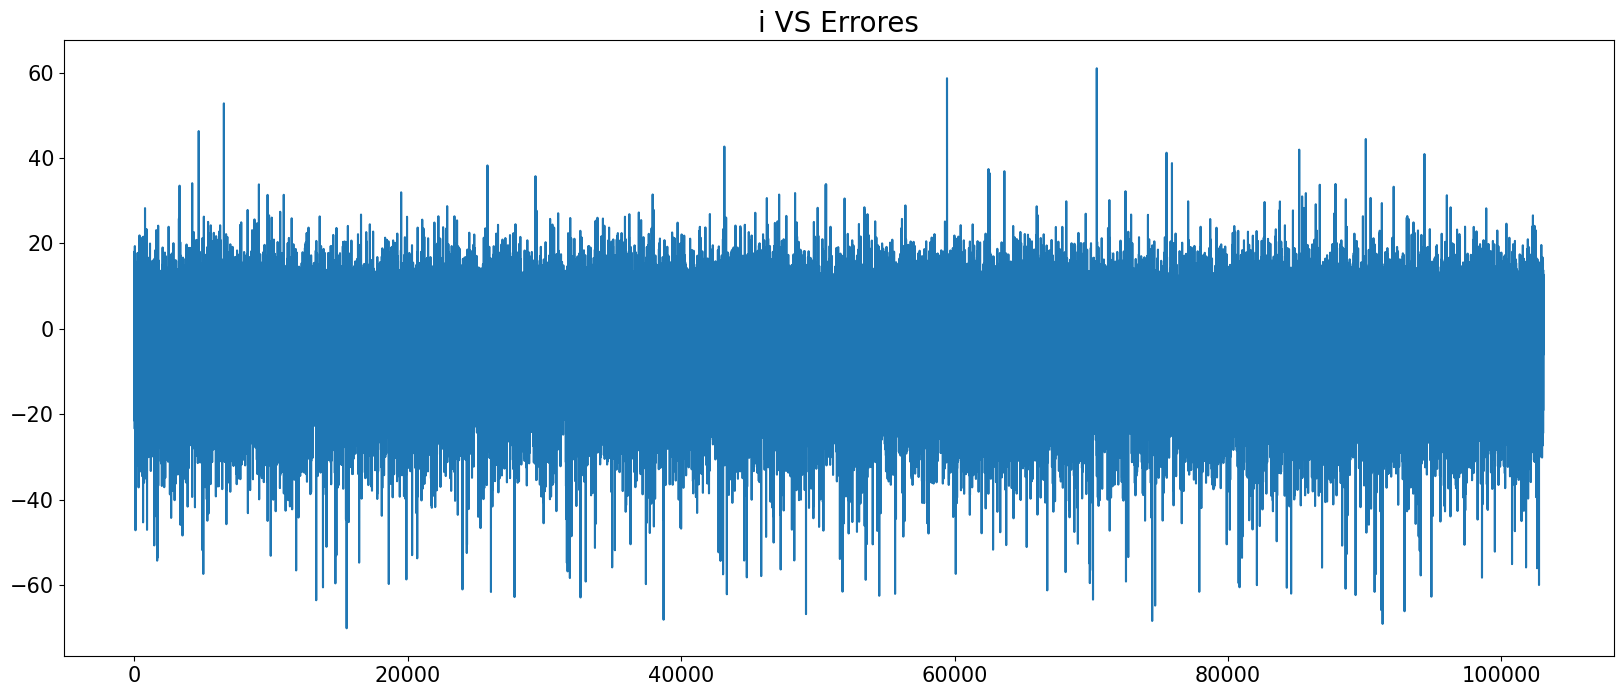

In [ ]:
homocedast(errors,X_test)

### Ejercicio 3. El conjunto de datos conocido como “California Housing Dataset” puede ser cargado del paquete sklearn. La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000).

Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).  Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

#### 3.1. Lea el conjunto de datos usando la función fetch_california_housing del paquete sklearn.datasets, guárdelos en una variable llamada california_housing y con el comando print(california_housing.DESCR) observe la descripción general del dataset y en especial qué es cada una de las variables de entrada.

In [ ]:
# Cargar el conjunto de datos
california_housing = fetch_california_housing()

# Acceder a las características del conjunto de datos
features = california_housing.data

# Acceder a los nombres de las características
feature_names = california_housing.feature_names

# Imprimir la descripción del conjunto de datos
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

##### Descripción del Conjunto de Datos

**1. MedInc:** Ingreso medio de los hogares en el bloque, expresado en decenas de miles de dólares.

**2. HouseAge:** Edad promedio de las casas en el bloque.

**3. AveRooms:** Promedio de habitaciones por vivienda en el bloque.

**4. AveBedrms:** Promedio de dormitorios por vivienda en el bloque.

**5. Population:** Población del bloque.

**6. AveOccup:** Promedio de ocupantes por vivienda en el bloque.

**7. Latitude:** Latitud donde se encuentra el bloque.

**8. Longitude:** Longitud donde se encuentra el bloque.

**9. MedHouseVal:** Valor medio de las viviendas en el bloque, expresado en cientos de miles de dólares.


#### 3.2. Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los comandos california_housing.data y california_housing.target. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto

In [ ]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# Variables independientes predictoras

X = california_housing.data

X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
# Variables objetivo

y = california_housing.target

y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# Convertir el conjunto de datos en un DataFrame de pandas, agregando al dataframe tanto las variables independientes como la variable objetivo

df= pd.DataFrame(features, columns=['MedInc', 'HouseAge','AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
df.insert(0, 'MedHouseVal', y)
df.head ()

MedHouseVal  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0        4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1        3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2        3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3        3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4        3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  
0     37.88    -122.23  
1     37.86    -122.22  
2     37.85    -122.24  
3     37.85    -122.25  
4     37.85    -122.25

##### ANÁLISIS EXPLORATORIO

- El dataset se deriva del censo de California de 1990, contiene 20,640 registros (instancias) con 8 características y una variable objetivo.
- El tipo de datos de todas las variables es el mismo, float64.
- No contiene valores nulos. El dataset está completamente limpio, lo que facilita su uso directo en modelos de machine learning sin necesidad de un preprocesamiento extenso para manejar valores faltantes.

In [ ]:
df.describe()

MedHouseVal        MedInc      HouseAge      AveRooms     AveBedrms  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       2.068558      3.870671     28.639486      5.429000      1.096675   
std        1.153956      1.899822     12.585558      2.474173      0.473911   
min        0.149990      0.499900      1.000000      0.846154      0.333333   
25%        1.196000      2.563400     18.000000      4.440716      1.006079   
50%        1.797000      3.534800     29.000000      5.229129      1.048780   
75%        2.647250      4.743250     37.000000      6.052381      1.099526   
max        5.000010     15.000100     52.000000    141.909091     34.066667   

         Population      AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean    1425.476744      3.070655     35.631861   -119.569704  
std     1132.462122     10.386050      2.135952      2.003532  
min        3.000000      0.692308     32.540000   -124.350000  
25%      787.000000      2.429741     33.930000   -121.800000  
50%     1166.000000      2.818116     34.260000   -118.490000  
75%     1725.000000      3.282261     37.710000   -118.010000  
max    35682.000000   1243.333333     41.950000   -114.310000

##### Cálculos Adicionales

In [ ]:
# Calcular estadísticas descriptivas básicas
descriptive_stats = df.describe().T

# Calcular varianza, coeficiente de variación, skew y kurtosis
data_var = df.var()
data_cv = df.std() / df.mean()
data_skew = df.skew()
data_kurtosis = df.kurtosis()

# Crear DataFrame con los valores adicionales
additional_stats = pd.DataFrame({
    'varianza': data_var,
    'coef_var': data_cv,
    'skew': data_skew,
    'kurtosis': data_kurtosis
})

# Concatenar los DataFrames
df_describe = pd.concat([descriptive_stats, additional_stats], axis=1)

# Mostrar el DataFrame completo
print(df_describe)

               count         mean          std         min         25%  \
MedHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   

                     50%          75%           max      varianza  coef_var  \
MedHouseVal     1.797000     2.647250      5.000010  1.331615e+00  0.557855   
MedInc          3.534800     4.743250     15.000100  3.609323e+00  0.490825   
HouseAge       29.0000

Observamos qué:

- El ingreso promedio de los hogares es aproximadamente $38,706.71.

- La edad promedio de las casas es de aproximadamente 28.64 años.

- El promedio de habitaciones por vivienda es de aproximadamente 5.43.

- El promedio de dormitorios por vivienda es de aproximadamente 1.10.

- La población promedio por bloque censal es de aproximadamente 1,425 personas.

- El promedio de ocupantes por vivienda es de aproximadamente 3.07.

- La latitud promedio de los bloques censales es de 35.631861 grados.

- La longitud promedio de los bloques censales es de -119.569704 grados.

- Finalmente se observa que la variable objetivo tiene un valor promedio de las viviendas de aproximadamente $206,855.80.

In [ ]:
df_describe.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, MedHouseVal to Longitude
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   count     9 non-null      float64
 1   mean      9 non-null      float64
 2   std       9 non-null      float64
 3   min       9 non-null      float64
 4   25%       9 non-null      float64
 5   50%       9 non-null      float64
 6   75%       9 non-null      float64
 7   max       9 non-null      float64
 8   varianza  9 non-null      float64
 9   coef_var  9 non-null      float64
 10  skew      9 non-null      float64
 11  kurtosis  9 non-null      float64
dtypes: float64(12)
memory usage: 1.2+ KB


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


##### Calcular la matriz de correlación

In [ ]:
Correlation_matrix = df.corr ()
Correlation_matrix

MedHouseVal    MedInc  HouseAge  AveRooms  AveBedrms  Population  \
MedHouseVal     1.000000  0.688075  0.105623  0.151948  -0.046701   -0.024650   
MedInc          0.688075  1.000000 -0.119034  0.326895  -0.062040    0.004834   
HouseAge        0.105623 -0.119034  1.000000 -0.153277  -0.077747   -0.296244   
AveRooms        0.151948  0.326895 -0.153277  1.000000   0.847621   -0.072213   
AveBedrms      -0.046701 -0.062040 -0.077747  0.847621   1.000000   -0.066197   
Population     -0.024650  0.004834 -0.296244 -0.072213  -0.066197    1.000000   
AveOccup       -0.023737  0.018766  0.013191 -0.004852  -0.006181    0.069863   
Latitude       -0.144160 -0.079809  0.011173  0.106389   0.069721   -0.108785   
Longitude      -0.045967 -0.015176 -0.108197 -0.027540   0.013344    0.099773   

             AveOccup  Latitude  Longitude  
MedHouseVal -0.023737 -0.144160  -0.045967  
MedInc       0.018766 -0.079809  -0.015176  
HouseAge     0.013191  0.011173  -0.108197  
AveRooms    -0.004852  0.106389  -0.027540  
AveBedrms   -0.006181  0.069721   0.013344  
Population   0.069863 -0.108785   0.099773  
AveOccup     1.000000  0.002366   0.002476  
Latitude     0.002366  1.000000  -0.924664  
Longitude    0.002476 -0.924664   1.000000

##### Mapa de Calor

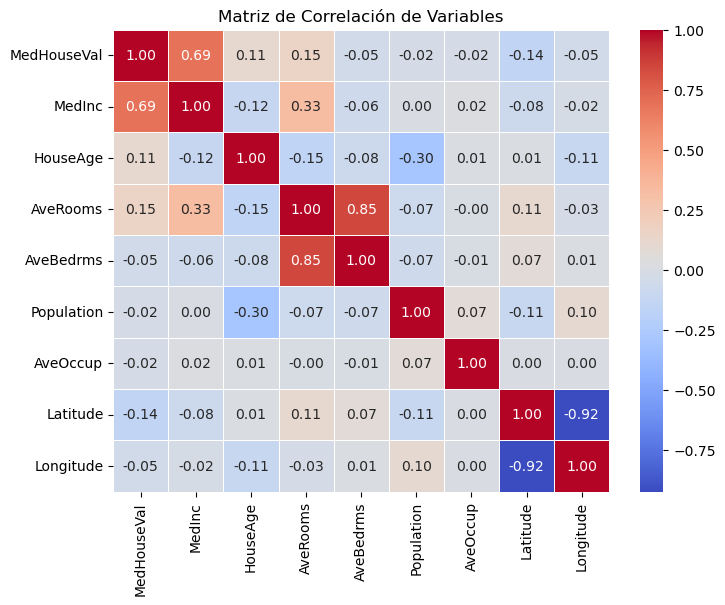

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

##### Análisis de la Correlación entre Variables

Al observar la matriz de correlación, se observa:

- Una alta correlación negativa entre las variables latitud y longitud, lo que indica que cuando una crece la otra disminuye.

- También se observa una alta correlación positiva entre las variables habitaciones y dormitorios, esta correlación es muy coherente dado que a mayor dormitorios mayor habitaciones, los dormitorios están contenidos en las habitaciones.

- Se observa también una correlación medianamente alta entre los ingresos de los hogares y los precios de las casas.  Lo cual tiene un significado coherente que los hogares con mayores ingresos estén en las casas de mayor valor y viceversa. En términos económicos, generalmente los hogares con mayores ingresos pueden permitirse viviendas de mayor valor, y las áreas con viviendas más caras suelen tener residentes con ingresos más altos.

- Se evaluan las variables a incluir Latitude y Longitude, el resultado es no incluir una de las 2 ya que estas presentan un alto grado de correlación entre ellas, lo cual puede generar problemas en los coeficientes del modelo y causar efectos de multicolinealidad, por lo tanto se procede a incluir solo la variable, latitude.

In [ ]:
# Convertir la matriz en un DataFrame de pandas

df= pd.DataFrame(features, columns=['MedInc', 'HouseAge','AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
df.insert(0, 'MedHouseVal', california_housing.target)
df = df.drop(columns=['Longitude'])
df.head ()

MedHouseVal  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0        4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1        3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2        3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3        3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4        3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  
0     37.88  
1     37.86  
2     37.85  
3     37.85  
4     37.85

##### Calcular de nuevo la matriz de correlación

In [ ]:
Correlation_matrix2 = df.corr ()
Correlation_matrix2

MedHouseVal    MedInc  HouseAge  AveRooms  AveBedrms  Population  \
MedHouseVal     1.000000  0.688075  0.105623  0.151948  -0.046701   -0.024650   
MedInc          0.688075  1.000000 -0.119034  0.326895  -0.062040    0.004834   
HouseAge        0.105623 -0.119034  1.000000 -0.153277  -0.077747   -0.296244   
AveRooms        0.151948  0.326895 -0.153277  1.000000   0.847621   -0.072213   
AveBedrms      -0.046701 -0.062040 -0.077747  0.847621   1.000000   -0.066197   
Population     -0.024650  0.004834 -0.296244 -0.072213  -0.066197    1.000000   
AveOccup       -0.023737  0.018766  0.013191 -0.004852  -0.006181    0.069863   
Latitude       -0.144160 -0.079809  0.011173  0.106389   0.069721   -0.108785   

             AveOccup  Latitude  
MedHouseVal -0.023737 -0.144160  
MedInc       0.018766 -0.079809  
HouseAge     0.013191  0.011173  
AveRooms    -0.004852  0.106389  
AveBedrms   -0.006181  0.069721  
Population   0.069863 -0.108785  
AveOccup     1.000000  0.002366  
Latitude     0.002366  1.000000

##### Graficar de nuevo el Mapa de Calor

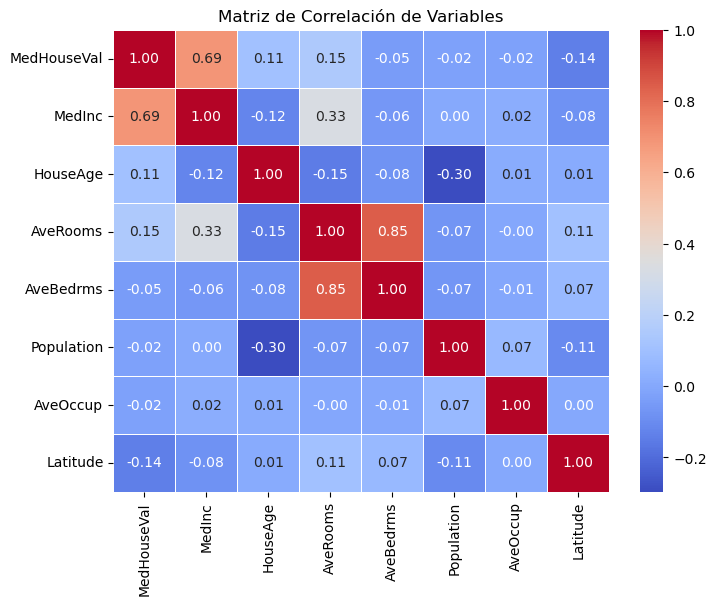

In [ ]:
# Calcular de nuevo la matriz de correlación

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

- Para este punto se puede observar que el ingreso de los hogares es bastante influyente en el precio de las casas.

In [ ]:
df.columns

Index(['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'Latitude'],
      dtype='object')

##### Análisis de Dispersión entre Variables Predictoras y Variable Objetivo.

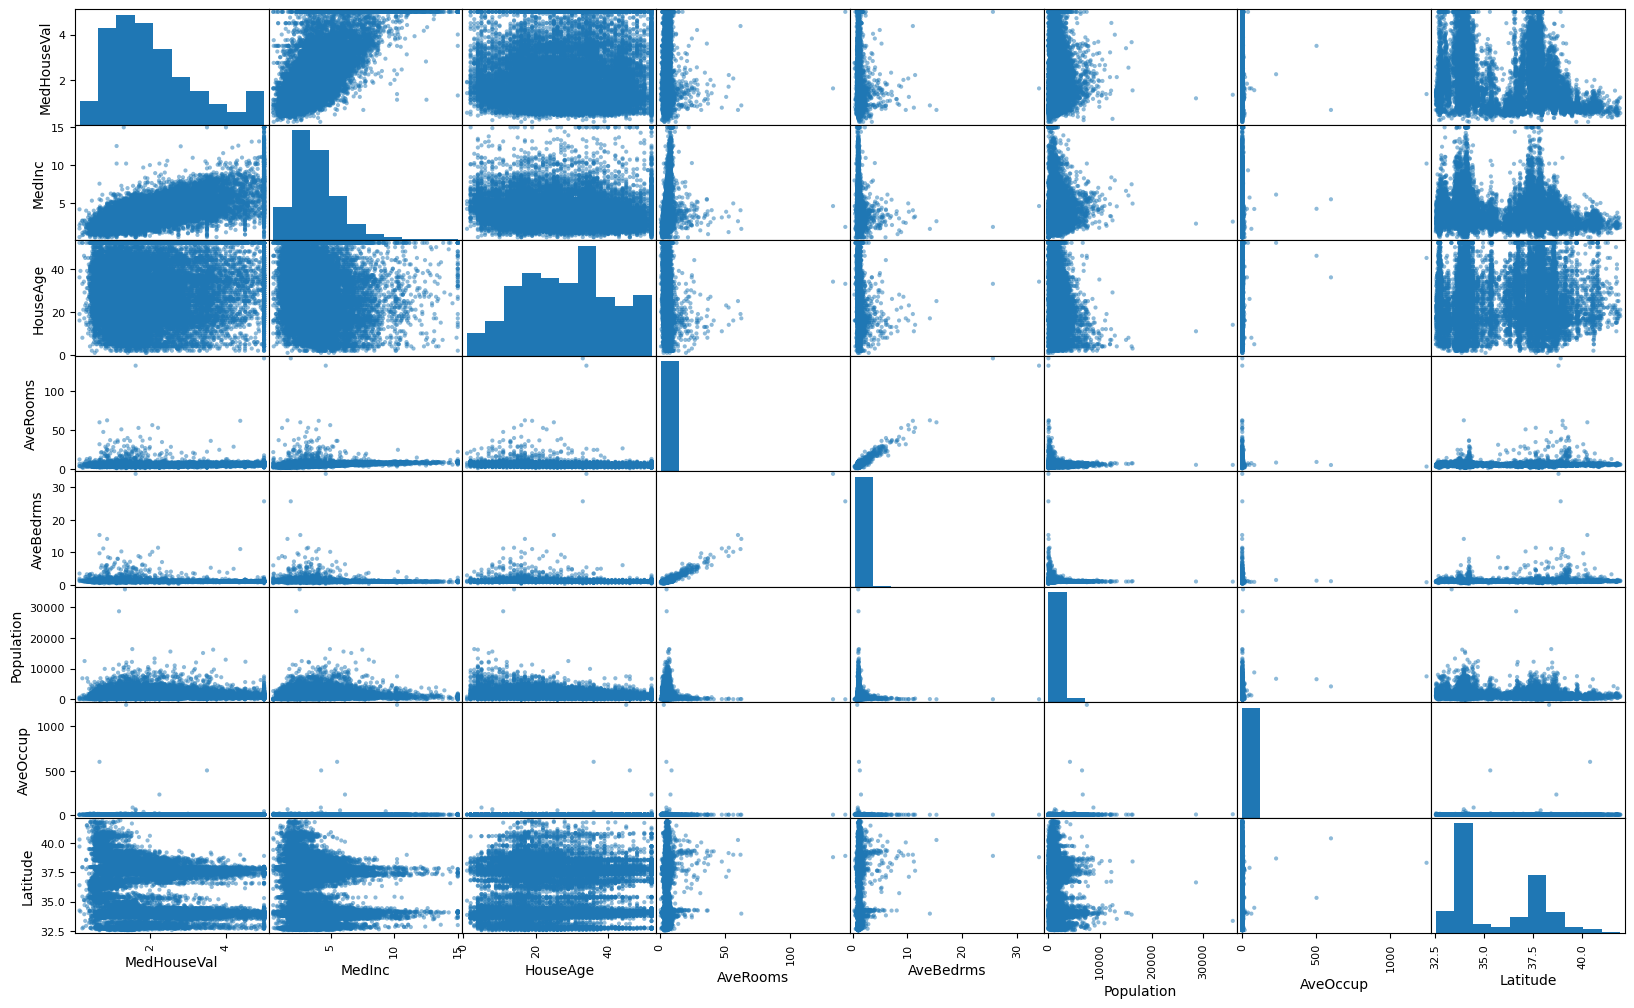

In [ ]:
columnas = ['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']

# Crear la matriz de dispersión
pd.plotting.scatter_matrix(df[columnas], figsize=(20, 12))
plt.show()

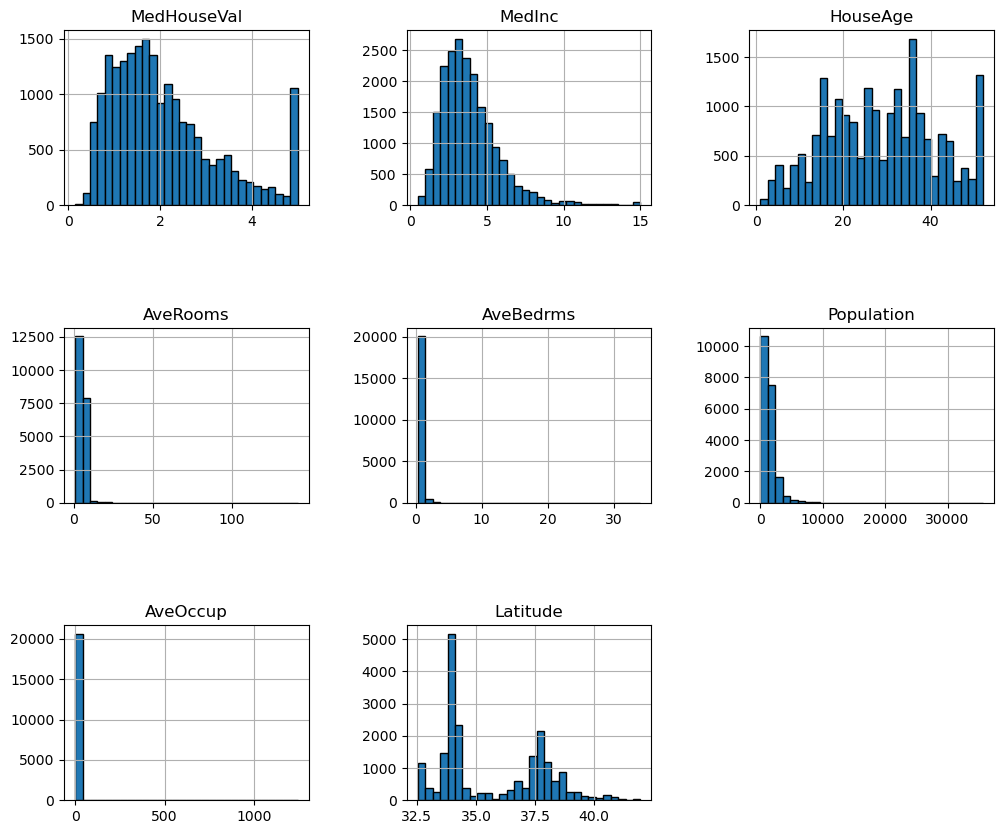

In [ ]:
import matplotlib.pyplot as plt

df[columnas].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

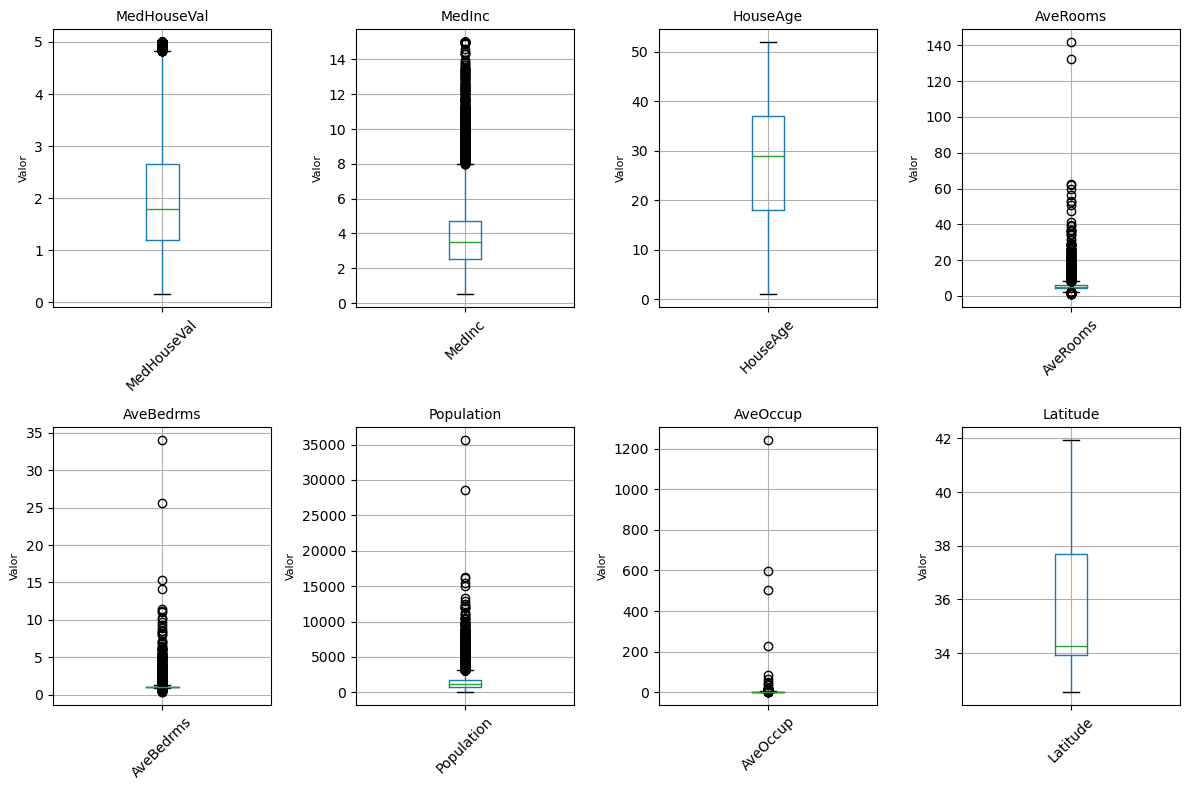

In [ ]:
# Seleccionar las columnas para los box plots
columnas = ['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un box plot para cada atributo
for i, columna in enumerate(columnas):
    plt.subplot(2, 4, i+1)  # Crear subplots en una cuadrícula de 2x4
    df.boxplot(column=columna)
    plt.title(columna, fontsize=10)
    plt.ylabel('Valor', fontsize=8)
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### 3.3. Ajuste un modelo de regresión LASSO con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas

##### Antes de aplicar el modelo de regresión LASSO, primero realizaremos un proceso de estandarización de las variables predictoras. Esto se debe a que las variables pueden estar en diferentes escalas, lo que podría afectar la magnitud de los coeficientes estimados por el método.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Suponiendo que df es tu DataFrame y que ya está cargado
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Nombres de columnas iniciales (sin la columna objetivo)
feature_names = X.columns.tolist()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##### Aplicar Modelo LASSO

In [ ]:

# Definir los alphas a evaluar
alphas_to_try = np.linspace(0.01, 0.1, 10)  # Ajuste fino de alphas, ajuste según sea necesario

# Matriz de correlación inicial
correlation_matrix = np.corrcoef(X_scaled, rowvar=False)
high_correlation = np.max(np.abs(np.triu(correlation_matrix, k=1)))

# Proceso iterativo para ajustar LASSO y evaluar la multicolinealidad
for alpha in alphas_to_try:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Identificar las características con coeficientes que no son cero
    non_zero_features = np.where(lasso.coef_ != 0)[0]
    if len(non_zero_features) == 0:
        print("Todos los coeficientes han sido reducidos a cero.")
        break

    non_zero_feature_names = [feature_names[i] for i in non_zero_features]
    non_zero_coefficients = lasso.coef_[non_zero_features]

    # Mostrar nombres de las características y coeficientes en una tabla
    features_table = pd.DataFrame({
        'Feature Name': non_zero_feature_names,
        'Coefficient': non_zero_coefficients
    })
    print(f"Alpha: {alpha:.2f}, Características Retenidas: {len(non_zero_feature_names)}")
    print(features_table)

    # Calcular la nueva matriz de correlación de las variables retenidas
    X_reduced = X_scaled[:, non_zero_features]
    correlation_matrix = np.corrcoef(X_reduced, rowvar=False)
    high_correlation = np.max(np.abs(np.triu(correlation_matrix, k=1)))

    print(f"Máxima correlación absoluta entre características: {high_correlation:.2f}")

    # Condición para detenerse si no hay alta correlación
    if high_correlation < 0.7:  # Ajusta este umbral según sea necesario
        print("Correlaciones altas entre características han sido eliminadas.")
        break


Alpha: 0.01, Características Retenidas: 7
  Feature Name  Coefficient
0       MedInc     0.926786
1     HouseAge     0.198131
2     AveRooms    -0.324760
3    AveBedrms     0.289328
4   Population     0.006538
5     AveOccup    -0.037477
6     Latitude    -0.069420
Máxima correlación absoluta entre características: 0.85
Alpha: 0.02, Características Retenidas: 6
  Feature Name  Coefficient
0       MedInc     0.852334
1     HouseAge     0.190322
2     AveRooms    -0.161059
3    AveBedrms     0.135213
4     AveOccup    -0.025671
5     Latitude    -0.072685
Máxima correlación absoluta entre características: 0.85
Alpha: 0.03, Características Retenidas: 5
  Feature Name  Coefficient
0       MedInc     0.785265
1     HouseAge     0.184024
2     AveRooms    -0.015345
3     AveOccup    -0.014454
4     Latitude    -0.074069
Máxima correlación absoluta entre características: 0.33
Correlaciones altas entre características han sido eliminadas.


#### 3.4. Ajuste un modelo de regresión OLS con las variables reducidas y revise los residuales.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Suponiendo que 'df' es tu DataFrame ya cargado con los datos pertinentes
# Preparar el conjunto de datos
X_reduced2 = df.drop(['MedHouseVal', 'AveBedrms', 'Population'], axis=1)
y = df['MedHouseVal']

# Añadir una constante a las variables independientes para el término del intercepto
X_reduced2 = sm.add_constant(X_reduced2)

# Crear y ajustar el modelo OLS
model = sm.OLS(y, X_reduced2)
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4481.
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        15:15:20   Log-Likelihood:                -24655.
No. Observations:               20640   AIC:                         4.932e+04
Df Residuals:                   20634   BIC:                         4.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6340      0.096     17.039      0.0

##### Destaquemos varios puntos de la información que nos arroja aplicar el método estadístico OLS para la estimación de los parámetros:

- El modelo muestra una significancia global, evidenciada por el valor F obtenido (Prob-F-statistic < 0.05).

- Las variables predictoras, sin el intercepto, muestran un valor p menor a un nivel relevante del 5%. Por lo tanto, se ignora la hipótesis nula y se puede afirmar que los coeficientes asociados a estas variables explicativas son significativos (MedInc, HouseAge, AveRooms, AveOccup y Latitude).

- Es notable que el problema de multicolinealidad presente en el modelo original ya no está en el modelo reducido, gracias al proceso de regularización realizado mediante el modelo Lasso.

In [ ]:
# Obtener las predicciones del modelo
y_pred = results.predict(X_reduced2)
# Calcular los residuos
residuales = y - y_pred

##### Validar los supuestos del modelo

###### NORMALIDAD

El Test de Shapiro-Wilks se utiliza para comprobar la normalidad de los residuos en un modelo, planteando la siguiente prueba de hipótesis:

**Hipótesis nula (Ho):** Los residuos del modelo siguen una distribución normal.

**Hipótesis alternativa (H1):** Los residuos del modelo no siguen una distribución normal.

- Para esta prueba, si el p-valor es menor que el nivel de significancia del 5%, se rechaza la hipótesis nula, lo que indica que los residuos no siguen una distribución normal.

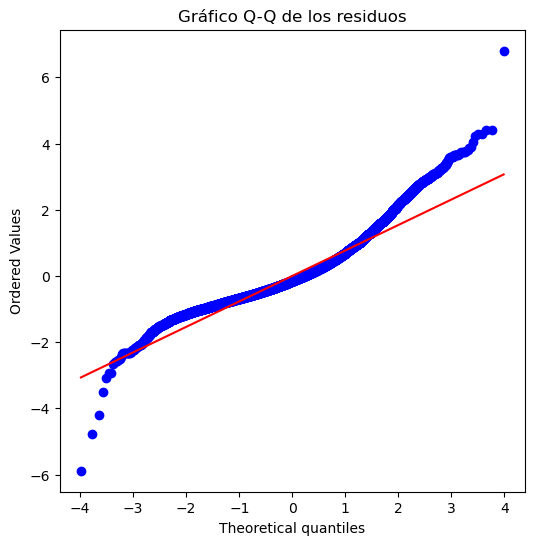

In [ ]:
import scipy.stats as stats

# Gráfico Q-Q de los residuos
plt.figure(figsize=(6, 6))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los residuos')
plt.show()

In [ ]:
from scipy import stats

shapiro_test_statistic, shapiro_p_value = stats.shapiro(results.resid)
print("Estadístico de prueba para Shapiro Wilks: ", shapiro_test_statistic)
print("P-Value: ", shapiro_p_value)

Estadístico de prueba para Shapiro Wilks:  0.9266111254692078
P-Value:  0.0


c:\Users\kenny\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**No se cumple Normalidad:**

El Test de Shapiro-Wilks rechazó la hipótesis nula de que los errores del modelo siguen una distribución normal. Además, el análisis del gráfico Q-Q Plot muestra que los cuantiles teóricos y observados de los errores no se alinean con la línea de referencia. Por lo tanto, se concluye que los errores del modelo no tienen una distribución normal.

###### MEDIA CERO

El One Sample T-Test se utiliza para comprobar si la media de los errores del modelo es cero, planteando la siguiente prueba de hipótesis:

**- Hipótesis nula (Ho):** La media de los errores del modelo es cero.
**- Hipótesis alternativa (H1):** La media de los errores del modelo es distinta de cero.
Si el p-valor es menor que el nivel de significancia del 5%, se rechaza la hipótesis nula.

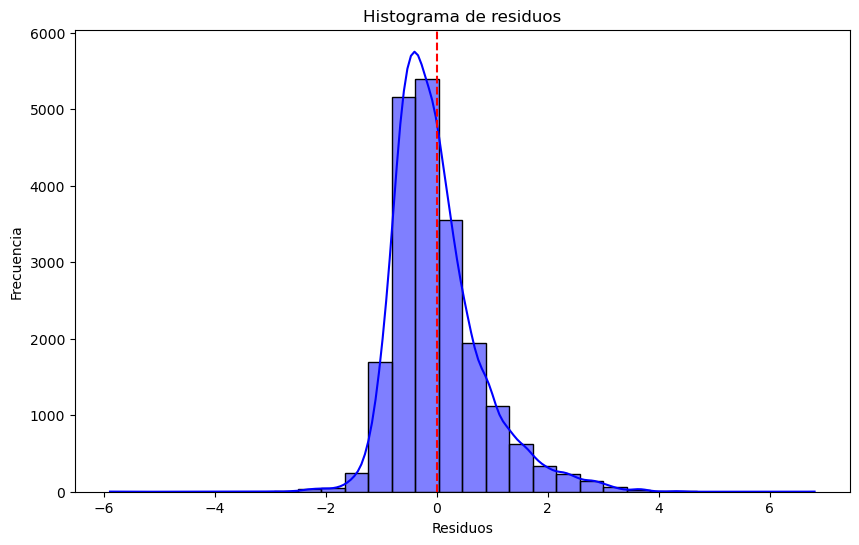

In [ ]:
# Histograma de los residuos con línea en media cero
plt.figure(figsize=(10, 6))
sns.histplot(residuales, kde=True, color='blue', bins=30)
plt.axvline(x=0, color='red', linestyle='--')  # Línea vertical en x=0
plt.title('Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Prueba de One Sample T-Test

residuos = results.resid

t_statistic, p_valor = stats.ttest_1samp(residuos, 0)


print("Estadístico t:", t_statistic)
print("P-Value:", p_valor)

Estadístico t: -4.0605165497757874e-14
P-Value: 0.9999999999999676


**El Supuesto de Media Cero se cumple**

###### INDEPENDENCIA

El Test de Durbin-Watson se utiliza para comprobar la independencia de los errores del modelo, planteando la siguiente prueba de hipótesis:

**Hipótesis nula (Ho):** No hay autocorrelación de los errores del modelo.

**Hipótesis alternativa (H1):** Existe autocorrelación entre los errores del modelo.
La regla general indica que valores del estadístico cercanos a 2 (entre 1.5 y 2.5) sugieren ausencia de autocorrelación. Valores cercanos a 0 indican autocorrelación positiva, mientras que valores cercanos a 4 indican autocorrelación negativa.

In [ ]:
SSR = np.sum(residuales**2)

differences = np.diff(residuales)
SSD = np.sum(differences**2)

durbin_watson = SSD / SSR

# Imprime el estadístico de Durbin-Watson
print("Estadístico de Durbin-Watson:", durbin_watson)


Estadístico de Durbin-Watson: 0.8068875404179299


**El supuesto de independencia No se cumple**

El estadístico obtenido sugiere que puede existir autocorrelación positiva entre los errores. (0.8068).

###### HOMOCEDASTICIDAD

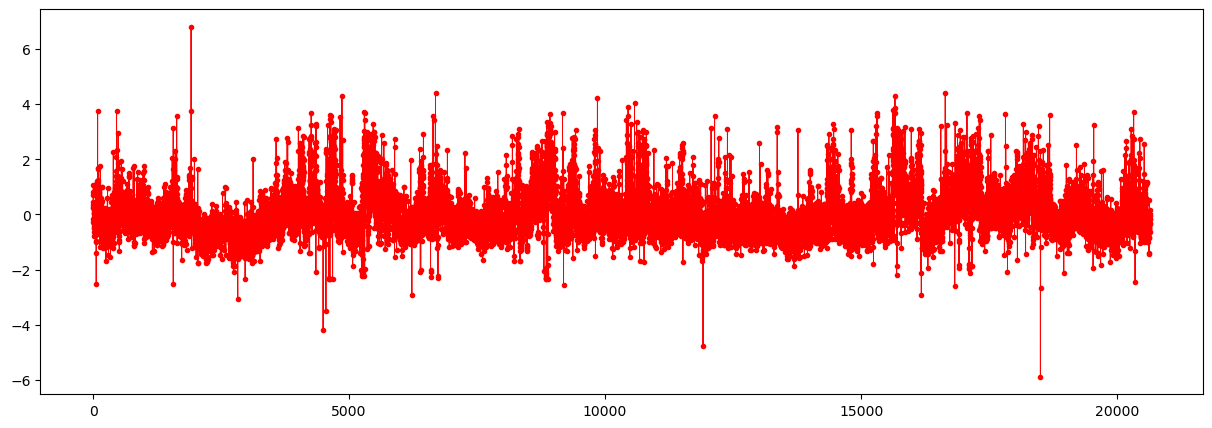

In [ ]:
# Homocedasticidad
plt.figure(figsize=(15, 5))
plt.plot(residuales, '.-', color="red", linewidth=0.7)
plt.show()

In [ ]:
#A través del método .exog que accede a la matriz de variables independientes del modelo

bp_test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print("Estadístico de prueba de Breusch-Pagan:", bp_test[0])
print("P-Value:", bp_test[1])

Estadístico de prueba de Breusch-Pagan: 623.6393984264955
P-Value: 1.5766376268039108e-132


**No se cumple Homocedasticidad:**
La prueba de homocedasticidad arrojó un valor lo suficientemente pequeño como para rechazar la hipótesis nula, indicando la presencia de heterocedasticidad en los errores. Además, gráficamente se observa que la variabilidad de los errores no es constante.

#### 3.5. Realice una detección de atípicos usando la distancia de Mahalanobis, eliminelos y vuelva a ajustar el modelo OLS, valide los supuestos del modelo.

**Es importante destacar algunos puntos específicos en el cálculo de la Distancia de Mahalanobis**

La distancia de Mahalanobis se usa para medir la distancia entre un punto y una distribución en un espacio multidimensional.

- **Detección de anomalías:** Ayuda a identificar puntos de datos que se desvían significativamente de la media de una distribución, lo que es útil para detectar outliers o valores atípicos.

- **Comparación de distribuciones:** Permite comparar diferentes distribuciones tomando en cuenta la correlación entre variables, lo que es útil en estudios estadísticos y análisis de patrones.

En resumen, la distancia de Mahalanobis es una herramienta versátil en el análisis multivariante para medir distancias ajustadas por la variabilidad y la correlación de los datos.

##### Variables Predictoras

Utilizar las Variables ya escaladas

In [ ]:

X_scaled2 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled2. head ()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503

**Excluir variables inadecuadas**
El proceso implica la creación de un vector excluyendo las variables que se determinaron como inadecuadas para incluir en el modelo.

In [ ]:
X2_scaled2= X_scaled2.drop(["Population","AveBedrms"], axis=1)
X2_scaled2.head()

MedInc  HouseAge  AveRooms  AveOccup  Latitude
0  2.344766  0.982143  0.628559 -0.049597  1.052548
1  2.332238 -0.607019  0.327041 -0.092512  1.043185
2  1.782699  1.856182  1.155620 -0.025843  1.038503
3  0.932968  1.856182  0.156966 -0.050329  1.038503
4 -0.012881  1.856182  0.344711 -0.085616  1.038503

##### Calcular el termino (x - μ)

In [ ]:
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# Calcular el termino (x - μ)

centroide = X2_scaled2- X2_scaled2.mean()

##### Considerar La Covarianza

La distancia de Mahalanobis considera la covarianza de las variables y puede ser influenciada por valores atípicos. Por lo tanto, se recomienda usar el Determinante de Covarianza Mínima en el siguiente paso para abordar la sensibilidad ante valores atípicos. Este método proporciona una medida de distancia más robusta al estimar la matriz de covarianzas, lo que lo hace preferible en comparación con otras técnicas.

In [ ]:
S = MinCovDet().fit(X2_scaled2) #Ajuste de modelo MCD a los datos

##### Invertir La Covarianza

In [ ]:
matriz_covarianza = S.covariance_ #Extracción de la matriz de covarianza robusta
inversa_cov = np.linalg.inv(matriz_covarianza)
termino_derecho = np.dot(centroide, inversa_cov) # Σ^-1 ⋅ (x - μ)


##### Calcular Distancia de Mahalanobis

In [ ]:
termino_completo = np.dot(termino_derecho,centroide.T) # (x - μ)^T ⋅ Σ^-1 ⋅ (x - μ)

Distancia = np.sqrt(termino_completo.diagonal())


##### Utilizar un umbral para decidir si la observación es atípica o no

In [ ]:
alpha = 0.01
critico = np.sqrt(chi2.ppf(1-alpha, df = X2_scaled2.shape[1]))

print("Número de outliers: ", sum(Distancia > critico))

Número de outliers:  1575


Después de identificar los valores atípicos mediante la distancia de Mahalanobis, se procede a crear un nuevo dataframe excluyendo estos valores atípicos. Este nuevo conjunto de datos se utilizará para estimar un modelo mediante el método de Mínimos Cuadrados Ordinarios (OLS).

In [ ]:
X_Scaled_SinOut = X_scaled2.drop(["Population", "AveBedrms"], axis=1).loc[Distancia <= critico, :]

In [ ]:
y2 = pd.DataFrame(y, columns=["median_house_value"])


In [ ]:
df_Y = y2.loc[Distancia <= critico, :]


In [ ]:
df_completo = pd.concat([X_Scaled_SinOut,df_Y], axis=1)
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19065 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              19065 non-null  float64
 1   HouseAge            19065 non-null  float64
 2   AveRooms            19065 non-null  float64
 3   AveOccup            19065 non-null  float64
 4   Latitude            19065 non-null  float64
 5   median_house_value  19065 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


##### Peparación de datos, ajustar de nuevo un modelo de regresión lineal utilizando OLS

In [ ]:
# Asignar todas las características del DataFrame df_completo, excepto la columna "median_house_value" para
# separar las características predictoras de la variable objetivo, Asignar aparte en y la variable objetivo.

X_mahalanobis = df_completo.drop(["median_house_value"], axis=1)
y = df_completo["median_house_value"]

# Agregar una columna de unos a la matriz de características
X_mahalanobis = sm.add_constant(X_mahalanobis)

#Entrenamiento del modelo usando OLS

model = sm.OLS(y,X_mahalanobis)
resultsmaha = model.fit()

#Resumen del modelo

print(resultsmaha.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     5417.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        21:15:52   Log-Likelihood:                -20220.
No. Observations:               19065   AIC:                         4.045e+04
Df Residuals:                   19059   BIC:                         4.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9631      0.005    367.313      0.0

In [ ]:
resid = resultsmaha.resid

##### Evaluación de los supuestos

###### NORMALIDAD

In [ ]:
ks_test_residuals = stats.kstest(resid, 'norm', args=(np.mean(resid), np.std(resid)))
print(f"Kolmogorov-Smirnov Test: Estadístico={ks_test_residuals.statistic}, p-valor={ks_test_residuals.pvalue}")

Kolmogorov-Smirnov Test: Estadístico=0.06434011691130437, p-valor=4.664623374466527e-69


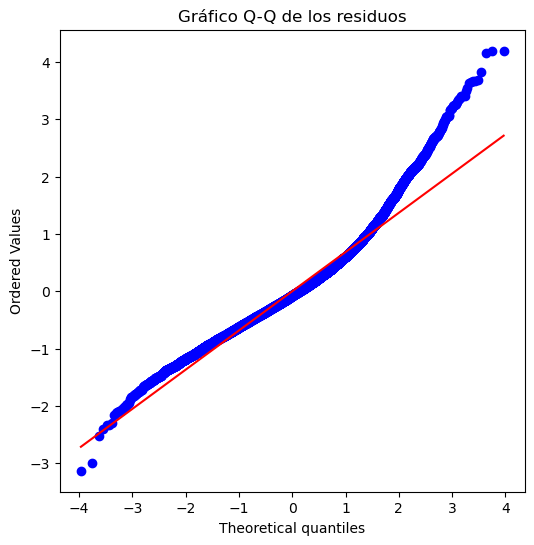

In [ ]:
import scipy.stats as stats

# Gráfico Q-Q de los residuos
plt.figure(figsize=(6, 6))
stats.probplot(resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los residuos')
plt.show()

**El supuesto de normalidad No se cumple**

###### MEDIA CERO

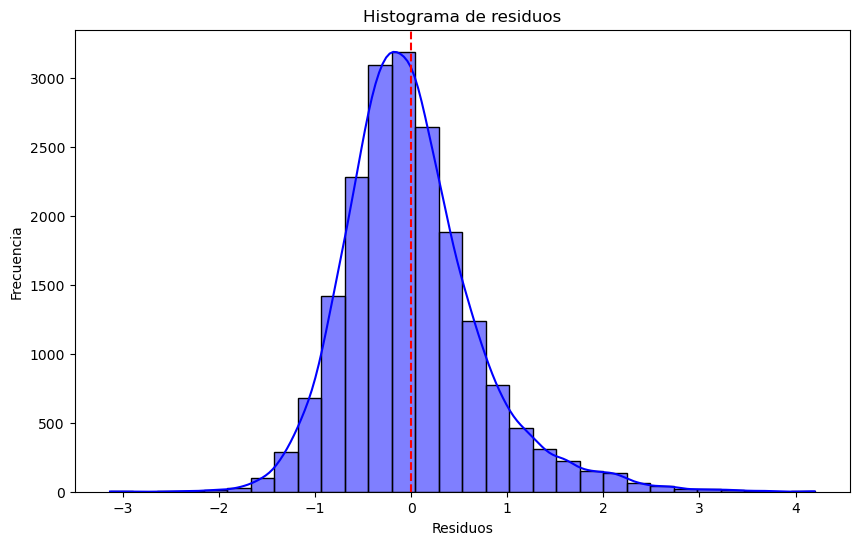

In [ ]:

# Histograma de los residuos con línea en media cero
plt.figure(figsize=(10, 6))
sns.histplot(resid, kde=True, color='blue', bins=30)
plt.axvline(x=0, color='red', linestyle='--')  # Línea vertical en x=0
plt.title('Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

**El supuesto de media cero Sí se cumple**

###### INDEPENDENCIA

In [ ]:
import numpy as np
from scipy.stats import stats


SSR = np.sum(resid**2)

differences = np.diff(resid)
SSD = np.sum(differences**2)

durbin_watson = SSD / SSR

# Imprime el estadístico de Durbin-Watson
print("Estadístico de Durbin-Watson:", durbin_watson)

Estadístico de Durbin-Watson: 0.9934500967551738


**El supuesto de Independencia No se cumple**

###### HOMOCEDASTICIDAD

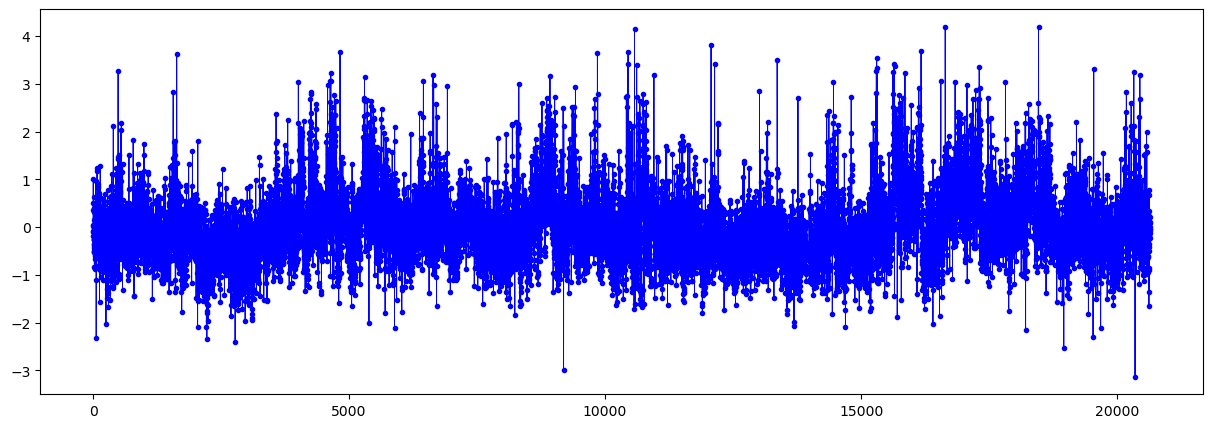

In [ ]:
## Homocedasticidad
plt.figure(figsize=(15, 5))
plt.plot(resid, '.-', color="BLUE", linewidth=0.7)
plt.show()

**El supuesto de Homocedasticidad No se cumple**

##### **CONCLUSIÓN**

A lo largo de este análisis, se exploraron distintas estrategias con el fin de desarrollar un modelo eficaz para predecir el valor medio de las viviendas en los diversos distritos de California.A pesar de emplear el modelo LASSO, el cual ayudó a seleccionar las variables más relevantes y a mitigar la multicolinealidad, persistieron desafíos relacionados con los supuestos de los errores del modelo. Este hallazgo sugiere que podrían existir variables críticas que aún no se han tenido en cuenta para explicar la variable objetivo.

Además, la aplicación de la metodología de Mahalanobis permitió identificar 1,575 valores atípicos que no se consideraron en la última estimación. No obstante, este enfoque tampoco garantizó el cumplimiento de los supuestos de los errores. En conclusión, abordar esta problemática requerirá una reevaluación de la estructura del modelo, incluyendo posibles variables relevantes previamente pasadas por alto, así como la exploración de transformaciones adicionales de los datos para asegurar que se cumplan los supuestos del modelo.